In [1]:
### Script calculate and analyze enriched pathways on the estimated MOFA models (based on the MOFA method comparing mean differences in factor values)
# Pathway databases: KEGG, REACTOME

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

In [3]:
source('MS4_Plot_Config.r')

###############################################
# Preqrequisites Configurations & General Parameters

In [4]:
data_path = '../data/current'

In [5]:
result_path = '../results/current'

In [6]:
data_path

[1] "../data/current"

In [7]:
### Which MOFA model to load

In [8]:
weight_views = FALSE

In [9]:
### Version of the pre-processed data to load

In [10]:
name = 'V_FINAL_INTEGRATED'

# Functions

In [11]:
### Function for quantile normalization

quantile_normalization = function(X){
  set.seed(42)
  ranks = apply(X, 2, rank, ties.method = 'min')  # determine ranks of each entry
  
  sorted = data.frame(apply(X, 2, sort)) # sort the entries
  means = apply(sorted, 1, mean) # calculate the means
  
  normalized_data = apply(ranks, 2 ,function(x){ means[x]}) # substitute the means into ranks matrix
}


In [12]:
### Function to run enrichment Test

run_enrichment_pathway =function(model, # MOFA Model
                         views = views,  # dimensions for which to run
                         factor_set,  # list of factors for which to run the enrichment
                         use_statistic,  # which statistic to use
                         feature_set, # Pathway Feature Set mapping
                         min_size, # Min size of genes within a pathway
                         use_test, # test used for calculating p-value
                         p_val_cutoff, # p-value cutoff used
                         enrichment_result_p_val, # dataset for saving results
                         enrichment_result_p_val_adjusted # dataset for saving result
                         ){
    
    set.seed(1)

    for(i in  views){

        ### All

        enrichment.parametric = run_enrichment(model,
          view = i , factors = factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "all",   # alternatives: positive, negative, all
          statistical.test =  use_test, # alternatives: "parametric", "cor.adj.parametric", "permutation".
          alpha = p_val_cutoff # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'all'

        result_data$view = i
        result_data$enrichment = 'all'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)


        ### Negative

        enrichment.parametric = run_enrichment(model,
          view = i , factors =factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "negative",   # alternatives: positive, negative, all
          statistical.test = use_test,
          alpha = p_val_cutoff # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'negative'

        result_data$view = i
        result_data$enrichment = 'negative'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)


        ### Positive

        enrichment.parametric = run_enrichment(model,
          view = i , factors =factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "positive",   # alternatives: positive, negative, all
          statistical.test =  use_test,
          alpha = p_val_cutoff  # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'positive'

        result_data$view = i
        result_data$enrichment = 'positive'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)



        }
    
    ### correct for multiple testing
    enrichment_result_p_val_adjusted$value = enrichment_result_p_val_adjusted$value * length(unique(enrichment_result_p_val_adjusted$view))
    
    return(enrichment_result_p_val_adjusted)
}
    

# Load Data 

## Prepared combined expression data (MOFA Input)

In [13]:
path = paste0(result_path, '/E-Analysis/Combined_Data_',name,'.csv')
data_long = read.csv(path)
print(file.info(path)$mtime)

[1] "2023-01-18 14:51:49 CET"


In [14]:
head(data_long,2)

X sample_id variable value     type         
1 1 k1        CK       -2.397022 clinical_data
2 2 k10       CK              NA clinical_data

In [15]:
data_long$X = NULL

In [16]:
nrow(data_long)

[1] 1700096

In [17]:
nrow(unique(data_long[,c('sample_id', 'type', 'variable')]))

[1] 1700096

In [18]:
unique(data_long$type[data_long$sample_id == 'm.20.1'])

character(0)

In [19]:
data_long[(data_long$sample_id == 'm6.4') & (data_long$variable == 'CK'),]

sample_id variable value     type         
117 m6.4      CK       -1.735543 clinical_data

## Sample Data

In [20]:
sample_data = read.csv(paste0(result_path, '/00_Data_Overview/Merged_Sample_Meta_Data.csv'))

In [21]:
sample_data[(sample_data$sample_id == 'm6.4'),] 

X.1 sample_id sample id  measurement library id.y      name read
136 136 m6.4      M6     6.4 TP4         L14     HTO_B0259 6.4  R2  
137 137 m6.4      M6     6.4 TP4         L10     HTO_B0255 6.4  R2  
    pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
136 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
137 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
    delta_ef_value_class ef_classification_data CK CK_MB Troponin CRP
136 intermediate         1                      59       0.458    1.3
137 intermediate         1                      59       0.458    1.3
    clinical_data
136 1            
137 1

In [22]:
sample_data$CK = log2(sample_data$CK+1)

In [23]:
sample_data$Troponin = log2(sample_data$Troponin+1)

In [24]:
sample_data$CK_MB = log2(as.numeric(sample_data$CK_MB)+1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [25]:
sample_data$CRP =  log2(as.numeric(sample_data$CRP)+1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [26]:
sample_data$sample_id[(sample_data$sample_id == 'm13.2')  & (sample_data$library %in%  c('L6'))] = 'm13.22'

In [27]:
sample_data$sample_id[(sample_data$sample_id == 'm6.4')  & (sample_data$library %in%  c('L10'))] = 'm6.42'

In [28]:
sample_data$sample_id[(sample_data$sample_id == 'm6.1')  & (sample_data$library %in%  c('L3'))] = 'm6.12'

In [29]:
sample_data[(sample_data$sample_id == 'm6.4'),] 

X.1 sample_id sample id  measurement library id.y      name read
136 136 m6.4      M6     6.4 TP4         L14     HTO_B0259 6.4  R2  
    pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
136 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
    delta_ef_value_class ef_classification_data CK       CK_MB Troponin 
136 intermediate         1                      5.906891 NA    0.5439907
    CRP      clinical_data
136 1.201634 1

In [30]:
sample_data[(sample_data$sample_id == 'm6.42'),] 

X.1 sample_id sample id  measurement library id.y      name read
137 137 m6.42     M6     6.4 TP4         L10     HTO_B0255 6.4  R2  
    pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
137 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
    delta_ef_value_class ef_classification_data CK       CK_MB Troponin 
137 intermediate         1                      5.906891 NA    0.5439907
    CRP      clinical_data
137 1.201634 1

## Pathway genes (from KEGG + Reactome)

### REACTOME

In [35]:
### Load save data about pathways - which pathways belong to immune system

In [36]:
immune_system_pathways = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Immune_System_Pathways.csv'))

In [38]:
pathway_hierarchy = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Reactome_Pathway_Hierarchy.csv'))

In [39]:
colnames(immune_system_pathways) = c('index', 'pathway')

In [40]:
head(immune_system_pathways,2)

index pathway      
1 1     R-HSA-168256 
2 2     R-HSA-1280215

In [41]:
head(pathway_hierarchy,2)

R.BTA.109581....R.BTA.109606  X  X.1
1 R-BTA-109581    R-BTA-169911  NA NA 
2 R-BTA-109581    R-BTA-5357769 NA NA

In [42]:
### Get all REACTOME pathways

In [43]:
pathway_names = as.list(reactomePATHID2NAME )

In [44]:
pathway_names = do.call(rbind,pathway_names)

In [45]:
pathway_names = data.frame(pathway = rownames(pathway_names), name = pathway_names)

In [46]:
head(pathway_names,2)

pathway      
R-BTA-73843   R-BTA-73843  
R-BTA-1971475 R-BTA-1971475
              name                                                                       
R-BTA-73843   1-diphosphate: 5-Phosphoribose                                             
R-BTA-1971475 Bos taurus: A tetrasaccharide linker sequence is required for GAG synthesis

In [47]:
pathway_genes = as.list(reactomePATHID2EXTID)

In [48]:
pathway_genes = pathway_genes[!is.na(str_extract(names(pathway_genes), 'R-HSA-'))]

In [49]:
pathway_genes_all = pathway_genes

In [50]:
#head(pathway_genes_all,2)

In [51]:
only_immune_pathways = FALSE

In [52]:
if(only_immune_pathways == TRUE){
    pathway_genes = pathway_genes[names(pathway_genes) %in% immune_system_pathways$pathway]
    }

In [53]:
length(pathway_genes)

[1] 2500

In [54]:
#head(pathway_genes)

In [55]:
pathway_genes_data = data.frame()

In [56]:
#pathway_genes[[1]]

In [57]:
for(i in names(pathway_genes)){
    data = data.frame(gene_id = pathway_genes[[i]], pathway = i)
    pathway_genes_data = rbind(pathway_genes_data, data)
    }

In [58]:
head(pathway_genes_data,2)

gene_id pathway     
1 1       R-HSA-109582
2 10019   R-HSA-109582

In [59]:
nrow(immune_system_pathways)

[1] 191

In [60]:
pathway_genes = pathway_genes_data

In [61]:
head(pathway_genes,2)

gene_id pathway     
1 1       R-HSA-109582
2 10019   R-HSA-109582

In [62]:
#genes = unique(pathway_genes)

In [63]:
#### Map Reactome gene IDs to SYMBOL
mapped_genes = bitr(pathway_genes$gene_id, fromType="ENTREZID", toType="SYMBOL", OrgDb = 'org.Hs.eg.db')

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(pathway_genes$gene_id, fromType = "ENTREZID", toType = "SYMBOL", :
“2.51% of input gene IDs are fail to map...”


In [64]:
head(mapped_genes,2)

ENTREZID SYMBOL
1 1        A1BG  
2 10019    SH2B3

In [65]:
pathway_genes = merge(pathway_genes, mapped_genes, by.x = 'gene_id', by.y = 'ENTREZID', all.x = TRUE)

In [66]:
pathway_genes = merge(pathway_genes, pathway_names, all.x = TRUE)

In [67]:
nrow(pathway_genes)

[1] 134911

In [68]:
head(pathway_genes,2)

pathway       gene_id SYMBOL name                                 
1 R-HSA-1059683 7297    TYK2   Homo sapiens: Interleukin-6 signaling
2 R-HSA-1059683 3572    IL6ST  Homo sapiens: Interleukin-6 signaling

In [69]:
### Check out mapping failures

In [70]:
mapping = head(pathway_genes %>% group_by(pathway) %>% summarise(amount_mapping = sum(!is.na(SYMBOL)), amount_non_mapping = sum(is.na(SYMBOL)), amount_no_description =sum(is.na(name)) ))

In [71]:
head(mapping,2)

pathway       amount_mapping amount_non_mapping amount_no_description
1 R-HSA-1059683  15            0                  0                    
2 R-HSA-109581  187            2                  0

In [72]:
sum(mapping$amount_no_description)   # all descriptions mappes

[1] 0

In [73]:
nrow(pathway_genes)

[1] 134911

In [74]:
colnames(immune_system_pathways) = c('index', 'ID')

In [75]:
### Calculate similarities of pathways and cluster

In [76]:
nrow(immune_system_pathways)

[1] 191

In [77]:
cluster_data = merge(pathway_genes, immune_system_pathways, by.x = 'pathway', by.y = 'ID')

In [78]:
length(unique(cluster_data$pathway))

[1] 191

In [79]:
head(cluster_data,2)

pathway       gene_id SYMBOL name                                  index
1 R-HSA-1059683 3716    JAK1   Homo sapiens: Interleukin-6 signaling 165  
2 R-HSA-1059683 3572    IL6ST  Homo sapiens: Interleukin-6 signaling 165

In [80]:
cluster_data$value = 1

In [81]:
cluster_data = cluster_data %>% dcast(pathway ~ gene_id, value.var = 'value')

Aggregation function missing: defaulting to length



In [82]:
rownames(cluster_data) = cluster_data$pathway
cluster_data$pathway = NULL

In [83]:
set.seed(1)
pca_result = prcomp(cluster_data)

In [84]:
head(pca_result$x,2)

PC1       PC2       PC3       PC4        PC5        PC6       
R-HSA-1059683 -1.842901 0.4248143 -1.444850 -1.1374233  0.3133551 -0.2129345
R-HSA-1168372  2.462411 3.8213717  4.053223  0.8436935 -4.8625532  0.0975236
              PC7        PC8         PC9        PC10       ⋯ PC182        
R-HSA-1059683  0.4635569 -0.04461835  0.1460578 -0.5612097 ⋯ -2.905662e-16
R-HSA-1168372 -2.2975169 -2.23237873 -1.7300528  0.6377845 ⋯  7.788908e-16
              PC183         PC184        PC185         PC186        
R-HSA-1059683  6.973588e-16 9.601694e-16 -4.163336e-17 -1.016548e-15
R-HSA-1168372 -4.704570e-15 6.210310e-16  4.371503e-15 -4.905798e-15
              PC187        PC188         PC189         PC190       
R-HSA-1059683 7.216450e-16 -8.465451e-16  1.540434e-15 3.642919e-16
R-HSA-1168372 2.914335e-15  3.698430e-15 -4.314257e-15 9.367507e-17
              PC191        
R-HSA-1059683 -1.260277e-15
R-HSA-1168372  8.146261e-15

In [85]:
fviz_eig(pca_result, ncp = 50)

In [86]:
set.seed(1)
cluster_result = kmeans(x = pca_result$x[,1:10], centers = 15)

In [87]:
head(cluster_result$cluster)

R-HSA-1059683 R-HSA-1168372 R-HSA-1169091 R-HSA-1169092 R-HSA-1169408 
           12            10            10            13             9 
R-HSA-1169410 
            9

In [88]:
pathways_clustered = data.frame(pathway = names(cluster_result$cluster), cluster = cluster_result$cluster)

In [89]:
pathway_names = unique(pathway_genes[,c('pathway', 'name')])

In [90]:
pathways_clustered = merge(pathways_clustered, pathway_names)

In [91]:
head(pathways_clustered,2)

pathway       cluster
1 R-HSA-1059683 12     
2 R-HSA-1168372 10     
  name                                                              
1 Homo sapiens: Interleukin-6 signaling                             
2 Homo sapiens: Downstream signaling events of B Cell Receptor (BCR)

In [92]:
pathways_clustered[pathways_clustered$cluster == 12,]

pathway       cluster
1   R-HSA-1059683 12     
14  R-HSA-1266695 12     
92  R-HSA-447115  12     
119 R-HSA-6783589 12     
120 R-HSA-6783783 12     
121 R-HSA-6785807 12     
135 R-HSA-8854691 12     
137 R-HSA-8950505 12     
138 R-HSA-8983432 12     
150 R-HSA-9020558 12     
151 R-HSA-9020591 12     
153 R-HSA-9020933 12     
154 R-HSA-9020956 12     
157 R-HSA-912526  12     
176 R-HSA-9705462 12     
186 R-HSA-982772  12     
    name                                                                                            
1   Homo sapiens: Interleukin-6 signaling                                                           
14  Homo sapiens: Interleukin-7 signaling                                                           
92  Homo sapiens: Interleukin-12 family signaling                                                   
119 Homo sapiens: Interleukin-6 family signaling                                                    
120 Homo sapiens: Interleukin-10 signaling                                                          
121 Homo sapiens: Interleukin-4 and Interleukin-13 signaling                                        
135 Homo sapiens: Interleukin-20 family signaling                                                   
137 Homo sapiens: Gene and protein expression by JAK-STAT signaling after Interleukin-12 stimulation
138 Homo sapiens: Interleukin-15 signaling                                                          
150 Homo sapiens: Interleukin-2 signaling                                                           
151 Homo sapiens: Interleukin-12 signaling                                                          
153 Homo sapiens: Interleukin-23 signaling                                                          
154 Homo sapiens: Interleukin-27 signaling                                                          
157 Homo sapiens: Interleukin receptor SHC signaling                                                
176 Homo sapiens: Inactivation of CSF3 (G-CSF) signaling                                            
186 Homo sapiens: Growth hormone receptor signaling

In [93]:
pathways_clustered %>% group_by(cluster) %>% count()

cluster n 
1   1       2
2   2      25
3   3       3
4   4       1
5   5       1
6   6       2
7   7       1
8   8       3
9   9       5
10 10      17
11 11      11
12 12      16
13 13      85
14 14       1
15 15      18

### KEGG

In [95]:
### Read in selected kegg categories and pathways

In [99]:
kegg_pathways = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Interesting_KEGG_pathways_categorized.csv'))

In [100]:
kegg_pathways$ID = paste0('hsa0', kegg_pathways$ID)

In [101]:
### Get KEGG pathway data

In [102]:
kegg_pathways_data  = download_KEGG(species = 'hsa', keggType = "KEGG", keyType = "kegg")

Reading KEGG annotation online:


Reading KEGG annotation online:




In [103]:
kegg_pathways_genes = kegg_pathways_data$KEGGPATHID2EXTID

In [104]:
colnames(kegg_pathways_genes) = c('pathway', 'gene_id')

In [105]:
kegg_pathway_names = kegg_pathways_data$KEGGPATHID2NAME

In [106]:
colnames(kegg_pathway_names) = c('pathway', 'name')

In [107]:
kegg_pathways_data = merge(kegg_pathways_genes, kegg_pathway_names)

In [108]:
head(kegg_pathways,2)

Category            ID       Name                  
1 Signal transduction hsa02020 Two-component system  
2 Signal transduction hsa04010 MAPK signaling pathway

In [109]:
nrow(kegg_pathways)

[1] 60

In [110]:
head(kegg_pathways_genes,2)

pathway  gene_id
1 hsa00010 10327  
2 hsa00010 124

In [111]:
length(unique(kegg_pathways_genes$pathway))

[1] 352

In [112]:
###

# Load MOFA Model

In [113]:
model_name = paste0("MOFA_MODEL", name, '-', weight_views, '.hdf5')

In [114]:
model_name

#  old: 'MOFA_Model_26_02V20_Duplicates-FALSE-TRUE-TRUE.hdf5'

[1] "MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

In [115]:
outfile = file.path( paste0(result_path, '/E-Analysis/',  model_name) )

In [116]:
outfile
print(file.info(outfile)$mtime)

[1] "../results/current/E-Analysis/MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

[1] "2023-01-03 09:39:39 CET"


In [117]:
model <- load_model(outfile)

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 9, 12, 17 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


## Add metadata to model

In [118]:
head(model@samples_metadata, n=3)

group  sample
1 group1 k1    
2 group1 k10   
3 group1 k11

In [119]:
#sample_data$sample_id[(sample_data$sample_id == 'm13.2') & (sample_data$library =='L6')]  = 'm13.22'      #13.2-L5, 13.2-L6	, 6.4-L10, 6.4-L14	
#sample_data$sample_id[(sample_data$sample_id == 'm6.4') & (sample_data$library == 'L14')]  = 'm6.42'
#sample_data$sample_id[(sample_data$sample_id == 'm6.1') & (sample_data$library == 'L3')]  = 'm6.12'

In [120]:
head(sample_data[sample_data$sample_id == 'm6.4',])

X.1 sample_id sample id  measurement library id.y      name read
136 136 m6.4      M6     6.4 TP4         L14     HTO_B0259 6.4  R2  
    pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
136 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
    delta_ef_value_class ef_classification_data CK       CK_MB Troponin 
136 intermediate         1                      5.906891 NA    0.5439907
    CRP      clinical_data
136 1.201634 1

In [121]:
#ample_data

In [122]:
nrow(sample_data)

[1] 149

In [123]:
length(unique(sample_data$sample_id))

[1] 149

In [124]:
#head( sample_data)

In [125]:
model@samples_metadata = merge(model@samples_metadata, sample_data, by.x = 'sample', by.y = 'sample_id')

In [126]:
head(model@samples_metadata,2)

sample group.x X.1 sample.y id measurement library id.y      name      read ⋯
1 k1     group1  1   K1        1 TP0         L13     HTO_B0251 No-CCS-1  R2   ⋯
2 k10    group1  2   K10      10 TP0         L11     HTO_B0256 Ch-CCS-10 R2   ⋯
  meta_data delta_ef_value_group delta_ef_value delta_ef_value_class
1 1         NA                   NA             NA                  
2 1         NA                   NA             NA                  
  ef_classification_data CK       CK_MB Troponin   CRP       clinical_data
1 0                      5.459432 NA    0.01863417 0.4854268 1            
2 0                            NA NA            NA 0.2630344 1

In [127]:
nrow(model@samples_metadata)

[1] 128

## Extract weight and factor data and analyse

### Extract data

In [128]:
### Visualization of single factors

In [129]:
#### Extract factors and evaluate based on sample-data

In [130]:
factors = get_factors(model, factors = "all")

In [131]:
factors = factors$group1

In [132]:
head(factors,2)

Factor1   Factor2    Factor3   Factor4    Factor5   Factor6     Factor7   
k1  0.4811325 -0.2731317 1.4988169 -0.4135678 1.5052706 -0.92308998 -0.3904185
k10 0.8920603 -0.7547770 0.3501023 -0.1524478 0.4074517 -0.04596939  0.6276925
    Factor8    Factor9     Factor10   Factor11    Factor12   Factor13 
k1  -0.1944797  0.16486799 -0.5581300 -0.05226468  1.3718758 0.1882956
k10 -1.1656937 -0.05003504 -0.3380343 -0.01586095 -0.1020285 0.1199118
    Factor14   Factor15    Factor16  Factor17   Factor18     Factor19   
k1  -0.3082163 -0.47997108 0.3468897  0.5692611  0.416665730 -0.60204874
k10  0.2096718  0.09246619 0.1335110 -0.0490552 -0.001722867  0.07838055
    Factor20   
k1  -0.03085489
k10 -0.03818913

In [133]:
#write.csv(factors, paste0('Factor_Data_' , name, '.csv'))

In [134]:
weights = get_weights(model, views = "all", factors = "all")

In [135]:
head(get_data(model)[[1]][[1]])

k1        k10       k11       k12        k13       k14       
CK       -2.540364        NA -1.530271 -0.9300719 -1.595381 -0.3463673
CK_MB           NA        NA        NA         NA        NA         NA
CRP      -0.338300 -0.940804 -1.669203         NA -0.338300  0.2837479
Troponin -1.364494        NA -1.364494 -1.3644941 -1.364494 -0.8671909
         k15        k16       k17       k18        ⋯ m7.2     m7.3      
CK       -0.7356347 -1.747476 -1.415022 -0.9964397 ⋯ 1.314437  0.4645275
CK_MB            NA        NA        NA         NA ⋯ 1.034993 -0.5937088
CRP      -1.6692029        NA -1.669203         NA ⋯       NA  0.9586747
Troponin -1.3644941 -1.364494 -1.364494 -1.3644941 ⋯ 0.713741  0.4848964
         m7.4       m8.1       m8.2       m8.3      m8.4    m9.1      
CK       -0.7356347 -0.6276100 -1.0488988 -1.142564      NA  0.9300718
CK_MB            NA         NA         NA        NA      NA  0.5515806
CRP       0.4050069  0.7466229  1.3517962  1.762682 1.51075 -0.5330519
Troponin         NA -0.6594074 -0.6318535        NA      NA -0.5515944
         m9.2      m9.3       
CK       1.1040625  0.05491135
CK_MB    0.7262797 -0.53086653
CRP             NA  0.40500689
Troponin 0.6572408  0.22973948

In [136]:
weight_data = data.frame()

In [137]:
names(weights)

[1] "clinical_data"            "cytokine"                
 [3] "neutrophil"               "proteomics"              
 [5] "X0_TcellCD4"              "X1_TcellCD8"             
 [7] "X10_Bcell"                "X11_TcellCD4"            
 [9] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
[11] "X2_TcellCD4"              "X3_NK"                   
[13] "X4_MonocytesCD14"         "X5_TcellCD4"             
[15] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[17] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A"

In [138]:
for (i in names(weights)){
    data = data.frame(weights[[i]])
    data$type = i
    weight_data = rbind(weight_data,data)
    }

In [139]:
weight_data$variable_name = rownames(weight_data)

In [140]:
head(weight_data)

Factor1      Factor2    Factor3     Factor4      Factor5    
CK           -0.134185974  0.4019222 -0.10107650 -0.002177566 -0.50936665
CK_MB        -0.062226210  0.2731985 -0.20003621 -0.076098327 -0.14394453
CRP          -0.070745944  0.1436933  0.32511723  0.874486756 -0.62137315
Troponin     -0.127869080  0.3756499  0.14888873  0.324815756 -0.57842721
BCA1__CXCL13  0.007978853  0.0244314 -0.01729291 -0.287106067 -0.06740164
CTACK__CCL27  0.015216616 -0.1759984  0.02830920 -0.008525780  0.07248504
             Factor6     Factor7      Factor8    Factor9       Factor10      ⋯
CK            0.24179134 -0.036350975 0.05304519  0.0011574664 -0.0123071302 ⋯
CK_MB         0.04289833 -0.718185970 0.18658970 -0.0007753517 -0.0030743082 ⋯
CRP          -0.20316412  0.002131499 0.02329457  0.0041294886  0.0002250871 ⋯
Troponin      0.04581684 -0.032055388 0.31853530  0.0142770231 -0.0049741087 ⋯
BCA1__CXCL13 -0.04226999 -0.034935911 0.02324887 -0.0958397941 -0.1544841783 ⋯
CTACK__CCL27 -0.05209972 -0.037116100 0.03559665 -0.2632141994 -0.0240123032 ⋯
             Factor13     Factor14      Factor15    Factor16     Factor17   
CK           -0.160450518 -0.0014186183  0.15409447  0.003821864 -0.24205661
CK_MB        -0.610716171  0.0024994941  0.38644640 -0.001090137 -0.08311704
CRP           0.122925352 -0.0009936264 -0.75601971 -0.015343540 -0.09221061
Troponin     -0.140620253  0.0065908149  0.12885486 -0.004313343 -0.14217673
BCA1__CXCL13  0.661863941  0.5054456766 -0.05135095  0.039386175 -0.22319993
CTACK__CCL27  0.009363874  0.1033614366 -0.03065582 -0.062804961  0.03825064
             Factor18      Factor19      Factor20    type         
CK            0.0040925822 -0.0005618720 -0.24239441 clinical_data
CK_MB         0.0095034985 -0.0003621744  0.20601583 clinical_data
CRP          -0.0051228455  0.0048858089 -0.40467127 clinical_data
Troponin     -0.0004995215  0.0042891005 -0.46873354 clinical_data
BCA1__CXCL13 -0.0473087682  0.1148286132 -0.00669062 cytokine     
CTACK__CCL27 -0.0388826053  0.1936810295  0.16105132 cytokine     
             variable_name
CK           CK           
CK_MB        CK_MB        
CRP          CRP          
Troponin     Troponin     
BCA1__CXCL13 BCA1__CXCL13 
CTACK__CCL27 CTACK__CCL27

### Merge factors and sample data

In [141]:
head(factors,2)

Factor1   Factor2    Factor3   Factor4    Factor5   Factor6     Factor7   
k1  0.4811325 -0.2731317 1.4988169 -0.4135678 1.5052706 -0.92308998 -0.3904185
k10 0.8920603 -0.7547770 0.3501023 -0.1524478 0.4074517 -0.04596939  0.6276925
    Factor8    Factor9     Factor10   Factor11    Factor12   Factor13 
k1  -0.1944797  0.16486799 -0.5581300 -0.05226468  1.3718758 0.1882956
k10 -1.1656937 -0.05003504 -0.3380343 -0.01586095 -0.1020285 0.1199118
    Factor14   Factor15    Factor16  Factor17   Factor18     Factor19   
k1  -0.3082163 -0.47997108 0.3468897  0.5692611  0.416665730 -0.60204874
k10  0.2096718  0.09246619 0.1335110 -0.0490552 -0.001722867  0.07838055
    Factor20   
k1  -0.03085489
k10 -0.03818913

In [142]:
nrow(factors)

[1] 128

In [143]:
head(sample_data,2)

X.1 sample_id sample id measurement library id.y      name      read
1 1   k1        K1      1 TP0         L13     HTO_B0251 No-CCS-1  R2  
2 2   k10       K10    10 TP0         L11     HTO_B0256 Ch-CCS-10 R2  
  pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
1 5PNNNNNNNNNN(BC) ⋯ 1         NA                   NA            
2 5PNNNNNNNNNN(BC) ⋯ 1         NA                   NA            
  delta_ef_value_class ef_classification_data CK       CK_MB Troponin  
1 NA                   0                      5.459432 NA    0.01863417
2 NA                   0                            NA NA            NA
  CRP       clinical_data
1 0.4854268 1            
2 0.2630344 1

In [144]:
nrow(sample_data)

[1] 149

In [145]:
length(unique(sample_data$sample_id))

[1] 149

In [146]:
sample_data[sample_data$sample_id == 'm6.42',]

X.1 sample_id sample id  measurement library id.y      name read
137 137 m6.42     M6     6.4 TP4         L10     HTO_B0255 6.4  R2  
    pattern          ⋯ meta_data delta_ef_value_group delta_ef_value
137 5PNNNNNNNNNN(BC) ⋯ 1         x_smaller_1          0.875         
    delta_ef_value_class ef_classification_data CK       CK_MB Troponin 
137 intermediate         1                      5.906891 NA    0.5439907
    CRP      clinical_data
137 1.201634 1

In [147]:
factors_merge = data.frame(factors)

In [148]:
factors_merge$sample_id = rownames(factors_merge)

In [149]:
merged_data = merge(factors_merge, sample_data, by.x = 'sample_id', by.y = 'sample_id')

In [151]:
head(merged_data,2)

sample_id Factor1   Factor2    Factor3   Factor4    Factor5   Factor6    
1 k1        0.4811325 -0.2731317 1.4988169 -0.4135678 1.5052706 -0.92308998
2 k10       0.8920603 -0.7547770 0.3501023 -0.1524478 0.4074517 -0.04596939
  Factor7    Factor8    Factor9     ⋯ meta_data delta_ef_value_group
1 -0.3904185 -0.1944797  0.16486799 ⋯ 1         NA                  
2  0.6276925 -1.1656937 -0.05003504 ⋯ 1         NA                  
  delta_ef_value delta_ef_value_class ef_classification_data CK       CK_MB
1 NA             NA                   0                      5.459432 NA   
2 NA             NA                   0                            NA NA   
  Troponin   CRP       clinical_data
1 0.01863417 0.4854268 1            
2         NA 0.2630344 1

In [152]:
length(unique(merged_data$sample_id))

[1] 128

In [153]:
nrow(merged_data)

[1] 128

# Pathway Enrichment Analysis MOFA Approach

## Parameters

In [154]:
factors_list = list( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5')
#factors_list = list( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'Factor8', 'Factor9', 'Factor10', 'Factor11', 'Factor12', 'Factor13', 'Factor14', 'Factor15', 'Factor16', 'Factor17', 'Factor18', 'Factor19', 'Factor20')

In [155]:
names(factors_list) = c( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5')
#names(factors_list) = c( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'Factor8', 'Factor9', 'Factor10', 'Factor11', 'Factor12', 'Factor13', 'Factor14', 'Factor15', 'Factor16', 'Factor17', 'Factor18', 'Factor19', 'Factor20')

In [156]:
## Based on coverage filter out pathways for which we have only a low amount of genes 
coverage_par = 0.2 # less than 20 % 

In [157]:
### Set the parameters for enrichment

In [158]:
use_statistic = "rank.sum" # alternatives: mean.diff, rank.sum

In [159]:
use_test = 'parametric'  # alternatives: permutation, parametric, "cor.adj.parametric"

In [160]:
p_val_cutoff = 0.05
### for current results in Figures: 0.05

In [161]:
factor_set = 1:5

In [162]:
min_size = 5

## Prepare weight data & map gene-ids

In [163]:
head(weight_data[weight_data$type %in% c('X0_TcellCD4'),],2)

Factor1    Factor2    Factor3    Factor4    Factor5   
X0_T.cell.CD4__AAK1   0.02241546 -0.1359338 -0.4729675  0.1557627  0.8092166
X0_T.cell.CD4__ABRACL 0.10606215  0.2738921 -0.2674032 -0.3017984 -0.6833353
                      Factor6      Factor7     Factor8      Factor9    
X0_T.cell.CD4__AAK1    0.001694793 -0.06579204 -0.116039743 -0.06447228
X0_T.cell.CD4__ABRACL -0.356465078  0.17492053 -0.008697084 -0.01421123
                      Factor10   ⋯ Factor13    Factor14  Factor15   Factor16 
X0_T.cell.CD4__AAK1   -0.1103711 ⋯ -0.09095296 0.6403921 0.20409481 0.2427233
X0_T.cell.CD4__ABRACL  0.1011570 ⋯ -0.34614865 0.3787109 0.08242371 0.2218317
                      Factor17     Factor18    Factor19   Factor20   
X0_T.cell.CD4__AAK1    0.029434366 -0.06421516 0.01016152 0.006052993
X0_T.cell.CD4__ABRACL -0.002012275  0.04854134 0.04162288 0.007994664
                      type        variable_name        
X0_T.cell.CD4__AAK1   X0_TcellCD4 X0_T.cell.CD4__AAK1  
X0_T.cell.CD4__ABRACL X0_TcellCD4 X0_T.cell.CD4__ABRACL

In [164]:
#unique(weight_data$gene)

In [165]:
unique(weight_data$type)

[1] "clinical_data"            "cytokine"                
 [3] "neutrophil"               "proteomics"              
 [5] "X0_TcellCD4"              "X1_TcellCD8"             
 [7] "X10_Bcell"                "X11_TcellCD4"            
 [9] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
[11] "X2_TcellCD4"              "X3_NK"                   
[13] "X4_MonocytesCD14"         "X5_TcellCD4"             
[15] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[17] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A"

In [166]:
weight_data$view = weight_data$type

In [167]:
weight_data$view = str_replace(weight_data$view, 'X0_TcellCD4', 'CD4+ T cells (Cluster 0)')
weight_data$view = str_replace(weight_data$view, 'clinical_data', 'Clinical')
weight_data$view = str_replace(weight_data$view, 'X1_TcellCD8', 'CD8+ T cells (Cluster 1)')
weight_data$view = str_replace(weight_data$view, 'X10_Bcell', 'B cells (Cluster 10)')
weight_data$view = str_replace(weight_data$view, 'X11_TcellCD4', 'CD4+ T cells (Cluster 11)')
weight_data$view = str_replace(weight_data$view, 'X12_MonocytesCD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 12)')
weight_data$view = str_replace(weight_data$view, 'X13_Dendritic',  'Dendritic cells (Cluster 13)')
weight_data$view = str_replace(weight_data$view, 'X2_TcellCD4', 'CD4+ T cells (Cluster 2)')
weight_data$view = str_replace(weight_data$view, 'X3_NK', 'NK cells (Cluster 3)')
weight_data$view = str_replace(weight_data$view, 'X4_MonocytesCD14', 'CD14(high) Monocytes (Cluster 4)')
weight_data$view = str_replace(weight_data$view, 'X5_TcellCD4', 'CD4+ T cells (Cluster 5)')
weight_data$view = str_replace(weight_data$view, 'X6_MonocytesCD14','CD14(high) Monocytes (Cluster 6)')
weight_data$view = str_replace(weight_data$view, 'X7_MonocytesCD14', 'CD14(high) Monocytes (Cluster 7)')
weight_data$view = str_replace(weight_data$view, 'X8_Bcell','B cells (Cluster 8)')
weight_data$view = str_replace(weight_data$view, 'X9_MonocytesCD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 9)')

weight_data$view  = str_replace(weight_data$view , 'clinical','Clinical')
weight_data$view  = str_replace(weight_data$view , 'cytokine','Cytokine')
weight_data$view  = str_replace(weight_data$view , 'neutrophil','Neutrophil')
weight_data$view  = str_replace(weight_data$view , 'proteomics','Proteomics')

In [168]:
unique(weight_data$view)

[1] "Clinical"                            "Cytokine"                           
 [3] "Neutrophil"                          "Proteomics"                         
 [5] "CD4+ T cells (Cluster 0)"            "CD8+ T cells (Cluster 1)"           
 [7] "B cells (Cluster 10)"                "CD4+ T cells (Cluster 11)"          
 [9] "FCGR3A(high) Monocytes (Cluster 12)" "Dendritic cells (Cluster 13)"       
[11] "CD4+ T cells (Cluster 2)"            "NK cells (Cluster 3)"               
[13] "CD14(high) Monocytes (Cluster 4)"    "CD4+ T cells (Cluster 5)"           
[15] "CD14(high) Monocytes (Cluster 6)"    "CD14(high) Monocytes (Cluster 7)"   
[17] "B cells (Cluster 8)"                 "FCGR3A(high) Monocytes (Cluster 9)"

In [169]:
nrow(weight_data)

[1] 13282

In [170]:
length(unique(weight_data$variable_name))

[1] 13282

In [171]:
### Adapt weight data to match genes from pathways

In [172]:
weight_data = weight_data[weight_data$type != 'clinical_data',]  # clinical data not matching to genes

In [173]:
weight_data$gene = NA

In [174]:
weight_data$gene[weight_data$type == 'cytokine'] = str_extract(weight_data$variable_name[weight_data$type == 'cytokine'] , '__.*')

In [175]:
weight_data$gene[weight_data$type == 'neutrophil'] = weight_data$variable_name[weight_data$type == 'neutrophil']

In [176]:
weight_data$gene[weight_data$type == 'proteomics'] = str_extract(weight_data$variable_name[weight_data$type == 'proteomics'] , '.*_')

In [177]:
weight_data$gene[!weight_data$type %in% c('cytokine','neutrophil','proteomics')] = str_extract(weight_data$variable_name[!weight_data$type %in% c('cytokine','neutrophil','proteomics')], '__.*')

In [178]:
weight_data$gene = str_replace(weight_data$gene, '__|_', '')

In [179]:
head(unique(weight_data$gene))

[1] "CXCL13" "CCL27"  "EGF"    "CXCL5"  "CCL11"  "CCL24"

In [180]:
### entries where gene could not be extracted --> two cytokine entries
weight_data[is.na(weight_data$gene),]

Factor1       Factor2    Factor3   Factor4    Factor5    Factor6   
PDGFAA    -0.0001193458 0.01176996 0.2799772 -0.1458656 0.07184872 -0.4163547
PDGFAB_BB  0.0068160447 0.04215479 0.3191974 -0.4459178 0.03400028 -0.4433293
          Factor7       Factor8     Factor9    Factor10    ⋯ Factor15  
PDGFAA    -0.0414234670  0.08340376 0.09799469 -0.03979457 ⋯ 0.01459581
PDGFAB_BB -0.0002623475 -0.00121480 0.09122565 -0.07368290 ⋯ 0.02350395
          Factor16    Factor17     Factor18    Factor19   Factor20   type    
PDGFAA    -0.04054878 -0.001979418 -0.12107121 0.13589654 -0.1315031 cytokine
PDGFAB_BB -0.06732771 -0.001909318  0.02718558 0.06217928 -0.2018521 cytokine
          variable_name view     gene
PDGFAA    PDGFAA        Cytokine NA  
PDGFAB_BB PDGFAB_BB     Cytokine NA

In [181]:
#### Transform to long format

In [182]:
feature_weights = weight_data

In [183]:
feature_weights_long = melt(feature_weights)

Using type, variable_name, view, gene as id variables



In [184]:
head(feature_weights_long,2)

type     variable_name view     gene   variable value      
1 cytokine BCA1__CXCL13  Cytokine CXCL13 Factor1  0.007978853
2 cytokine CTACK__CCL27  Cytokine CCL27  Factor1  0.015216616

In [185]:
length(unique(feature_weights_long$gene))

[1] 3031

In [186]:
# Map to GENE-IDS to ENTREZIDs to match pathways

In [187]:
gene_mapping = bitr(str_replace_all(unique(feature_weights_long$gene), '\\.', '-'), fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")
#previously used alternative via UNIPROT
#UNIPROT issue: low amount of mapping --> see below

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(str_replace_all(unique(feature_weights_long$gene), "\\.", :
“1.98% of input gene IDs are fail to map...”


In [188]:
### TRYING TO MAP PROTEOMICS SEPERATELY --> TBD!

In [189]:
length(unique(gene_mapping$SYMBOL))

[1] 2971

In [190]:
head(gene_mapping,2)

SYMBOL ENTREZID
1 CXCL13 10563   
2 CCL27  10850

In [191]:
### Not mapped genes
unique(str_replace_all(unique(feature_weights_long$gene), '\\.', '-'))[! str_replace_all(unique(feature_weights_long$gene), '\\.', '-') %in% gene_mapping$SYMBOL]

[1] NA            "TNFS10"      "APOBEC3AB"   "H3F3A"       "hCG2039566_"
 [6] "HIST1H1E"    "HIST1H4A"    "X"           "AES"         "ATP5MD"     
[11] "ATP5MPL"     "C6orf48"     "C9orf16"     "H1FX"        "H2AFV"      
[16] "H2AFZ"       "H3F3B"       "HIST1H4C"    "KIAA1551"    "RARRES3"    
[21] "SEPT6"       "SEPT7"       "SEPT9"       "AC044849-1"  "FAM49B"     
[26] "HIST1H1C"    "FAM49A"      "FAM96B"      "H2AFY"       "SMIM25"     
[31] "WARS"        "AC004687-1"  "AC007952-4"  "AC016831-5"  "AC020656-1" 
[36] "AC020916-1"  "AC245128-3"  "AC245297-3"  "ADSS"        "AL118516-1" 
[41] "C19orf24"    "C19orf70"    "C8orf59"     "COL4A3BP"    "ELMSAN1"    
[46] "FAM129A"     "FAM45A"      "H2AFJ"       "H2AFX"       "HIST2H2AC"  
[51] "LARS"        "MARCH1"      "MARCH6"      "MARCH7"      "MINOS1"     
[56] "POLR2J3-1"   "SEPT2"       "FAM198B"     "AC091271-1"  "AC245014-3"

In [192]:
## Add to feature_weights_long

In [193]:
nrow(feature_weights_long)

[1] 265560

In [194]:
feature_weights_long_mapped  = merge(feature_weights_long, gene_mapping, by.x = 'gene', by.y = 'SYMBOL', all.x = TRUE)

In [195]:
nrow(feature_weights_long_mapped )

[1] 265580

In [196]:
### Adjust cytokines for which no gene names are known 
feature_weights_long_mapped$gene[(feature_weights_long_mapped$type == 'cytokine') & is.na(feature_weights_long_mapped$gene)] = 'Not_mapped'

## Adjust MOFA model feature names to fit gene names of feature set

In [197]:
model_conc = model # save model with old feature names for later use in complete approach

In [198]:
head(with(feature_weights_long_mapped, gene[match(features_names(model)[[5]], variable_name)]))  # test the replacement

[1] "AAK1"   "ABRACL" "ACAP1"  "ACTB"   "ACTG1"  "ACTR2"

In [199]:
for(i in names(features_names(model))){   # need to find seperate solution for proteomics -- multiple proteins matching same gene [! names(features_names(model)) %in% c('proteomics')]
        features_names(model)[[i]] = with(feature_weights_long_mapped, gene[match(features_names(model)[[i]], variable_name)])
    }

In [200]:
i

[1] "X9_MonocytesCD16_FCGR3A"

In [201]:
head(features_names(model)[[i]])   # Test whether it worked

[1] "ABHD5"  "ABRACL" "ACAA1"  "ACAP2"  "ACTB"   "ACTG1"

## Generate Model with Weights across all Dimension

In [202]:
#str(model)

In [203]:
#model_conc = model

In [204]:
head(model_conc@intercepts[['X0_TcellCD4']]$group1)

X0_T.cell.CD4__AAK1 X0_T.cell.CD4__ABRACL  X0_T.cell.CD4__ACAP1 
        -4.851055e-07          5.280713e-06          2.147269e-04 
  X0_T.cell.CD4__ACTB  X0_T.cell.CD4__ACTG1  X0_T.cell.CD4__ACTR2 
        -4.229244e-04          3.438394e-05         -6.380477e-06

In [205]:
model_conc@intercepts[['complete']]$group1 = c(#model@intercepts[['clinical_data']]$group1, 
                                           model_conc@intercepts[['cytokine']]$group1 , 
                                           model_conc@intercepts[['neutrophil']]$group1, 
                                           model_conc@intercepts[['proteomics']]$group1,
                                           model_conc@intercepts[['X0_TcellCD4']]$group1,
                                           model_conc@intercepts[['X1_TcellCD8']]$group1,
                                           model_conc@intercepts[['X10_Bcell']]$group1,
                                           model_conc@intercepts[['X11_TcellCD4']]$group1,
                                           model_conc@intercepts[['X12_MonocytesCD16_FCGR3A']]$group1,
                                           model_conc@intercepts[['X13_Dendritic']]$group1,
                                           model_conc@intercepts[['X2_TcellCD4']]$group1,
                                           model_conc@intercepts[['X3_NK']]$group1,
                                           model_conc@intercepts[['X4_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X5_TcellCD4']]$group1,
                                           model_conc@intercepts[['X6_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X7_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X8_Bcell']]$group1,
                                           model_conc@intercepts[['X9_MonocytesCD16_FCGR3A']]$group1
                                          )

In [206]:
model_conc@expectations$W[['complete']] = rbind(#model@expectations$W[['clinical_data']],
                                           model_conc@expectations$W[['cytokine']] ,
                                           model_conc@expectations$W[['neutrophil']],
                                           model_conc@expectations$W[['proteomics']],
                                           model_conc@expectations$W[['X0_TcellCD4']],
                                           model_conc@expectations$W[['X1_TcellCD8']],
                                           model_conc@expectations$W[['X10_Bcell']],
                                           model_conc@expectations$W[['X11_TcellCD4']],
                                           model_conc@expectations$W[['X12_MonocytesCD16_FCGR3A']],
                                           model_conc@expectations$W[['X13_Dendritic']],
                                           model_conc@expectations$W[['X2_TcellCD4']],
                                           model_conc@expectations$W[['X3_NK']],
                                           model_conc@expectations$W[['X4_MonocytesCD14']],
                                           model_conc@expectations$W[['X5_TcellCD4']],
                                           model_conc@expectations$W[['X6_MonocytesCD14']],
                                           model_conc@expectations$W[['X7_MonocytesCD14']],
                                           model_conc@expectations$W[['X8_Bcell']],
                                           model_conc@expectations$W[['X9_MonocytesCD16_FCGR3A']])

In [207]:
model_conc@features_metadata = rbind(model_conc@features_metadata , 
                                     data.frame(feature = model_conc@features_metadata$feature[model_conc@features_metadata$view %in%  
                                                                                          c('cytokine', 
                                                                                            'neutrophil',
                                                                                            'proteomics', 
                                                                                            'X0_TcellCD4', 
                                                                                            'X1_TcellCD8',
                                                                                            'X10_Bcell',
                                                                                            'X11_TcellCD4', 
                                                                                            'X12_MonocytesCD16_FCGR3A',  
                                                                                            'X13_Dendritic', 
                                                                                            'X2_TcellCD4', 
                                                                                            'X3_NK', 
                                                                                            'X4_MonocytesCD14',
                                                                                            'X5_TcellCD4', 
                                                                                            'X6_MonocytesCD14', 
                                                                                            'X7_MonocytesCD14', 
                                                                                            'X8_Bcell',
                                                                                            'X9_MonocytesCD16_FCGR3A'  )], view = 'complete')
                                    )

In [208]:
model_conc@dimensions$D['complete'] = sum(model_conc@dimensions$D[!names(model_conc@dimensions$D) %in% c('clinical_data')] )

In [209]:
model_conc@dimensions$D

clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 
                complete 
                   13278

In [210]:
model_conc@data[['complete']]$group1 = rbind(#model_conc@data[['clinical_data']]$group1,
                                        model_conc@data[['cytokine']]$group1,
                                        model_conc@data[['neutrophil']]$group1,
                                        model_conc@data[['proteomics']]$group1,
                                        model_conc@data[['X0_TcellCD4']]$group1,
                                        model_conc@data[['X1_TcellCD8']]$group1,
                                        model_conc@data[['X10_Bcell']]$group1,
                                        model_conc@data[['X11_TcellCD4']]$group1,
                                        model_conc@data[['X12_MonocytesCD16_FCGR3A']]$group1,
                                        model_conc@data[['X13_Dendritic']]$group1,
                                        model_conc@data[['X2_TcellCD4']]$group1,
                                        model_conc@data[['X3_NK']]$group1,
                                        model_conc@data[['X4_MonocytesCD14']]$group1,
                                        model_conc@data[['X5_TcellCD4']]$group1,
                                        model_conc@data[['X6_MonocytesCD14']]$group1,
                                        model_conc@data[['X7_MonocytesCD14']]$group1,
                                        model_conc@data[['X8_Bcell']]$group1,
                                        model_conc@data[['X9_MonocytesCD16_FCGR3A']]$group1)
                                         

In [211]:
model_conc@data_options$views = c(model_conc@data_options$views , 'complete')

In [212]:
model_conc@data_options

$loaded
[1] TRUE

$views
 [1] "clinical_data"            "cytokine"                
 [3] "neutrophil"               "proteomics"              
 [5] "X0_TcellCD4"              "X1_TcellCD8"             
 [7] "X10_Bcell"                "X11_TcellCD4"            
 [9] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
[11] "X2_TcellCD4"              "X3_NK"                   
[13] "X4_MonocytesCD14"         "X5_TcellCD4"             
[15] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[17] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A" 
[19] "complete"                

$groups
[1] "group1"

In [213]:
model_conc@model_options$likelihoods['complete'] = 'gaussian'

In [214]:
model_conc@model_options$likelihoods

clinical_data                 cytokine               neutrophil 
              "gaussian"               "gaussian"               "gaussian" 
              proteomics              X0_TcellCD4              X1_TcellCD8 
              "gaussian"               "gaussian"               "gaussian" 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
              "gaussian"               "gaussian"               "gaussian" 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
              "gaussian"               "gaussian"               "gaussian" 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
              "gaussian"               "gaussian"               "gaussian" 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
              "gaussian"               "gaussian"               "gaussian" 
                complete 
              "gaussian"

In [215]:
model_conc@dimensions$M = as.integer(19)

In [216]:
model_conc@dimensions

$M
[1] 19

$G
[1] 1

$N
group1 
   128 

$D
           clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 
                complete 
                   13278 

$K
[1] 20

In [217]:
model_conc@cache$variance_explained$r2_total$group1['complete'] = mean(model_conc@cache$variance_explained$r2_total$group1)

In [218]:
model_conc@cache$variance_explained$r2_total$group1

clinical_data                 cytokine               neutrophil 
                58.68897                 22.89624                 19.16477 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                13.75504                 49.75254                 48.65252 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                28.24749                 23.65592                 34.12398 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                30.07635                 45.04042                 42.39762 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                50.16263                 33.04643                 40.66151 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                36.00368                 32.88765                 34.21778 
                complete 
                35.74620

In [219]:
model_conc@cache$variance_explained$r2_per_factor$group1 = cbind(model@cache$variance_explained$r2_per_factor$group1, data.frame('complete' = rowMeans(model_conc@cache$variance_explained$r2_per_factor$group1)))

In [220]:
#model_conc@cache$variance_explained$r2_per_factor$group1

In [221]:
slotNames(model)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [222]:

### Debugging if doesn't work:
# data <- lapply(model_conc@data['complete'], function(x) x['group1'])
# seq_len(length(data[[1]]))
# features <- features_names(model_conc)['complete']
# dim(data$complete$group1)
# length(features$complete)
#features <- features_names(model_conc)['proteomics2']
# data[['complete']][[1]][as.character(features[['complete']]),]
#get_data(model_conc, views = 'complete', as.data.frame = FALSE)

###  Test to do after running reactome part   
#enrichment.parametric = run_enrichment(model_conc,view = 'complete', factors = factor_set,
#  set.statistic = c(use_statistic),
#  feature.sets = feature_set,
#  sign = "negative",   # alternatives: positive, negative, all
#  statistical.test =  use_test, # alternatives: "parametric", "cor.adj.parametric", "permutation".
#  alpha = p_val_cutoff # defines the p-value cutoff for significant pathways
#)


In [223]:
model@dimensions

$M
[1] 18

$G
[1] 1

$N
group1 
   128 

$D
           clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 

$K
[1] 20

## Prepare Feature Set Matrices (map pathways to gene symbol mapping in MOFA model)

### KEGG

In [224]:
### Prepare gene mapping

In [225]:
head(kegg_pathways_data,2)

pathway  gene_id name                        
1 hsa00010 10327   Glycolysis / Gluconeogenesis
2 hsa00010 124     Glycolysis / Gluconeogenesis

In [226]:
nrow(kegg_pathways_data)

[1] 35692

In [227]:
### Filter only on relevant pathways for testing

In [228]:
kegg_pathways_data = merge( kegg_pathways_data, kegg_pathways,by.x = 'pathway', by.y = 'ID')  # Set: ,all.x = TRUE - to test for all pathways; kegg_pathways only contains the signaling and immune pathways of KEGG

In [229]:
nrow(kegg_pathways_data)

[1] 7088

In [230]:
length(unique(kegg_pathways_data$pathway))

[1] 52

In [231]:
### Add a pathway containing all genes to use all weights as background (only use genes that are not within a pathway yet; to avoid NA in result -> all genes in pathway cannot compute diff etc.)

In [232]:
add = data.frame(pathway = 'ALL', gene_id = unique(gene_mapping$ENTREZID)[!(unique(gene_mapping$ENTREZID) %in% unique(kegg_pathways_data$gene_id))], name = 'ALL', Category = 'All', Name = 'ALL')

In [233]:
head(add,2)

pathway gene_id name Category Name
1 ALL     7173    ALL  All      ALL 
2 ALL     9625    ALL  All      ALL

In [234]:
kegg_pathways_data = rbind(kegg_pathways_data, add)

In [235]:
kegg_pathways_data = unique(kegg_pathways_data)

In [236]:
length(unique(kegg_pathways_data$pathway))

[1] 53

In [237]:
nrow(kegg_pathways_data)

[1] 9359

In [238]:
### Map Gene-ID as Symbol to match MOFA features and filter on coverage

In [239]:
### Make gene mapping unique
gene_mapping_filter = gene_mapping %>% group_by(SYMBOL) %>% count() %>% filter(n == 1)
gene_mapping = merge(gene_mapping, gene_mapping_filter)  # only removes one gene: 'HBD' which has two ENTREZID mapped

In [240]:
### Merge gene mapping to feature set

In [241]:
feature_set = merge(kegg_pathways_data, gene_mapping, by.x = 'gene_id', by.y = 'ENTREZID', all.x = TRUE)  

In [242]:
### Remove pathways for which we have not a high amount of genes in our data (coverage_par)

In [243]:
filter = feature_set %>% group_by(pathway, name) %>% summarise(gene_amount = n(),matched_amount = sum(!is.na(SYMBOL)),  coverage = sum(!is.na(SYMBOL)) / n()) %>% filter(coverage >=  coverage_par)

`summarise()` has grouped output by 'pathway'. You can override using the
`.groups` argument.


In [244]:
### Get the pathways that have been filtered out because of to low coverage
filtered_pathways = feature_set %>% group_by(pathway, name) %>% summarise(gene_amount = n(),matched_amount = sum(!is.na(SYMBOL)),  coverage = sum(!is.na(SYMBOL)) / n()) %>% filter(coverage <  coverage_par)


`summarise()` has grouped output by 'pathway'. You can override using the
`.groups` argument.


In [245]:
# Overview pathways that have been excluded from testing due to low amount of matching genes
head(filtered_pathways,15) 

pathway  name                                       gene_amount
1  hsa04020 Calcium signaling pathway                  240        
2  hsa04070 Phosphatidylinositol signaling system       97        
3  hsa04080 Neuroactive ligand-receptor interaction    367        
4  hsa04152 AMPK signaling pathway                     121        
5  hsa04310 Wnt signaling pathway                      170        
6  hsa04340 Hedgehog signaling pathway                  56        
7  hsa04350 TGF-beta signaling pathway                  95        
8  hsa04390 Hippo signaling pathway                    157        
9  hsa04392 Hippo signaling pathway - multiple species  29        
10 hsa04512 ECM-receptor interaction                    88        
   matched_amount coverage  
1  30             0.12500000
2  16             0.16494845
3  20             0.05449591
4  23             0.19008264
5  32             0.18823529
6   8             0.14285714
7  18             0.18947368
8  27             0.17197452
9   4             0.13793103
10 14             0.15909091

In [246]:
nrow(filtered_pathways)  # amount of pathways that have een filtred out

[1] 10

In [247]:
nrow(kegg_pathways_data)

[1] 9359

In [248]:
filter_kegg = filter

In [249]:
filter_kegg$pathway = paste0(filter_kegg$name, '_', filter_kegg$pathway)

In [250]:
head(filter,2)

pathway  name                   gene_amount matched_amount coverage 
1 ALL      ALL                    2271        2269           0.9991193
2 hsa04010 MAPK signaling pathway  294          81           0.2755102

In [251]:
feature_set = merge(feature_set, filter)

In [252]:
length(unique(feature_set$pathway))

[1] 43

In [253]:
### Visualize distribution of coverage after filtering
options(repr.plot.width=30, repr.plot.height=5)
hist(feature_set$coverage)

In [254]:
### Remove NA entries for not mapped genes in feature set

In [255]:
feature_set = feature_set[!is.na(feature_set$SYMBOL),]

In [256]:
nrow(feature_set)

[1] 4244

In [257]:
head(feature_set,2)

pathway name gene_id Category Name SYMBOL  n gene_amount matched_amount
1 ALL     ALL  23131   All      ALL  GPATCH8 1 2271        2269          
2 ALL     ALL  10664   All      ALL  CTCF    1 2271        2269          
  coverage 
1 0.9991193
2 0.9991193

In [258]:
### Transform to binary matrix format

In [259]:
feature_set$pathway_id = paste0(feature_set$name,'_', feature_set$pathway)

In [260]:
feature_set$value = 1

In [261]:
feature_set_kegg = feature_set

In [262]:
nrow(feature_set_kegg)

[1] 4244

In [263]:
### Adjust names for overall approach

In [264]:
feature_weights_long_mapped_join = unique(feature_weights_long_mapped[,c('gene', 'variable_name')])

In [265]:
head(feature_weights_long_mapped_join,2)

gene variable_name
1 A1BG A1BG_M0R009  
2 A1BG A1BG_P04217.2

In [266]:
feature_set_kegg_all = merge(feature_set_kegg, feature_weights_long_mapped_join, by.x = 'SYMBOL', by.y = 'gene')

In [267]:
feature_set_kegg_data = feature_set_kegg
feature_set_kegg_all_data = feature_set_kegg_all

In [268]:
nrow(feature_set_kegg_all)

[1] 18094

In [269]:
### Binarize!
feature_set = feature_set %>% dcast(pathway_id ~ SYMBOL, value.var = 'value')
feature_set[is.na(feature_set)]= 0


feature_set_kegg_all = feature_set_kegg_all %>% dcast(pathway_id ~ variable_name, value.var = 'value')

In [270]:
feature_set_kegg_all[is.na(feature_set_kegg_all)] = 0

In [271]:
## Investigate total amount of features
length(unique(gene_mapping$ENTREZID))

[1] 2970

In [272]:
head(feature_set,2)

pathway_id                                   A1BG A2M AAK1 AATK ABCA7 ABCF1
1 ALL_ALL                                      1    0   1    1    1     1    
2 Antigen processing and presentation_hsa04612 0    0   0    0    0     0    
  ABHD17A ABHD2 ABHD5 ⋯ ZNF644 ZNF655 ZNF706 ZNF791 ZNF800 ZNFX1 ZNHIT1 ZRANB2
1 1       1     1     ⋯ 1      1      1      1      1      1     1      1     
2 0       0     0     ⋯ 0      0      0      0      0      0     0      0     
  ZSWIM6 ZYX
1 1      1  
2 0      0

In [273]:
#colnames(feature_set_kegg_all)

In [274]:
head(feature_set_kegg_all[,100:150],2)

ATG3 ATP2A3 ATP2B1 ATP5F1B ATP5ME ATP5MF ATP5MG ATP5MJ ATP5PF ATP6 ⋯ BSG BST1
1 1    0      0      1       1      1      1      1      1      1    ⋯ 1   1   
2 0    0      0      0       0      0      0      0      0      0    ⋯ 0   0   
  BST1_A6NC48 BTD_P43251 BTG2 BUD31 C15orf39 C16orf54 C16orf72 C1orf56
1 1           1          1    1     1        1        1        1      
2 0           0          0    0     0        0        0        0

In [275]:
rownames(feature_set) = feature_set$pathway_id
rownames(feature_set_kegg_all) = feature_set_kegg_all$pathway_id

In [276]:
feature_set$pathway_id = NULL
feature_set_kegg_all$pathway_id = NULL

In [277]:
feature_set = as.matrix(feature_set)
feature_set_kegg_all = as.matrix(feature_set_kegg_all)

In [278]:
head(feature_set,2)

A1BG A2M AAK1 AATK ABCA7 ABCF1
ALL_ALL                                      1    0   1    1    1     1    
Antigen processing and presentation_hsa04612 0    0   0    0    0     0    
                                             ABHD17A ABHD2 ABHD5 ABI1 ⋯ ZNF644
ALL_ALL                                      1       1     1     1    ⋯ 1     
Antigen processing and presentation_hsa04612 0       0     0     0    ⋯ 0     
                                             ZNF655 ZNF706 ZNF791 ZNF800 ZNFX1
ALL_ALL                                      1      1      1      1      1    
Antigen processing and presentation_hsa04612 0      0      0      0      0    
                                             ZNHIT1 ZRANB2 ZSWIM6 ZYX
ALL_ALL                                      1      1      1      1  
Antigen processing and presentation_hsa04612 0      0      0      0

In [279]:
head(feature_set_kegg_all,2)

A1BG_M0R009 A1BG_P04217.2
ALL_ALL                                      1           1            
Antigen processing and presentation_hsa04612 0           0            
                                             A2M_P01023 AATK ABCA7 ABHD2 ABHD5
ALL_ALL                                      0          1    1     1     1    
Antigen processing and presentation_hsa04612 0          0    0     0     0    
                                             ABI3BP_D3YTG3 ABTB1 ACAP2 ⋯ ZBTB7B
ALL_ALL                                      1             1     1     ⋯ 1     
Antigen processing and presentation_hsa04612 0             0     0     ⋯ 0     
                                             ZC3HAV1 ZFAND5 ZFAS1 ZFP36L2 ZMAT2
ALL_ALL                                      1       1      1     1       1    
Antigen processing and presentation_hsa04612 0       0      0     0       0    
                                             ZNF106 ZNF281 ZNF467 ZNFX1
ALL_ALL                                      1      1      1      1    
Antigen processing and presentation_hsa04612 0      0      0      0

In [280]:
feature_set_kegg = feature_set

### REACTOME

In [281]:
#### For reactome 

In [282]:
head(pathway_genes,2)

pathway       gene_id SYMBOL name                                 
1 R-HSA-1059683 7297    TYK2   Homo sapiens: Interleukin-6 signaling
2 R-HSA-1059683 3572    IL6ST  Homo sapiens: Interleukin-6 signaling

In [283]:
### Generate Term2Gene and Term2 Name matrix

In [284]:
term2gene = unique(pathway_genes[,c('pathway', 'SYMBOL')])

In [285]:
term2name = unique(pathway_genes[,c('pathway', 'name')])

In [286]:
term2name$name = str_replace(term2name$name, 'Homo sapiens:', '')

In [287]:
### Filter only on relevant immune pathways

In [288]:
filter_immune = TRUE

In [289]:
if(filter_immune == TRUE){
    term2gene = merge(term2gene, immune_system_pathways, by.x = 'pathway', by.y = 'ID')
    }
    

In [290]:
### Remove pathways with low amount of coverage/ matching genes

In [291]:
term2gene = merge(term2gene, gene_mapping, all.x = TRUE) # merge feature set taken into account, ENTREZID as indicator for found match

In [292]:
head(term2gene,2)

SYMBOL pathway      index ENTREZID n
1 A1BG   R-HSA-168249 4     1        1
2 A1BG   R-HSA-168256 1     1        1

In [293]:
filter_pathways = term2gene %>% group_by(pathway) %>% summarise(amount_na = sum(is.na(ENTREZID)), total_amount = n())

In [294]:
filter_pathways$coverage =1 - ( filter_pathways$amount_na/ filter_pathways$total_amount)

In [295]:
head(filter_pathways[filter_pathways$pathway == 'R-HSA-1059683',],2)

pathway       amount_na total_amount coverage 
1 R-HSA-1059683 4         11           0.6363636

In [296]:
options(repr.plot.width=30, repr.plot.height=5)
hist(filter_pathways$coverage)

In [297]:
nrow(filter_pathways)

[1] 191

In [298]:
head(filter_pathways,2)

pathway       amount_na total_amount coverage 
1 R-HSA-1059683  4        11           0.6363636
2 R-HSA-1168372 43        83           0.4819277

In [299]:
keep_pathways = filter_pathways[filter_pathways$coverage >= coverage_par,]  # decide which pathways to keep

In [300]:
removed_pathways = unique(filter_pathways$pathway[filter_pathways$coverage < coverage_par])

In [301]:
removed_pathways

[1] "R-HSA-1170546" "R-HSA-1461957" "R-HSA-1461973" "R-HSA-1606341"
 [5] "R-HSA-199920"  "R-HSA-3248023" "R-HSA-5669034" "R-HSA-6788467"
 [9] "R-HSA-8851680" "R-HSA-8983711" "R-HSA-9007892" "R-HSA-9013957"
[13] "R-HSA-9014826" "R-HSA-933541"  "R-HSA-933543"

In [302]:
length(removed_pathways) # amount removed pathways

[1] 15

In [303]:
keep_pathways = unique(keep_pathways$pathway)

In [304]:
### Show removed pathways
term2name[term2name$pathway %in% removed_pathways,]

pathway      
4166   R-HSA-1170546
12459  R-HSA-1461957
12499  R-HSA-1461973
16160  R-HSA-1606341
39632  R-HSA-199920 
52601  R-HSA-3248023
84444  R-HSA-5669034
90565  R-HSA-6788467
109902 R-HSA-8851680
116668 R-HSA-8983711
118483 R-HSA-9007892
120621 R-HSA-9013957
120650 R-HSA-9014826
122608 R-HSA-933541 
122669 R-HSA-933543 
       name                                                                      
4166    Prolactin receptor signaling                                             
12459   Beta defensins                                                           
12499   Defensins                                                                
16160   IRF3 mediated activation of type 1 IFN                                   
39632   CREB phosphorylation                                                     
52601   Regulation by TREX1                                                      
84444   TNFs bind their physiological receptors                                  
90565   IL-6-type cytokine receptor ligand interactions                          
109902  Butyrophilin (BTN) family interactions                                   
116668  OAS antiviral response                                                   
118483  Interleukin-38 signaling                                                 
120621  TLR3-mediated TICAM1-dependent programmed cell death                     
120650  Interleukin-36 pathway                                                   
122608  TRAF6 mediated IRF7 activation                                           
122669  NF-kB activation through FADD/RIP-1 pathway mediated by caspase-8 and -10

In [305]:
### Apply filter on term2gene
term2gene = term2gene[term2gene$pathway %in% keep_pathways,]
term2name = term2name[term2name$pathway %in% keep_pathways,]

In [306]:
nrow(term2name)

[1] 176

In [307]:
#### Remove NA
term2gene = term2gene[!is.na(term2gene$ENTREZID),]

In [308]:
#### Add dummy pathway

In [309]:
term2gene$ENTREZID = NULL

In [310]:
term2gene$index = NULL

In [311]:
head(term2gene,2)

SYMBOL pathway      n
1 A1BG   R-HSA-168249 1
2 A1BG   R-HSA-168256 1

In [312]:
add = data.frame(pathway = 'ALL',SYMBOL= unique(gene_mapping$SYMBOL)[!(unique(gene_mapping$SYMBOL) %in% unique(term2gene$SYMBOL))])

In [313]:
length(unique(term2gene$SYMBOL))

[1] 774

In [314]:
length(gene_mapping$SYMBOL)

[1] 2970

In [315]:
nrow(add)

[1] 2196

In [316]:
head(add,2)

pathway SYMBOL
1 ALL     A2M   
2 ALL     AAK1

In [317]:
term2gene$n = NULL

In [318]:
term2gene = rbind(term2gene, add)

In [319]:
#### Generate binary format for feature set

In [320]:
#head(term2gene,3)

In [321]:
term2gene[(term2gene$pathway == 'R-HSA-168249') & (term2gene$SYMBOL == 'ABI1'),]

SYMBOL pathway     
23 ABI1   R-HSA-168249

In [322]:
term2gene %>% group_by(SYMBOL, pathway) %>% count() %>% filter(n >= 2)

SYMBOL pathway n

In [323]:
term2gene = term2gene %>% group_by(SYMBOL, pathway) %>% count() %>% filter(n < 2)

In [324]:
term2gene$value = 1

In [325]:
head(term2gene,2)

SYMBOL pathway      n value
1 A1BG   R-HSA-168249 1 1    
2 A1BG   R-HSA-168256 1 1

In [326]:
### Adjust names for overall approach

In [327]:
feature_weights_long_mapped_join = unique(feature_weights_long_mapped[,c('gene', 'variable_name')])

In [328]:
head(feature_weights_long_mapped_join,2)

gene variable_name
1 A1BG A1BG_M0R009  
2 A1BG A1BG_P04217.2

In [329]:
term2gene_all = merge(term2gene,feature_weights_long_mapped_join, by.x = 'SYMBOL', by.y = 'gene')

In [330]:
feature_set_all = term2gene_all %>% dcast(pathway ~ variable_name, value.var = 'value')

In [331]:
feature_set = term2gene %>% dcast(pathway ~ SYMBOL, value.var = 'value')

In [332]:
feature_set[is.na(feature_set)] = 0 
feature_set_all[is.na(feature_set_all)] = 0 

In [333]:
### Convert to matrix

In [334]:
rownames(feature_set) = feature_set$pathway
rownames(feature_set_all) = feature_set_all$pathway

In [335]:
feature_set$pathway = NULL
feature_set_all$pathway = NULL

In [336]:
feature_set = as.matrix(feature_set)
feature_set_all = as.matrix(feature_set_all)

In [337]:
head(feature_set,2)

A1BG A2M AAK1 AATK ABCA7 ABCF1 ABHD17A ABHD2 ABHD5 ABI1 ⋯ ZNF644
ALL           0    1   1    1    1     1     1       1     1     0    ⋯ 1     
R-HSA-1059683 0    0   0    0    0     0     0       0     0     0    ⋯ 0     
              ZNF655 ZNF706 ZNF791 ZNF800 ZNFX1 ZNHIT1 ZRANB2 ZSWIM6 ZYX
ALL           1      1      1      1      1     1      1      1      1  
R-HSA-1059683 0      0      0      0      0     0      0      0      0

In [338]:
feature_set_reactome = feature_set
feature_set_reactome_all = feature_set_all

In [339]:
packageVersion("clusterProfiler")

[1] ‘4.0.5’

## Run Enrichment

### KEGG (view_level)

In [340]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [341]:
names(features_names(model))[!names(features_names(model)) %in% c('clinical_data', 'cytokine')]

[1] "neutrophil"               "proteomics"              
 [3] "X0_TcellCD4"              "X1_TcellCD8"             
 [5] "X10_Bcell"                "X11_TcellCD4"            
 [7] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
 [9] "X2_TcellCD4"              "X3_NK"                   
[11] "X4_MonocytesCD14"         "X5_TcellCD4"             
[13] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[15] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A"

In [342]:
enrichment_result_p_val_adjusted_kegg_cluster = run_enrichment_pathway(
    model = model, # MOFA Model
    factor_set = factor_set, # list of factors for which to run the enrichment
    views = names(features_names(model))[!names(features_names(model)) %in% c('clinical_data', 'cytokine')] , 
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_kegg, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights with negative sign




Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: param

In [343]:
### Save the result as potential supplementary table

In [344]:
significance_threshold = 0.05

In [345]:
save_enrichment_kegg_cluster = enrichment_result_p_val_adjusted_kegg_cluster[enrichment_result_p_val_adjusted_kegg_cluster$value <= significance_threshold,]

In [346]:
save_enrichment_kegg_cluster = save_enrichment_kegg_cluster[save_enrichment_kegg_cluster$pathway != 'ALL_ALL',]

In [347]:
colnames(save_enrichment_kegg_cluster) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [348]:
write.csv(save_enrichment_kegg_cluster, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Kegg_Cluster.csv'), row.names = FALSE)

### REACTOME (view_level)

In [349]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [350]:
enrichment_result_p_val_adjusted_reactome_cluster = run_enrichment_pathway(
    model = model, # MOFA Model
    factor_set = factor_set, # list of factors for which to run the enrichment
    views = names(features_names(model))[!names(features_names(model)) %in% c('clinical_data', 'cytokine')] ,
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_reactome, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights with negative sign




Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: param

In [351]:
### Save the result as potential supplementary table

In [352]:
significance_threshold = 0.05

In [353]:
save_enrichment_reactome_cluster = enrichment_result_p_val_adjusted_reactome_cluster[enrichment_result_p_val_adjusted_reactome_cluster$value <= significance_threshold,]

In [354]:
colnames(save_enrichment_reactome_cluster) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [355]:
nrow(save_enrichment_reactome_cluster)

[1] 84

In [356]:
save_enrichment_reactome_cluster = merge(save_enrichment_reactome_cluster, term2name)

In [357]:
head(save_enrichment_reactome_cluster,2)

pathway       factor  pval_adj    view             enrichment
1 R-HSA-1168372 Factor5 0.040120883 X4_MonocytesCD14 negative  
2 R-HSA-1236974 Factor5 0.000564065 X4_MonocytesCD14 negative  
  name                                                 
1  Downstream signaling events of B Cell Receptor (BCR)
2  ER-Phagosome pathway

In [358]:
write.csv(save_enrichment_reactome_cluster, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Reactome_Cluster.csv'), row.names = FALSE)

### REACTOME_all

In [359]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [360]:
enrichment_result_p_val_adjusted_reactome_all = run_enrichment_pathway(
    model = model_conc, # MOFA Model
    views = 'complete', # dimensions for which to run
    factor_set = factor_set, # list of factors for which to run the enrichment
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_reactome_all, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12729 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 173 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12729 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 173 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weight

In [361]:
#### Save the result

In [362]:
significance_threshold = 0.05

In [363]:
save_enrichment_reactome_all = enrichment_result_p_val_adjusted_reactome_all[enrichment_result_p_val_adjusted_reactome_all$value <= significance_threshold,]

In [364]:
save_enrichment_reactome_all = save_enrichment_reactome_all[save_enrichment_reactome_all$pathway != 'ALL',]

In [365]:
colnames(save_enrichment_reactome_all) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [366]:
save_enrichment_reactome_all = merge(save_enrichment_reactome_all, term2name)

In [367]:
head(save_enrichment_reactome_all,2)

pathway       factor  pval_adj    view     enrichment
1 R-HSA-1059683 Factor1 0.002822542 complete all       
2 R-HSA-1059683 Factor5 0.044320988 complete positive  
  name                    
1  Interleukin-6 signaling
2  Interleukin-6 signaling

In [368]:
write.csv(save_enrichment_reactome_all, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Reactome_Overall.csv'), row.names = FALSE)

### KEGG all

In [369]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [370]:
enrichment_result_p_val_adjusted_kegg_all = run_enrichment_pathway(
    model = model_conc, # MOFA Model
    views = 'complete', # dimensions for which to run
    factor_set = factor_set, # list of factors for which to run the enrichment
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_kegg_all, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12554 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 43 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12554 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 43 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights 

In [371]:
### Save the result as potential supplementary table

In [372]:
significance_threshold = 0.05

In [373]:
save_enrichment_kegg_all = enrichment_result_p_val_adjusted_kegg_all[enrichment_result_p_val_adjusted_kegg_all$value <= significance_threshold,]

In [374]:
save_enrichment_kegg_all = save_enrichment_kegg_all[save_enrichment_kegg_all$pathway != 'ALL_ALL',]

In [375]:
head(save_enrichment_kegg_all,2)

pathway                                      variable value        view    
2 Antigen processing and presentation_hsa04612 Factor1  3.398874e-05 complete
9 Chemokine signaling pathway_hsa04062         Factor1  3.284202e-07 complete
  enrichment
2 all       
9 all

In [376]:
colnames(save_enrichment_kegg_all) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [377]:
write.csv(save_enrichment_kegg_all, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Kegg_All.csv'), row.names = FALSE)

# Visualize Results

## KEGG (cluster)

### Analyze and visualize significant results

In [419]:
min(enrichment_result_p_val_adjusted_kegg_cluster$value, na.rm = T)

[1] 0.0007935414

In [420]:
max(enrichment_result_p_val_adjusted_kegg_cluster$value, na.rm = T)

[1] 16

In [421]:
#head(feature_set_kegg_data[feature_set_kegg_data$pathway_id =='JAK-STAT signaling pathway_hsa04630', ],2)

In [422]:
#enrichment_result_p_val_adjusted_kegg_cluster[(enrichment_result_p_val_adjusted_kegg_cluster$pathway == 'JAK-STAT signaling pathway_hsa04630') & (enrichment_result_p_val_adjusted_kegg_cluster$variable == 'Factor2'),]

In [423]:
max(enrichment_result_p_val_adjusted_kegg_cluster$value, na.rm = T)

[1] 16

In [424]:
### Investigate significant results

In [429]:
significance_threshold = 0.05

In [430]:
## get data for visualization below significance threshold
enrichment_result_p_val_adjusted = enrichment_result_p_val_adjusted_kegg_cluster[enrichment_result_p_val_adjusted_kegg_cluster$value <= significance_threshold,]

In [431]:
head(enrichment_result_p_val_adjusted,2)

pathway                                      variable value      
627 Complement and coagulation cascades_hsa04610 Factor3  0.004206402
639 Complement and coagulation cascades_hsa04610 Factor4  0.025864312
    view       enrichment
627 proteomics all       
639 proteomics all

In [432]:
nrow(enrichment_result_p_val_adjusted)

[1] 11

In [433]:
enrichment_result_p_val_adjusted$pathway_id = str_replace(enrichment_result_p_val_adjusted$pathway, '.*_', '')

In [434]:
### Filter on relevant pathways (in case not already done before analysis)

In [435]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, kegg_pathways, by.x = 'pathway_id', by.y = 'ID')

In [436]:
### Improve textual description of clusters

In [437]:
enrichment_result_p_val_adjusted$view = paste0(str_replace(enrichment_result_p_val_adjusted$view, 'X.*_', ''), '_', str_replace(enrichment_result_p_val_adjusted$view, '_.*', ''))

In [438]:
head(enrichment_result_p_val_adjusted)

pathway_id pathway                                      variable value       
1 hsa04010   MAPK signaling pathway_hsa04010              Factor1  0.0078496776
2 hsa04015   Rap1 signaling pathway_hsa04015              Factor3  0.0422115253
3 hsa04610   Complement and coagulation cascades_hsa04610 Factor3  0.0042064016
4 hsa04610   Complement and coagulation cascades_hsa04610 Factor4  0.0258643122
5 hsa04610   Complement and coagulation cascades_hsa04610 Factor3  0.0007935414
6 hsa04610   Complement and coagulation cascades_hsa04610 Factor4  0.0009817312
  view                  enrichment Category           
1 MonocytesCD14_X4      negative   Signal transduction
2 FCGR3A_X12            negative   Signal transduction
3 proteomics_proteomics all        Immune system      
4 proteomics_proteomics all        Immune system      
5 proteomics_proteomics positive   Immune system      
6 proteomics_proteomics positive   Immune system      
  Name                               
1 MAPK signaling pathway             
2 Rap1 signaling pathway             
3 Complement and coagulation cascades
4 Complement and coagulation cascades
5 Complement and coagulation cascades
6 Complement and coagulation cascades

In [439]:
### Visualize result

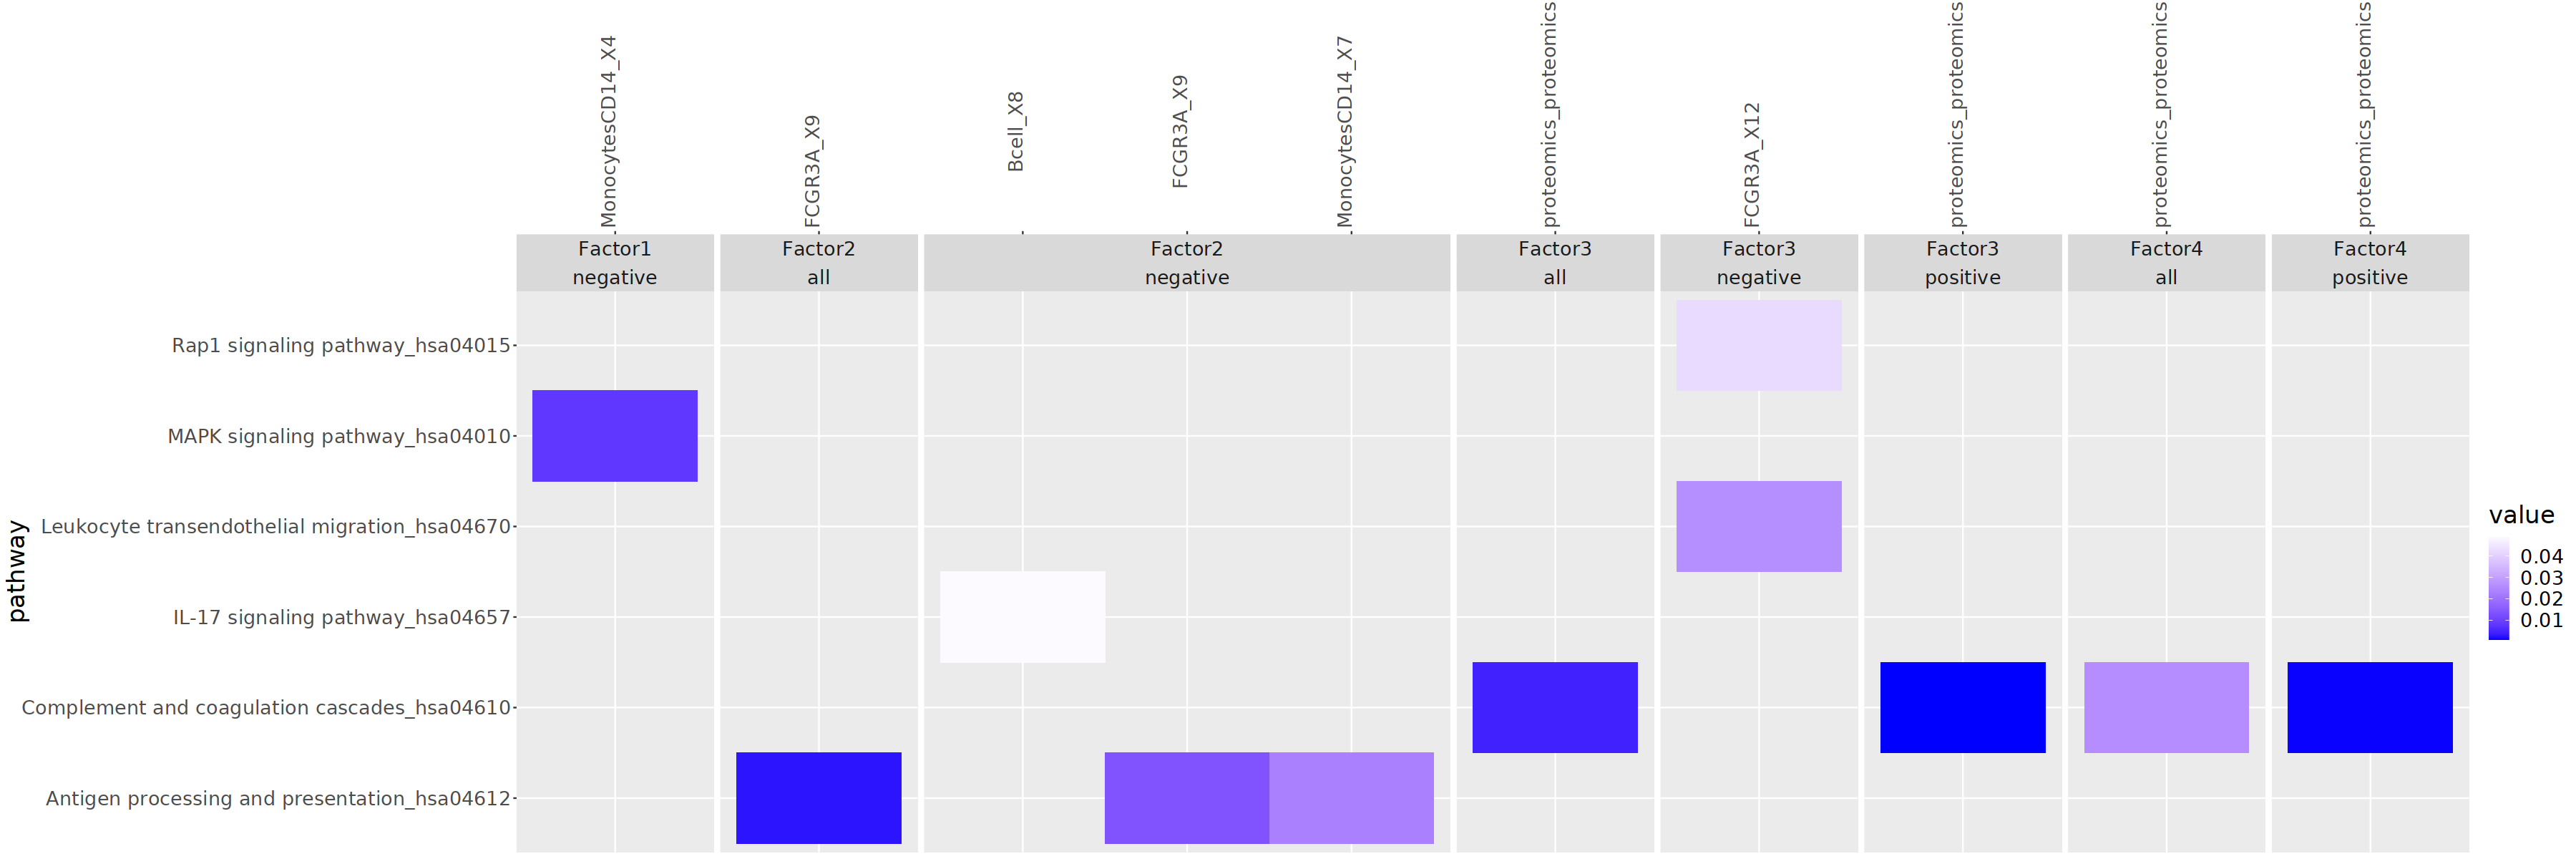

In [440]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(enrichment_result_p_val_adjusted, aes(view, pathway, fill= value)) + theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + geom_tile() + scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + facet_grid(~  variable  +  enrichment, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")  

### Visualize top genes and pathways for a selectd factor

In [2517]:
select_thres = 0.125   # choose threshold of top x % of features of MOFA factor to take into account

In [2518]:
select_factor = 'Factor1'  # choose factor that should be visualized

In [2519]:
### Get involved genes

In [2520]:
## Define gene-set to merge
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(select_thres)
geneset_oi_pos_per_factor$direction = 'positive'
geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-select_thres)

geneset_oi_neg_per_factor$direction = 'negative'


Selecting by value
Selecting by value


In [2521]:
geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)


In [2522]:
geneset_oi = geneset_oi[geneset_oi$variable == select_factor,]

In [2523]:
nrow(geneset_oi)

[1] 3318

In [2524]:
geneset_oi = merge(geneset_oi, gene_mapping, by.x = 'gene', by.y = 'SYMBOL')

In [2525]:
nrow(geneset_oi)

[1] 3209

In [2526]:
head(geneset_oi,2)

gene    type        variable_name          view                     variable
1 ABHD17A X3_NK       X3_NK__ABHD17A         NK cells (Cluster 3)     Factor1 
2 ABHD17A X1_TcellCD8 X1_T.cell.CD8__ABHD17A CD8+ T cells (Cluster 1) Factor1 
  value     direction ENTREZID n
1 0.3059743 positive  81926    1
2 0.3521716 positive  81926    1

In [2527]:
nrow(geneset_oi)

[1] 3209

In [2528]:
### Merge enriched pathways to genes of pathway

In [2529]:
#nrow(kegg_pathways_data)

In [2530]:
pathways_vis = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [2531]:
head(pathways_vis,2)

pathway_id pathway                          variable value      
1  hsa04010   MAPK signaling pathway_hsa04010  Factor1  0.007849678
17 hsa04657   IL-17 signaling pathway_hsa04657 Factor1  0.052082639
   view             enrichment Category            Name                   
1  MonocytesCD14_X4 negative   Signal transduction MAPK signaling pathway 
17 FCGR3A_X9        negative   Immune system       IL-17 signaling pathway

In [2532]:
pathways_vis_genes = merge(pathways_vis, kegg_pathways_data, by.x = 'pathway_id', by.y = 'pathway')

In [2533]:
head(pathways_vis_genes,2)

pathway_id pathway                         variable value      
1 hsa04010   MAPK signaling pathway_hsa04010 Factor1  0.007849678
2 hsa04010   MAPK signaling pathway_hsa04010 Factor1  0.007849678
  view             enrichment Category.x          Name.x                
1 MonocytesCD14_X4 negative   Signal transduction MAPK signaling pathway
2 MonocytesCD14_X4 negative   Signal transduction MAPK signaling pathway
  gene_id   name                   Category.y          Name.y                
1 10125     MAPK signaling pathway Signal transduction MAPK signaling pathway
2 100137049 MAPK signaling pathway Signal transduction MAPK signaling pathway

In [2534]:
### Filter on genes in geneset_oi

In [2535]:
head(geneset_oi,2)

gene    type        variable_name          view                     variable
1 ABHD17A X3_NK       X3_NK__ABHD17A         NK cells (Cluster 3)     Factor1 
2 ABHD17A X1_TcellCD8 X1_T.cell.CD8__ABHD17A CD8+ T cells (Cluster 1) Factor1 
  value     direction ENTREZID n
1 0.3059743 positive  81926    1
2 0.3521716 positive  81926    1

In [2536]:
geneset_oi$type = paste0(str_replace(geneset_oi$type, 'X.*_', '') , '_', str_replace(geneset_oi$type, '_.*', ''))

In [2537]:
unique(geneset_oi$type )

[1] "NK_X3"            "TcellCD8_X1"      "MonocytesCD14_X4" "TcellCD4_X2"     
 [5] "TcellCD4_X0"      "Dendritic_X13"    "FCGR3A_X9"        "MonocytesCD14_X6"
 [9] "MonocytesCD14_X7" "FCGR3A_X12"       "Bcell_X8"         "TcellCD4_X5"     
[13] "TcellCD4_X11"     "Bcell_X10"

In [2538]:
unique(pathways_vis_genes$view)

[1] "MonocytesCD14_X4" "FCGR3A_X9"        "TcellCD4_X11"

In [2539]:
pathway_vis_genes_add = pathways_vis_genes[pathways_vis_genes$view == 'complete_complete',]

In [2540]:
pathways_vis_genes = merge(pathways_vis_genes, geneset_oi, by.x = c('gene_id', 'variable', 'view'), by.y = c('ENTREZID','variable',  'type' ))

In [2541]:
pathway_vis_genes_add = merge(pathway_vis_genes_add, geneset_oi, by.x = c('gene_id', 'variable'), by.y = c('ENTREZID','variable' ))

In [2542]:
pathway_vis_genes_add$type = NULL

In [2543]:
sort(colnames(pathway_vis_genes_add))

[1] "Category.x"    "Category.y"    "direction"     "enrichment"   
 [5] "gene"          "gene_id"       "n"             "name"         
 [9] "Name.x"        "Name.y"        "pathway"       "pathway_id"   
[13] "value.x"       "value.y"       "variable"      "variable_name"
[17] "view.x"        "view.y"

In [2544]:
sort(colnames(pathways_vis_genes))

[1] "Category.x"    "Category.y"    "direction"     "enrichment"   
 [5] "gene"          "gene_id"       "n"             "name"         
 [9] "Name.x"        "Name.y"        "pathway"       "pathway_id"   
[13] "value.x"       "value.y"       "variable"      "variable_name"
[17] "view"          "view.y"

In [2545]:
#head(pathways_vis_genes,2)

In [2546]:
pathways_vis_genes = rbind(pathways_vis_genes, pathway_vis_genes_add)

In [2547]:
pathways_vis_genes = unique(pathways_vis_genes)

In [2548]:
head(pathways_vis_genes,2)

gene_id variable view             pathway_id pathway                        
1 10746   Factor1  MonocytesCD14_X4 hsa04010   MAPK signaling pathway_hsa04010
2 1326    Factor1  MonocytesCD14_X4 hsa04010   MAPK signaling pathway_hsa04010
  value.x     enrichment Category.x          Name.x                
1 0.007849678 negative   Signal transduction MAPK signaling pathway
2 0.007849678 negative   Signal transduction MAPK signaling pathway
  name                   Category.y          Name.y                 gene  
1 MAPK signaling pathway Signal transduction MAPK signaling pathway MAP3K2
2 MAPK signaling pathway Signal transduction MAPK signaling pathway MAP3K8
  variable_name               view.y                           value.y   
1 X4_Monocytes...CD14__MAP3K2 CD14(high) Monocytes (Cluster 4) -0.3561790
2 X4_Monocytes...CD14__MAP3K8 CD14(high) Monocytes (Cluster 4) -0.1904356
  direction n
1 negative  1
2 negative  1

In [2549]:
pathways_vis_genes = pathways_vis_genes %>% group_by(gene, pathway, variable, gene_id) %>% summarise(factor_value = mean(value.y))

`summarise()` has grouped output by 'gene', 'pathway', 'variable'. You can
override using the `.groups` argument.


In [2550]:
nrow(pathways_vis_genes)

[1] 26

In [2551]:
### Visualization - Part 1 (Genes + Factor values)

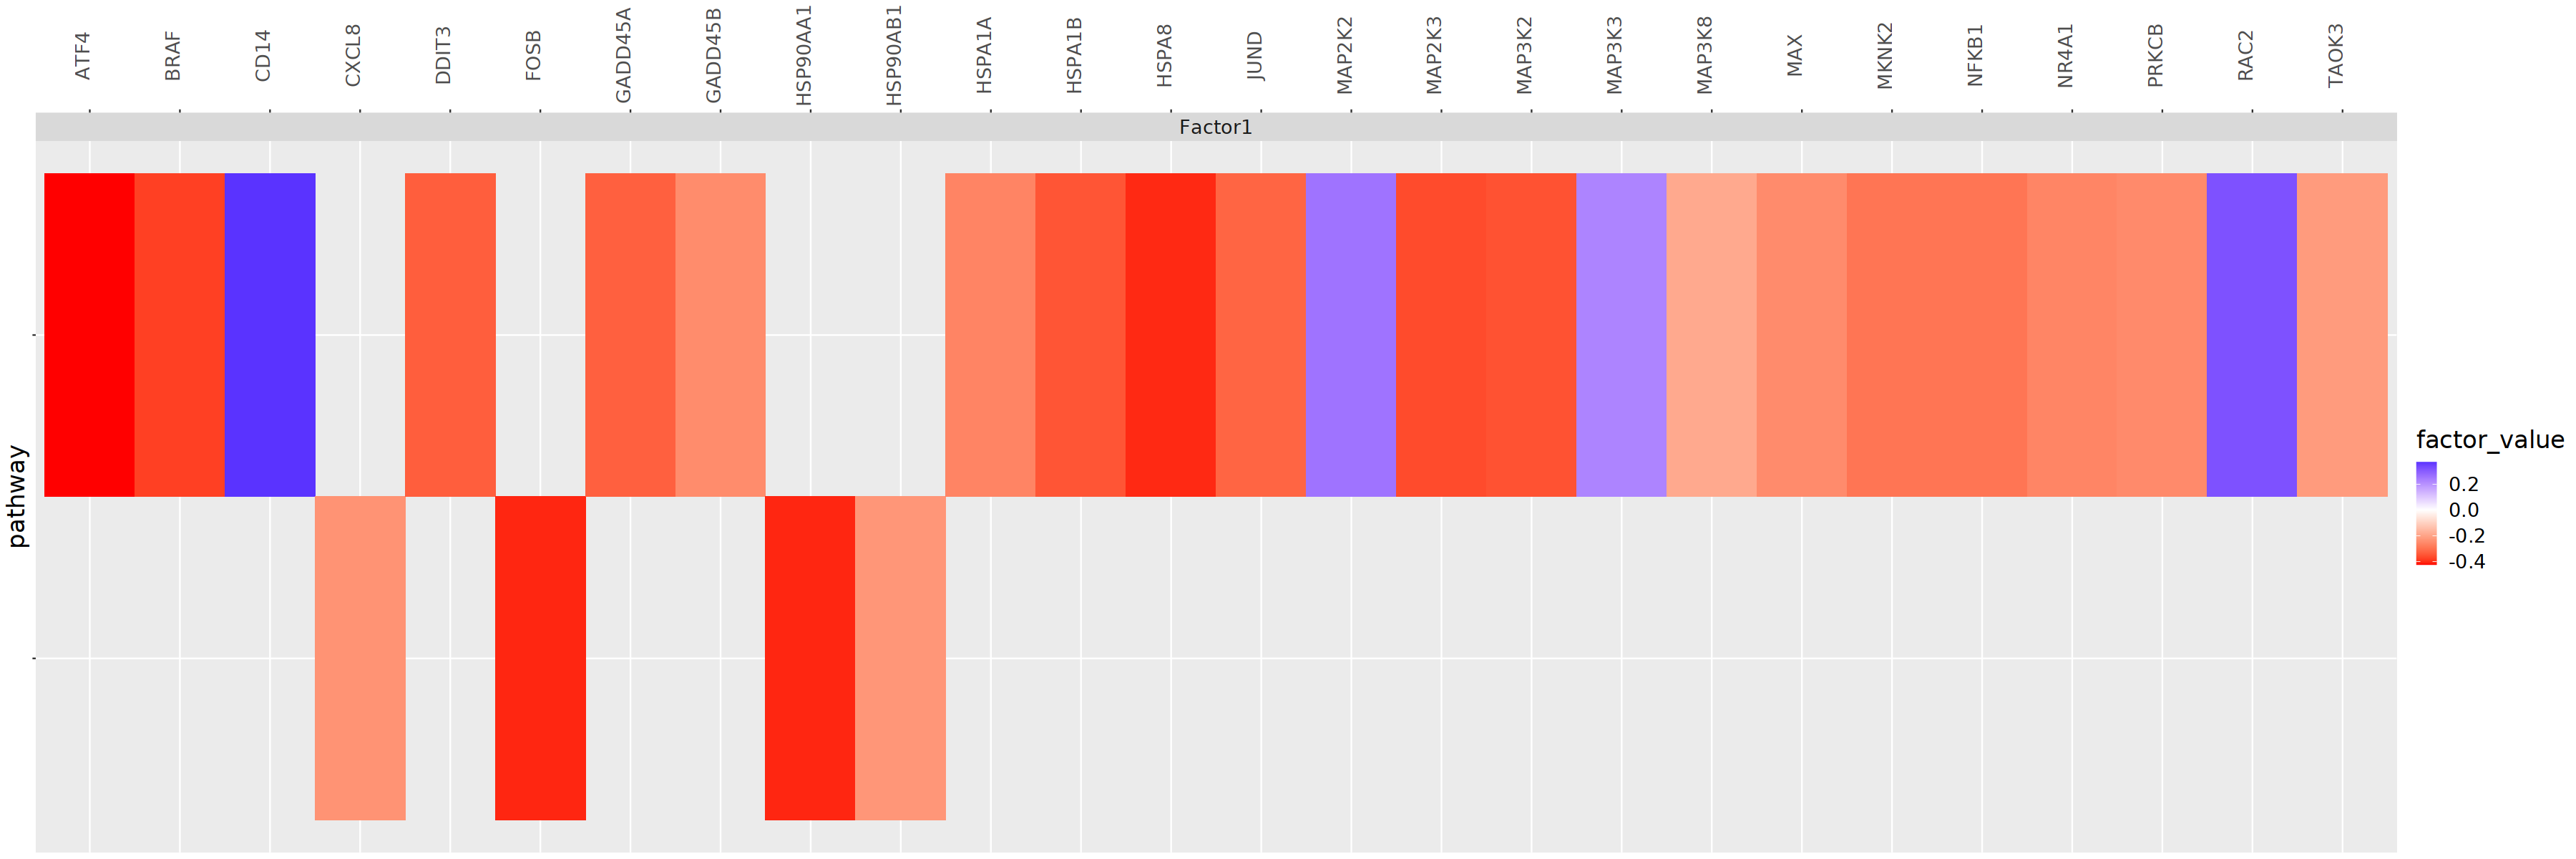

In [2552]:
options(repr.plot.width=30, repr.plot.height=10)
g1 = ggplot(pathways_vis_genes, aes(gene,  pathway, fill= factor_value)) + theme(text = element_text(size=20), axis.title.x=element_blank(), axis.text.x=element_text(angle=90), axis.text.y=element_blank(), strip.text.y.right =element_text(angle=0)) + geom_tile() + scale_fill_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0)  + facet_grid(.~ variable, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")   
g1

In [2553]:
### Visualization - Part 2 (pathways and cluster of enrichment)

In [2554]:
### Visualize for which cluster the pathway is enriched
data_vis2 = unique(pathways_vis[,c('pathway', 'view',  'value', 'variable')])

In [2555]:
data_vis2$pathway = str_replace(data_vis2$pathway, '_.*', '')

In [2556]:
#data_vis2$value = 1

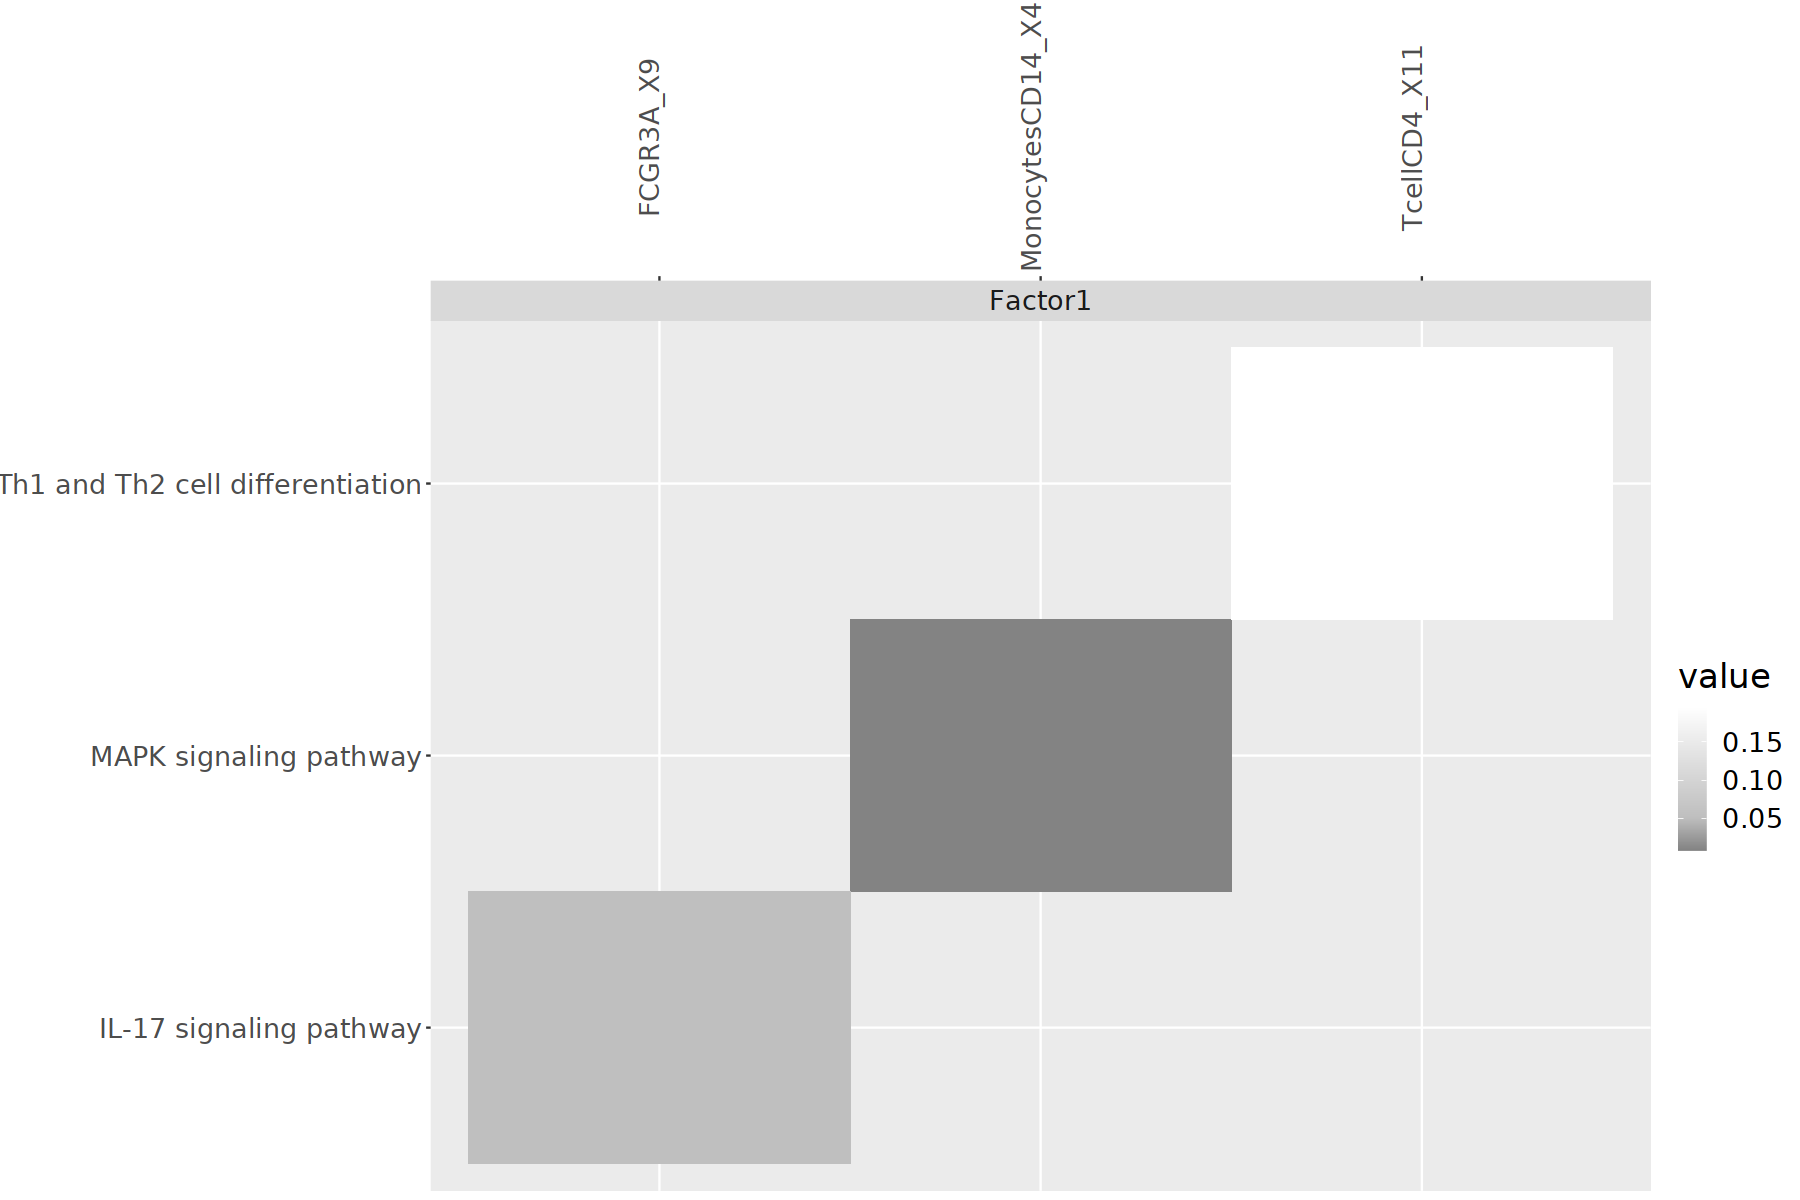

In [2557]:
options(repr.plot.width=15, repr.plot.height=10)
g2 = ggplot(data_vis2, aes(view,  pathway, fill= value)) + theme(text = element_text(size=20),axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=90), axis.title.x=element_blank(),axis.title.y=element_blank(),
                                                                ) + geom_tile() + scale_fill_gradient2(low = "black", mid = "grey", high = "white", midpoint = 0.05)  + facet_grid(.~  variable, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")   
g2

In [2558]:
### Combine both plots and save

In [2559]:
options(repr.plot.width=30, repr.plot.height=12)
final_plot = ggarrange(g2,g1, ncol = 2, nrow= 1, align = "h", common.legend = FALSE,widths = c(1,2)) 

In [2560]:
final_plot

In [2561]:
## Save the plot

In [2562]:
select_factor

[1] "Factor1"

In [2563]:
weight_views

[1] FALSE

In [2564]:
pdf(paste0('figures/E6_Pathways/E6_KEGG_MOFA_Enriched_Pathways' , name, '_', weight_views, '_', select_factor, '_', select_thres, '.pdf'), width =30, height = 12)
print(final_plot)
dev.off()

png 
  2

### Visualize selected pathways in KEGG format

In [2565]:
head(pathways_vis_genes)

gene  pathway                          variable gene_id factor_value
1 ATF4  MAPK signaling pathway_hsa04010  Factor1  468     -0.4274468  
2 BRAF  MAPK signaling pathway_hsa04010  Factor1  673     -0.3820367  
3 CD14  MAPK signaling pathway_hsa04010  Factor1  929      0.3725816  
4 CXCL8 IL-17 signaling pathway_hsa04657 Factor1  3576    -0.2372480  
5 DDIT3 MAPK signaling pathway_hsa04010  Factor1  1649    -0.3373163  
6 FOSB  IL-17 signaling pathway_hsa04657 Factor1  2354    -0.4088074

In [2566]:
### Visualize some pathways

In [2567]:
## Visualize a kegg pathway

In [2568]:
#### Define genes that will be displayed

In [2569]:
unique(pathways_vis_genes$pathway)

[1] "MAPK signaling pathway_hsa04010"  "IL-17 signaling pathway_hsa04657"

In [2570]:
pathway = 'PI3K-Akt signaling pathway_hsa04151'

In [2571]:
### Select data for vis

In [2572]:
data_pathway_vis = pathways_vis_genes[pathways_vis_genes$pathway == pathway,]

In [2573]:
data_pathway_vis[order(abs(data_pathway_vis$factor_value), decreasing = TRUE),]

gene pathway variable gene_id factor_value

In [2574]:
gene_data_input = data_pathway_vis$factor_value

In [2575]:
names(gene_data_input) = data_pathway_vis$gene_id

In [2576]:
gene_data_input

named numeric(0)

In [2577]:
#### Visualize pathway

In [2578]:
#Example how to look at a enriched pathway with the KEGG pathway viewer
hsa04110 = pathview(gene.data  = gene_data_input,
                     pathway.id = str_replace(pathway, '.*_', ''),
                     species    = "hsa", kegg.dir = 'figures/E6_Pathways/', out.suffix = paste0(select_factor, '_', select_thres, '_', name, '_', weight_views), node.sum = "max.abs"
                   
                   )

Argument gene.idtype or cpd.idtype may be wrong.

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /home/icb/corinna.losert/projects/stark-stemi/scripts

Info: Writing image file hsa04151.Factor1_0.125_V_FINAL_INTEGRATED_FALSE.png



### Archive

In [2579]:
### Example plot to make based on output of enrichment function for one dimension

In [2580]:
plot_enrichment_heatmap(enrichment.parametric)

ERROR: Error in plot_enrichment_heatmap(enrichment.parametric): object 'enrichment.parametric' not found


In [ ]:
plot_enrichment_detailed(enrichment.parametric, 
  factor = 1, 
  max.genes = 8, 
  max.pathways = 5, text_size = 5
)

## REACTOME  (cluster)

### Analyze and visualize significant results

In [441]:
min(enrichment_result_p_val_adjusted_reactome_cluster$value, na.rm = T)

[1] 2.752121e-07

In [442]:
max(enrichment_result_p_val_adjusted_reactome_cluster$value, na.rm = T)

[1] 16

In [443]:
enrichment_result_p_val_adjusted_reactome_cluster[(enrichment_result_p_val_adjusted_reactome_cluster$variable == 'Factor2') &(enrichment_result_p_val_adjusted_reactome_cluster$pathway == 'R-HSA-1059683') , ]

pathway       variable value     view             enrichment
11386 R-HSA-1059683 Factor2   5.099627 X4_MonocytesCD14 all       
12056 R-HSA-1059683 Factor2  16.000000 X4_MonocytesCD14 negative  
12726 R-HSA-1059683 Factor2   8.627988 X4_MonocytesCD14 positive

In [444]:
### Investigate significant results

In [445]:
significance_threshold = 0.05

In [446]:
enrichment_result_p_val_adjusted = enrichment_result_p_val_adjusted_reactome_cluster[enrichment_result_p_val_adjusted_reactome_cluster$value <= significance_threshold,]

In [447]:
head(enrichment_result_p_val_adjusted,2)

pathway       variable value       view       enrichment
1400 ALL           Factor3  0.005070029 proteomics all       
1401 R-HSA-1236974 Factor3  0.041822771 proteomics all

In [448]:
nrow(enrichment_result_p_val_adjusted)

[1] 88

In [449]:
### Add pathway names

In [450]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, term2name, )

In [451]:
nrow(enrichment_result_p_val_adjusted)

[1] 84

In [452]:
### Filter on relevant pathways (in case not already done before analysis)

In [453]:
head(immune_system_pathways,2)

index ID           
1 1     R-HSA-168256 
2 2     R-HSA-1280215

In [454]:
#enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, immune_system_pathways, by.x = 'pathway', by.y = 'ID')

In [455]:
nrow(enrichment_result_p_val_adjusted)

[1] 84

In [456]:
### Improve textual description of clusters

In [457]:
enrichment_result_p_val_adjusted$view = paste0(str_replace(enrichment_result_p_val_adjusted$view, 'X.*_', ''), '_', str_replace(enrichment_result_p_val_adjusted$view, '_.*', ''))

In [458]:
head(enrichment_result_p_val_adjusted)

pathway       variable value        view                  enrichment
1 R-HSA-1236974 Factor5  0.0006002898 MonocytesCD14_X4      negative  
2 R-HSA-1236974 Factor1  0.0240481493 MonocytesCD14_X4      positive  
3 R-HSA-1236974 Factor3  0.0418227707 proteomics_proteomics all       
4 R-HSA-1236975 Factor3  0.0418227707 proteomics_proteomics all       
5 R-HSA-1236975 Factor5  0.0006002898 MonocytesCD14_X4      negative  
6 R-HSA-1236975 Factor1  0.0007539091 MonocytesCD14_X4      positive  
  name                                  
1  ER-Phagosome pathway                 
2  ER-Phagosome pathway                 
3  ER-Phagosome pathway                 
4  Antigen processing-Cross presentation
5  Antigen processing-Cross presentation
6  Antigen processing-Cross presentation

In [459]:
### Visualize result

In [460]:
options(repr.plot.width=30, repr.plot.height=20)
ggplot(enrichment_result_p_val_adjusted, aes(view, name, fill= value)) + theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + geom_tile() + scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + facet_grid(~  variable  +  enrichment, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")  

### Visualize top genes and pathways for a selectd factor

In [ ]:
select_thres = 0.125 # choose threshold of top x % of features of MOFA factor to take into account

In [ ]:
weight_views

In [ ]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [ ]:
### Get involved genes

In [ ]:
## Define gene-set to merge
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(select_thres)
geneset_oi_pos_per_factor$direction = 'positive'
geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-select_thres)

geneset_oi_neg_per_factor$direction = 'negative'


In [ ]:
geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)


In [ ]:
geneset_oi = geneset_oi[geneset_oi$variable == select_factor,]

In [ ]:
nrow(geneset_oi)

In [ ]:
geneset_oi = merge(geneset_oi, gene_mapping, by.x = 'gene', by.y = 'SYMBOL')

In [ ]:
nrow(geneset_oi)

In [ ]:
head(geneset_oi,2)

In [ ]:
nrow(geneset_oi)

In [ ]:
### Merge enriched pathways to genes of pathway

In [ ]:
#nrow(kegg_pathways_data)

In [ ]:
pathways_vis = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [ ]:
head(pathways_vis,2)

In [ ]:
sort(unique(pathways_vis$name))

In [ ]:
## Optional: remove very general pathways

In [ ]:
pathways_vis = pathways_vis[!pathways_vis$name %in% c(' Adaptive Immune System',' Innate Immune System', ' Immune System', ' Neutrophil degranulation' ),]

In [ ]:
head(pathways_vis,2)

In [ ]:
#head(term2gene,2)

In [ ]:
pathways_vis_genes = merge(pathways_vis, term2gene[,c('SYMBOL', 'pathway')], by.x = 'pathway', by.y = 'pathway')

In [ ]:
head(pathways_vis_genes,2)

In [ ]:
### Filter on genes in geneset_oi

In [ ]:
head(geneset_oi,2)

In [ ]:
geneset_oi$type = paste0(str_replace(geneset_oi$type, 'X.*_', '') , '_', str_replace(geneset_oi$type, '_.*', ''))

In [ ]:
unique(geneset_oi$type )

In [ ]:
unique(pathways_vis_genes$view)

In [ ]:
pathway_vis_genes_add = pathways_vis_genes[pathways_vis_genes$view == 'complete_complete',]

In [ ]:
head(pathway_vis_genes_add,2)

In [ ]:
head(geneset_oi,2)

In [ ]:
pathways_vis_genes = merge(pathways_vis_genes, geneset_oi, by.x = c('SYMBOL', 'variable', 'view'), by.y = c('gene','variable',  'type' ))

In [ ]:
pathway_vis_genes_add = merge(pathway_vis_genes_add, geneset_oi, by.x = c('SYMBOL', 'variable'), by.y = c('gene','variable' ))

In [ ]:
pathway_vis_genes_add$type = NULL

In [ ]:
sort(colnames(pathway_vis_genes_add))

In [ ]:
sort(colnames(pathways_vis_genes))

In [ ]:
#head(pathways_vis_genes,2)

In [ ]:
pathways_vis_genes = rbind(pathways_vis_genes, pathway_vis_genes_add)

In [ ]:
pathways_vis_genes = unique(pathways_vis_genes)

In [ ]:
head(pathways_vis_genes,2)

In [ ]:
pathways_vis_genes = pathways_vis_genes %>% group_by(SYMBOL, pathway, name, variable) %>% summarise(factor_value = mean(value.y))

In [ ]:
nrow(pathways_vis_genes)

In [ ]:
head(pathways_vis_genes[pathways_vis_genes$name == ' Neutrophil degranulation',])

In [ ]:
### Improve plotting - order and filter pathways with only very low amount of belonging genes

In [ ]:
pathway_order = pathways_vis_genes %>% group_by(pathway, variable, name) %>% count() %>% arrange(desc(n))

In [ ]:
unique(term2gene$n)

In [ ]:
pathway_gene_size =term2gene %>% group_by(pathway) %>% summarise(gene_size = sum(n))

In [ ]:
pathway_order = merge(pathway_order, pathway_gene_size)

In [ ]:
head(pathway_order[pathway_order$name == ' Neutrophil degranulation',])

In [ ]:
pathway_order$percentage_covered = pathway_order$n / pathway_order$gene_size

In [ ]:
pathway_order = pathway_order[order(pathway_order$percentage_covered, decreasing = TRUE),]

In [ ]:
head(pathway_order,2)

In [ ]:
min_genes_thres = 5
## Alternative or combination
max_amount_pathways = 25
## Alternative of combination
min_coverage = 0.2

In [ ]:
pathway_order = pathway_order[(pathway_order$n >= min_genes_thres) & (pathway_order$percentage_covered >= min_coverage),]

In [ ]:
nrow(pathway_order)

In [ ]:
pathway_order = head(pathway_order, max_amount_pathways)

In [ ]:
min(pathway_order$percentage_covered)

In [ ]:
tail(pathway_order,5)

In [ ]:
pathways_vis_genes = merge( pathways_vis_genes, pathway_order)

In [ ]:
pathways_vis = merge(pathways_vis, pathway_order)

In [ ]:
### Visualization - Part 1 (Genes + Factor values)

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
g1 = ggplot(pathways_vis_genes, aes(SYMBOL,  reorder(name, percentage_covered), fill= factor_value)) + theme(text = element_text(size=15), axis.title.x=element_blank(),axis.title.y=element_blank(), axis.text.x=element_text(angle=90), axis.text.y=element_blank(), strip.text.y.right =element_text(angle=0)) + geom_tile() + scale_fill_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0)  + facet_grid(.~ variable, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")   
g1

In [ ]:
### Visualization - Part 2 (pathways and cluster of enrichment)

In [ ]:
### Visualize for which cluster the pathway is enriched
data_vis2 = unique(pathways_vis[,c('pathway', 'view',  'value', 'variable', 'name', 'n', 'percentage_covered')])

In [ ]:
data_vis2$pathway = str_replace(data_vis2$pathway, '_.*', '')

In [ ]:
head(data_vis2[order(data_vis2$percentage_covered, decreasing = TRUE),],4)

In [ ]:
#data_vis2$value = 1

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
g2 = ggplot(data_vis2, aes(view,  reorder(name,percentage_covered), fill= value)) + theme(text = element_text(size=15),axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=90), axis.title.x=element_blank(),axis.title.y=element_blank(),
                                                                ) + geom_tile() + scale_fill_gradient2(low = "black", mid = "grey", high = "white", midpoint = 0.05)  + facet_grid(.~  variable, space = 'free' , scales = 'free') + scale_x_discrete(position = "top")   
g2

In [ ]:
### Combine both plots and save

In [ ]:
options(repr.plot.width=30, repr.plot.height=12)
final_plot = ggarrange(g2,g1, ncol = 2, nrow= 1, align = "h", common.legend = FALSE,widths = c(1,1.5)) 

In [ ]:
final_plot

In [ ]:
## Save the plot

In [ ]:
select_factor

In [ ]:
weight_views

In [ ]:
pdf(paste0('figures/E6_Pathways/E6_REACTOME_MOFA_Enriched_Pathways' , name, '_', weight_views, '_', select_factor, '_', select_thres, '.pdf'), width =30, height = 12)
print(final_plot)
dev.off()

### Visualize selected pathways in REACTOME format

In [ ]:
head(pathways_vis_genes)

In [ ]:
### Visualize some pathways

In [ ]:
## Visualize a kegg pathway

In [ ]:
#### Define genes that will be displayed

In [ ]:
sort(unique(pathways_vis_genes$name))

In [ ]:
pathway =' TRAF6-mediated induction of TAK1 complex within TLR4 complex'

In [ ]:
str_replace(pathway, ' ', '')

In [ ]:
### Select data for vis

In [ ]:
data_pathway_vis = pathways_vis_genes[pathways_vis_genes$name == pathway,]

In [ ]:
nrow(data_pathway_vis)

In [ ]:
head(data_pathway_vis,2)

In [ ]:
gene_mapping$n = NULL

In [ ]:
head(gene_mapping,2)

In [ ]:
data_pathway_vis = merge(data_pathway_vis, gene_mapping)

In [ ]:
nrow(data_pathway_vis)

In [ ]:
#data_pathway_vis[order(abs(data_pathway_vis$factor_value), decreasing = TRUE),]

In [ ]:
gene_data_input = data_pathway_vis$factor_value

In [ ]:
names(gene_data_input) = data_pathway_vis$ENTREZID

In [ ]:
gene_data_input

In [ ]:
#### Visualize pathway

In [ ]:
network_plot = viewPathway(str_replace(pathway, ' ', ''), 
            readable = TRUE, foldChange = gene_data_input)

In [ ]:
### Improve visualization

In [ ]:
network_plot = network_plot + ggtitle(paste0('Enriched Pathway on ' ,select_factor, ' : ', pathway, ' (' , name, '_', weight_views, '_',  select_thres, ' ) ')) + theme(plot.title = element_text(size = 20, face = "bold"), legend.title = element_blank()) + labs(color='Factor Weights') + scale_colour_gradient2(low = 'red', high ='blue', midpoint = 0)

In [ ]:
network_plot

In [ ]:
### Save

In [ ]:
pdf(paste0('figures/E6_Pathways/E6_REACTOME_' , str_replace_all(pathway, ' ', ''), '_' , name, '_', weight_views, '_', select_factor, '_', select_thres, '.pdf'), width =30, height = 12)
print(network_plot)
dev.off()

## REACTOME Overall 

### Get significant results

In [378]:
## Set significance threshold for filtering
significance_threshold = 0.05

In [379]:
min(enrichment_result_p_val_adjusted_reactome_all$value, na.rm = T)

[1] 2.953577e-25

In [380]:
unique(enrichment_result_p_val_adjusted_reactome_all$view)

[1] "complete"

In [381]:
unique(enrichment_result_p_val_adjusted_reactome_all$variable)

[1] Factor1 Factor2 Factor3 Factor4 Factor5
Levels: Factor1 Factor2 Factor3 Factor4 Factor5

In [382]:
### Investigate significant results

In [383]:
enrichment_result_p_val_adjusted = enrichment_result_p_val_adjusted_reactome_all[enrichment_result_p_val_adjusted_reactome_all$value <= significance_threshold,]

In [384]:
head(enrichment_result_p_val_adjusted,2)

pathway       variable value       view     enrichment
1 ALL           Factor1  0.009455985 complete all       
2 R-HSA-1059683 Factor1  0.002822542 complete all

In [385]:
nrow(enrichment_result_p_val_adjusted)

[1] 610

In [386]:
enrichment_result_p_val_adjusted %>% group_by(variable, enrichment) %>% count()

variable enrichment n 
1  Factor1  all        79
2  Factor1  negative   56
3  Factor1  positive   40
4  Factor2  all        87
5  Factor2  negative   60
6  Factor2  positive   50
7  Factor3  all         8
8  Factor3  negative   38
9  Factor3  positive   12
10 Factor4  all         6
11 Factor4  negative    5
12 Factor4  positive   17
13 Factor5  all        47
14 Factor5  negative   82
15 Factor5  positive   23

In [387]:
### Add pathway names

In [388]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, term2name, )

In [389]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [390]:
### Add covarage

In [391]:
head(filter_pathways,2)

pathway       amount_na total_amount coverage 
1 R-HSA-1059683  4        11           0.6363636
2 R-HSA-1168372 43        83           0.4819277

In [392]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, filter_pathways)

In [393]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [394]:
### Filter on relevant pathways (in case not already done before analysis)

In [395]:
head(immune_system_pathways,2)

index ID           
1 1     R-HSA-168256 
2 2     R-HSA-1280215

In [396]:
#enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, immune_system_pathways, by.x = 'pathway', by.y = 'ID')

In [397]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [398]:
### Improve textual description of clusters

In [399]:
enrichment_result_p_val_adjusted$view = paste0(str_replace(enrichment_result_p_val_adjusted$view, 'X.*_', ''), '_', str_replace(enrichment_result_p_val_adjusted$view, '_.*', ''))

In [400]:
head(enrichment_result_p_val_adjusted,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor5  0.0443209880 complete_complete positive  
  name                     amount_na total_amount coverage 
1  Interleukin-6 signaling 4         11           0.6363636
2  Interleukin-6 signaling 4         11           0.6363636

In [401]:
## Add clustering/ grouping of pathways

In [402]:
head(pathways_clustered,2)

pathway       cluster
1 R-HSA-1059683 12     
2 R-HSA-1168372 10     
  name                                                              
1 Homo sapiens: Interleukin-6 signaling                             
2 Homo sapiens: Downstream signaling events of B Cell Receptor (BCR)

In [403]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [404]:
enrichment_result_p_val_adjusted =merge(enrichment_result_p_val_adjusted, pathways_clustered[,c('pathway', 'cluster')], by.x = 'pathway', by.y = 'pathway')

In [405]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [406]:
head(enrichment_result_p_val_adjusted,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor5  0.0443209880 complete_complete positive  
  name                     amount_na total_amount coverage  cluster
1  Interleukin-6 signaling 4         11           0.6363636 12     
2  Interleukin-6 signaling 4         11           0.6363636 12

In [407]:
enrichment_result_p_val_adjusted_w_o_direction = enrichment_result_p_val_adjusted %>% group_by(pathway,variable, view,name, cluster) %>% summarise(value = mean(value))

`summarise()` has grouped output by 'pathway', 'variable', 'view', 'name'. You
can override using the `.groups` argument.


In [408]:
head(enrichment_result_p_val_adjusted,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor5  0.0443209880 complete_complete positive  
  name                     amount_na total_amount coverage  cluster
1  Interleukin-6 signaling 4         11           0.6363636 12     
2  Interleukin-6 signaling 4         11           0.6363636 12

In [409]:
summarized = enrichment_result_p_val_adjusted %>% dcast(pathway + variable ~ enrichment, value.var = 'value')

In [410]:
head(summarized,2)

pathway       variable all         negative positive    
1 R-HSA-1059683 Factor1  0.002822542 NA                 NA
2 R-HSA-1059683 Factor2           NA NA       0.0005768726

In [411]:
summarized[(!is.na(summarized$negative)) & (!is.na(summarized$positive)),]
# check that pathway is not enriched positively and negatively at the same time

pathway variable all negative positive

In [412]:
head(summarized[(!is.na(summarized$negative)) & (!is.na(summarized$all)),],2)

pathway       variable all          negative     positive
5 R-HSA-1168372 Factor2  1.183591e-07 8.609191e-04 NA      
8 R-HSA-1169091 Factor2  1.576678e-07 7.806701e-06 NA

### Visualize all enriched pathways

In [413]:
### Visualize result

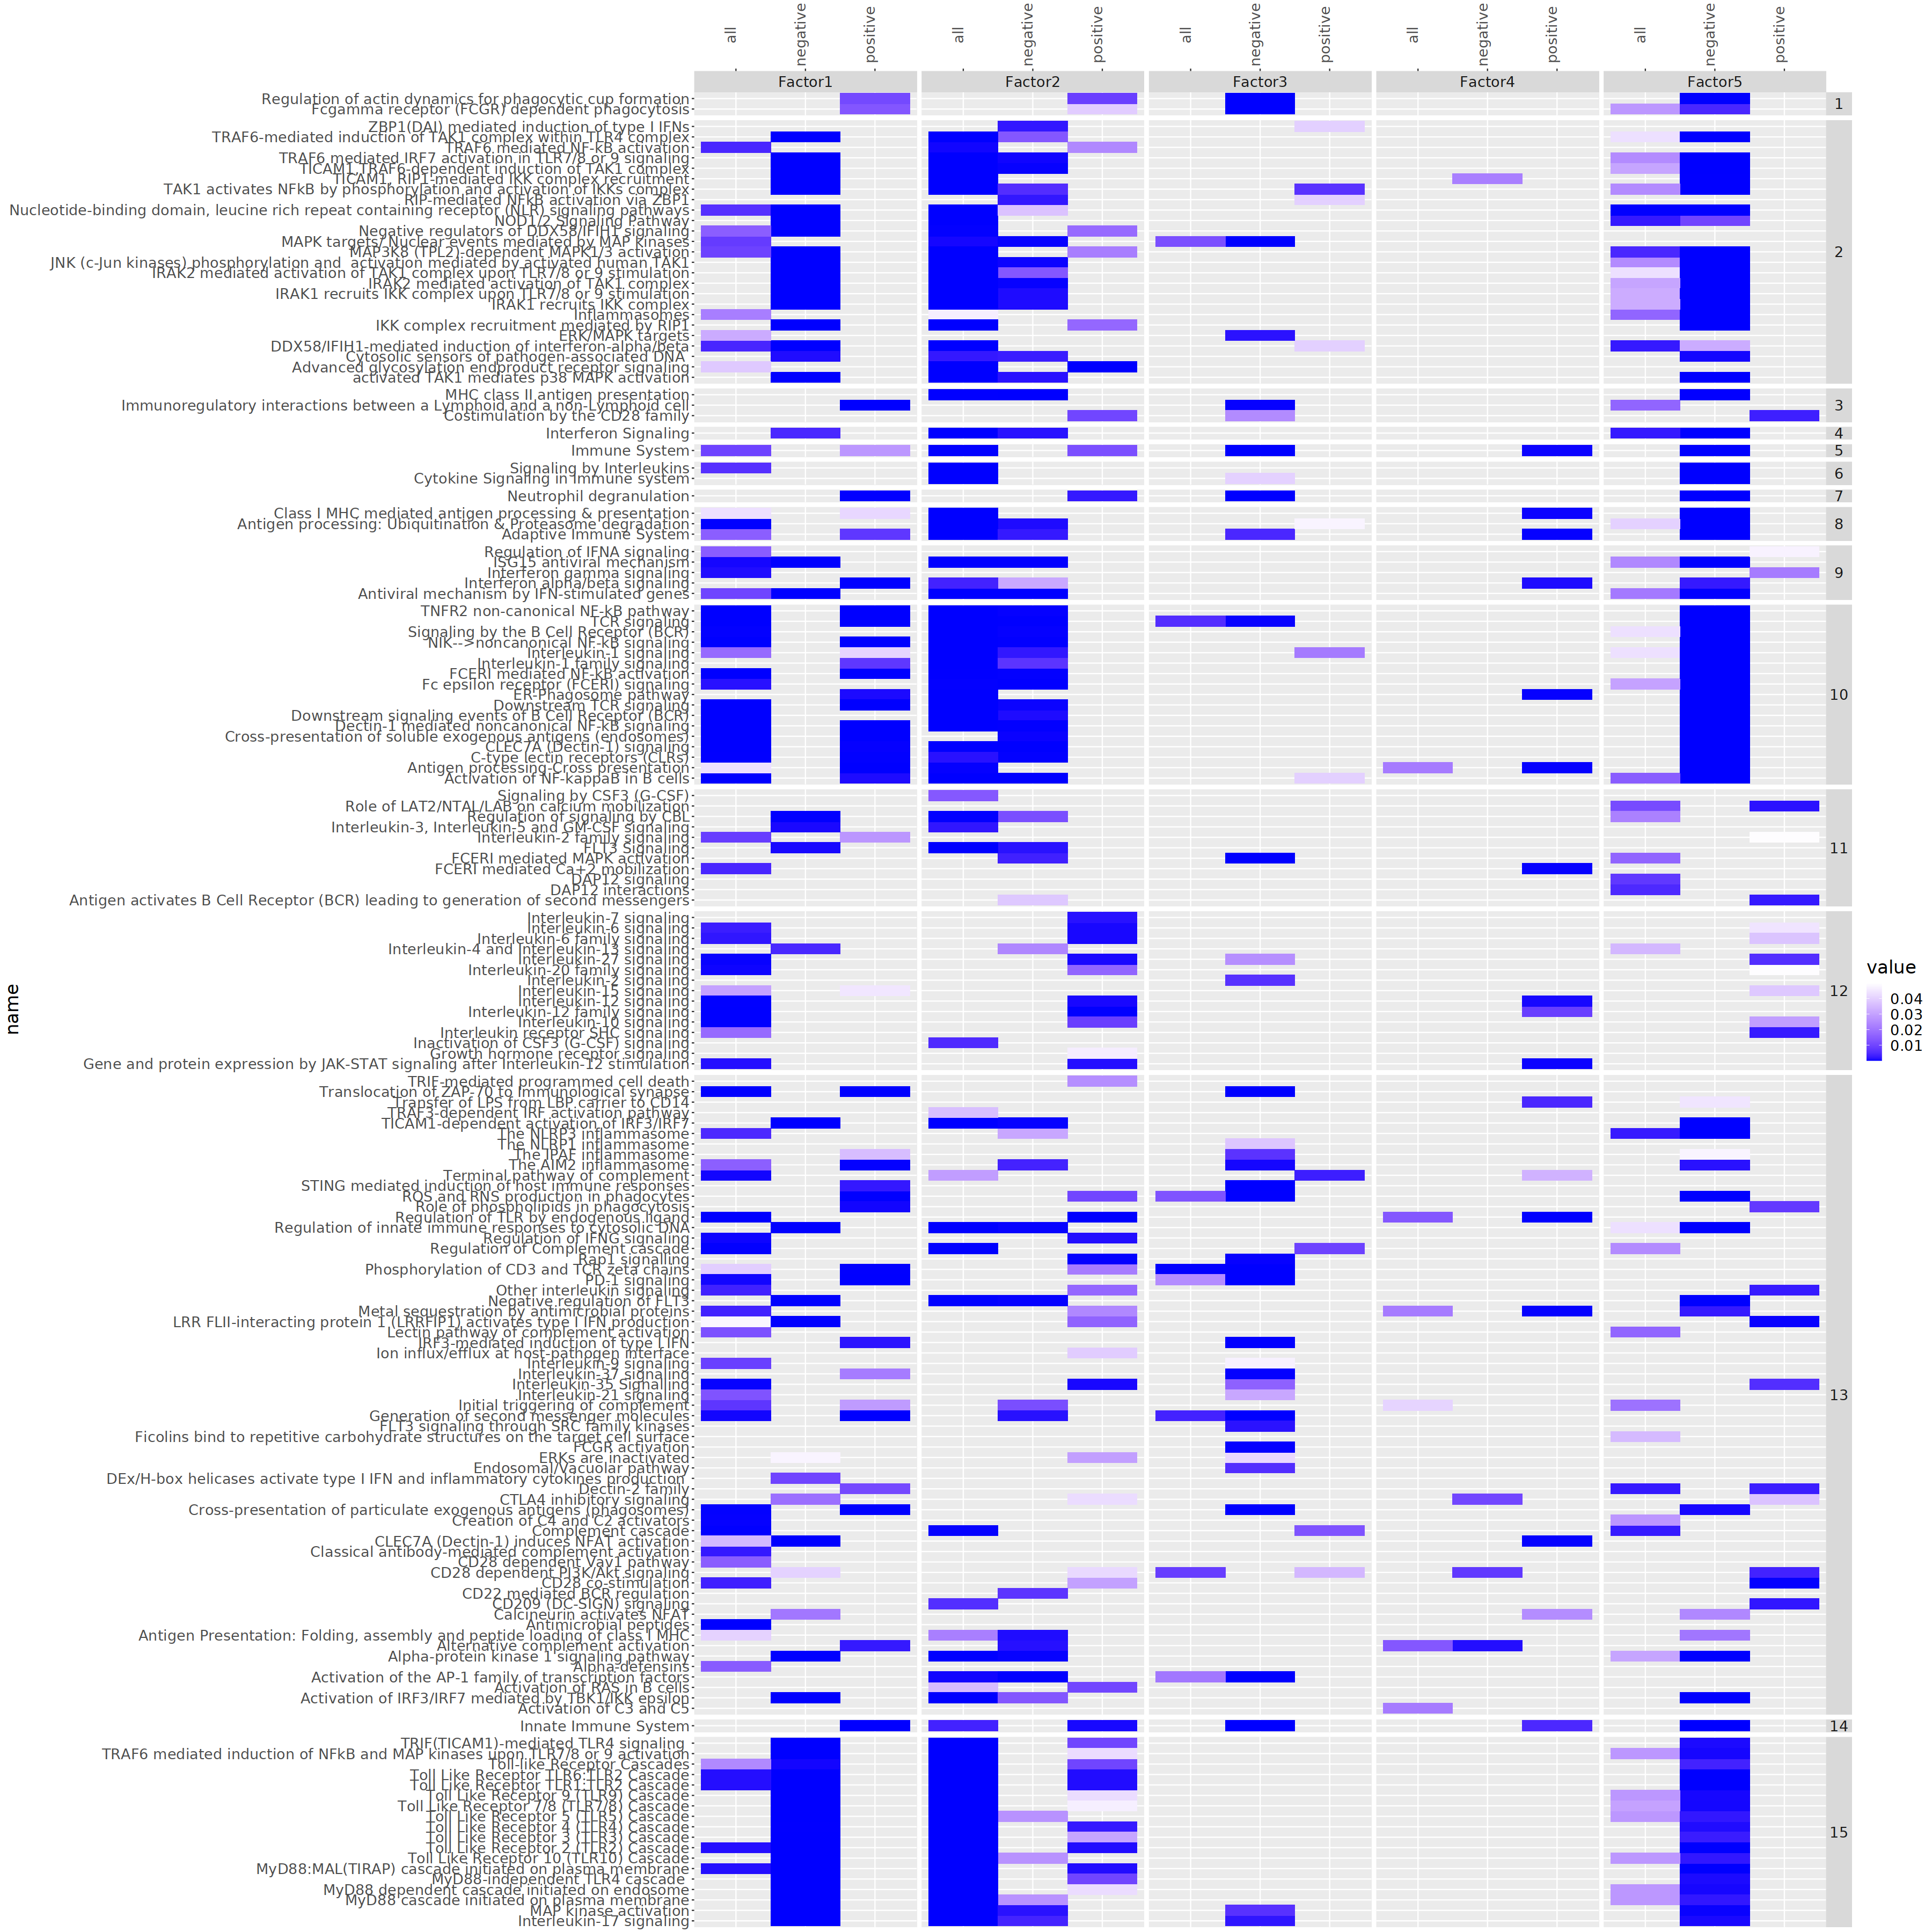

In [414]:
options(repr.plot.width=30, repr.plot.height=30)
ggplot(enrichment_result_p_val_adjusted[ (enrichment_result_p_val_adjusted$enrichment %in% c('all', 'positive', 'negative')),], 
       aes(enrichment, name, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    facet_grid(cluster ~ variable, space = 'free' , scales = 'free') + 
    scale_x_discrete(position = "top")  

In [415]:
options(repr.plot.width=30, repr.plot.height=15)
ggplot(enrichment_result_p_val_adjusted_w_o_direction, 
       aes(variable, name, fill= value)) + 
    theme(text = element_text(size=20), axis.text.y = element_blank(), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    facet_grid(cluster ~ ., space = 'free' , scales = 'free') + 
    scale_x_discrete(position = "top")  

In [416]:
## Check out CD28
enrichment_result_p_val_adjusted[!is.na(str_extract(enrichment_result_p_val_adjusted$name, 'CD28')),]

pathway      variable value        view              enrichment
274 R-HSA-388841 Factor2  0.0100780181 complete_complete positive  
275 R-HSA-388841 Factor3  0.0248624740 complete_complete negative  
276 R-HSA-388841 Factor5  0.0030676800 complete_complete positive  
277 R-HSA-389356 Factor2  0.0296869910 complete_complete positive  
278 R-HSA-389356 Factor1  0.0031703285 complete_complete all       
279 R-HSA-389356 Factor5  0.0001011281 complete_complete positive  
280 R-HSA-389357 Factor3  0.0082933057 complete_complete all       
281 R-HSA-389357 Factor5  0.0035827964 complete_complete positive  
282 R-HSA-389357 Factor4  0.0073017700 complete_complete negative  
283 R-HSA-389357 Factor1  0.0403424521 complete_complete negative  
284 R-HSA-389357 Factor3  0.0344848194 complete_complete positive  
285 R-HSA-389357 Factor2  0.0419879537 complete_complete positive  
286 R-HSA-389359 Factor1  0.0149907799 complete_complete all       
    name                               amount_na total_amount coverage  cluster
274  Costimulation by the CD28 family  35        69           0.4927536  3     
275  Costimulation by the CD28 family  35        69           0.4927536  3     
276  Costimulation by the CD28 family  35        69           0.4927536  3     
277  CD28 co-stimulation               19        33           0.4242424 13     
278  CD28 co-stimulation               19        33           0.4242424 13     
279  CD28 co-stimulation               19        33           0.4242424 13     
280  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
281  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
282  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
283  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
284  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
285  CD28 dependent PI3K/Akt signaling 15        22           0.3181818 13     
286  CD28 dependent Vav1 pathway        3        12           0.7500000 13

In [417]:
### Percentage enriched within diff clusters

In [418]:
pathways_clustered_amounts = pathways_clustered %>% group_by(cluster) %>% count()

In [419]:
pathways_clustered_sign_amounts = enrichment_result_p_val_adjusted %>% group_by(cluster, variable, enrichment) %>% count
pathways_clustered_sign_amounts$sign_amounts = pathways_clustered_sign_amounts$n
pathways_clustered_sign_amounts$n = NULL

In [420]:
overview_cluster_significances = merge(pathways_clustered_sign_amounts, pathways_clustered_amounts)

In [421]:
overview_cluster_significances$percentage = overview_cluster_significances$sign_amounts/overview_cluster_significances$n

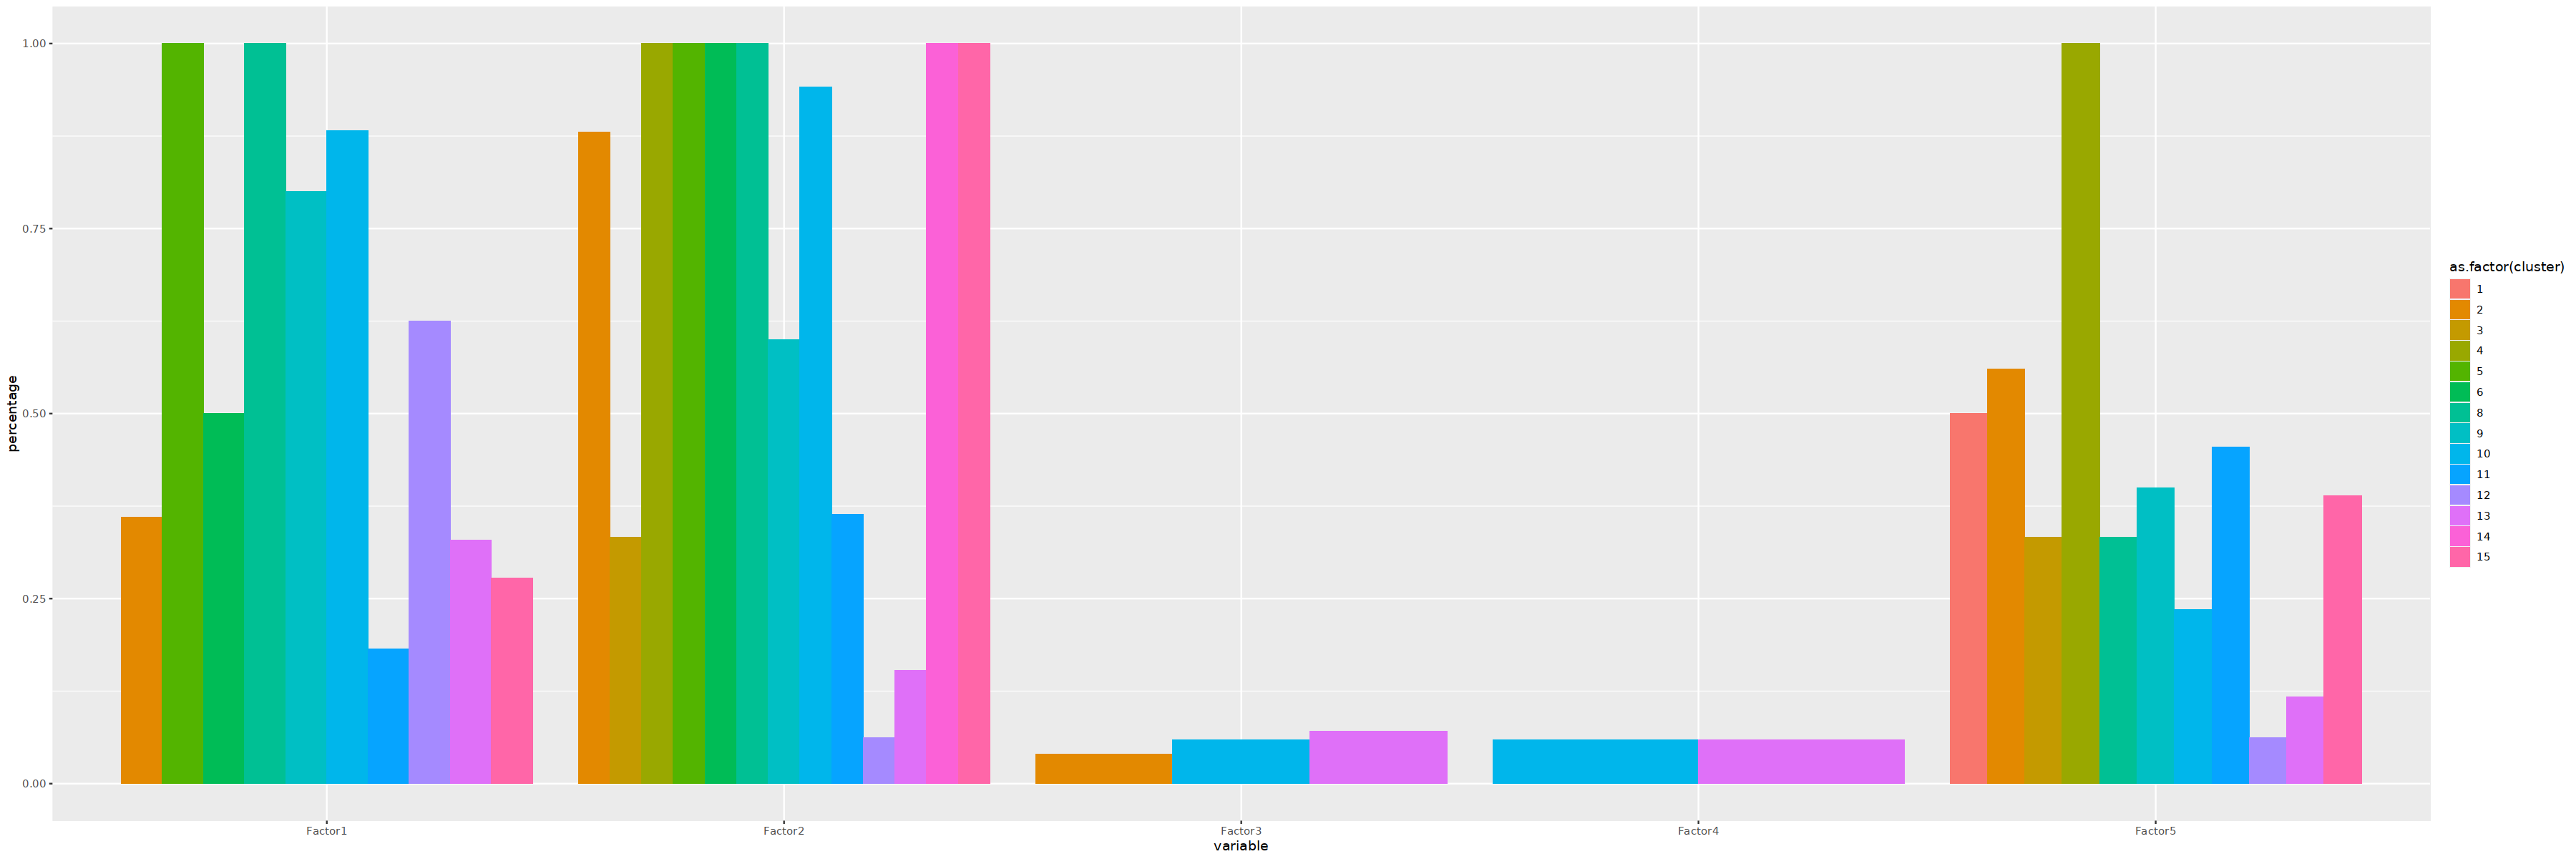

In [422]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(overview_cluster_significances[overview_cluster_significances$enrichment == 'all',], aes(x=variable, y=percentage, fill = as.factor(cluster))) +
  geom_bar(stat="identity",position=position_dodge() )

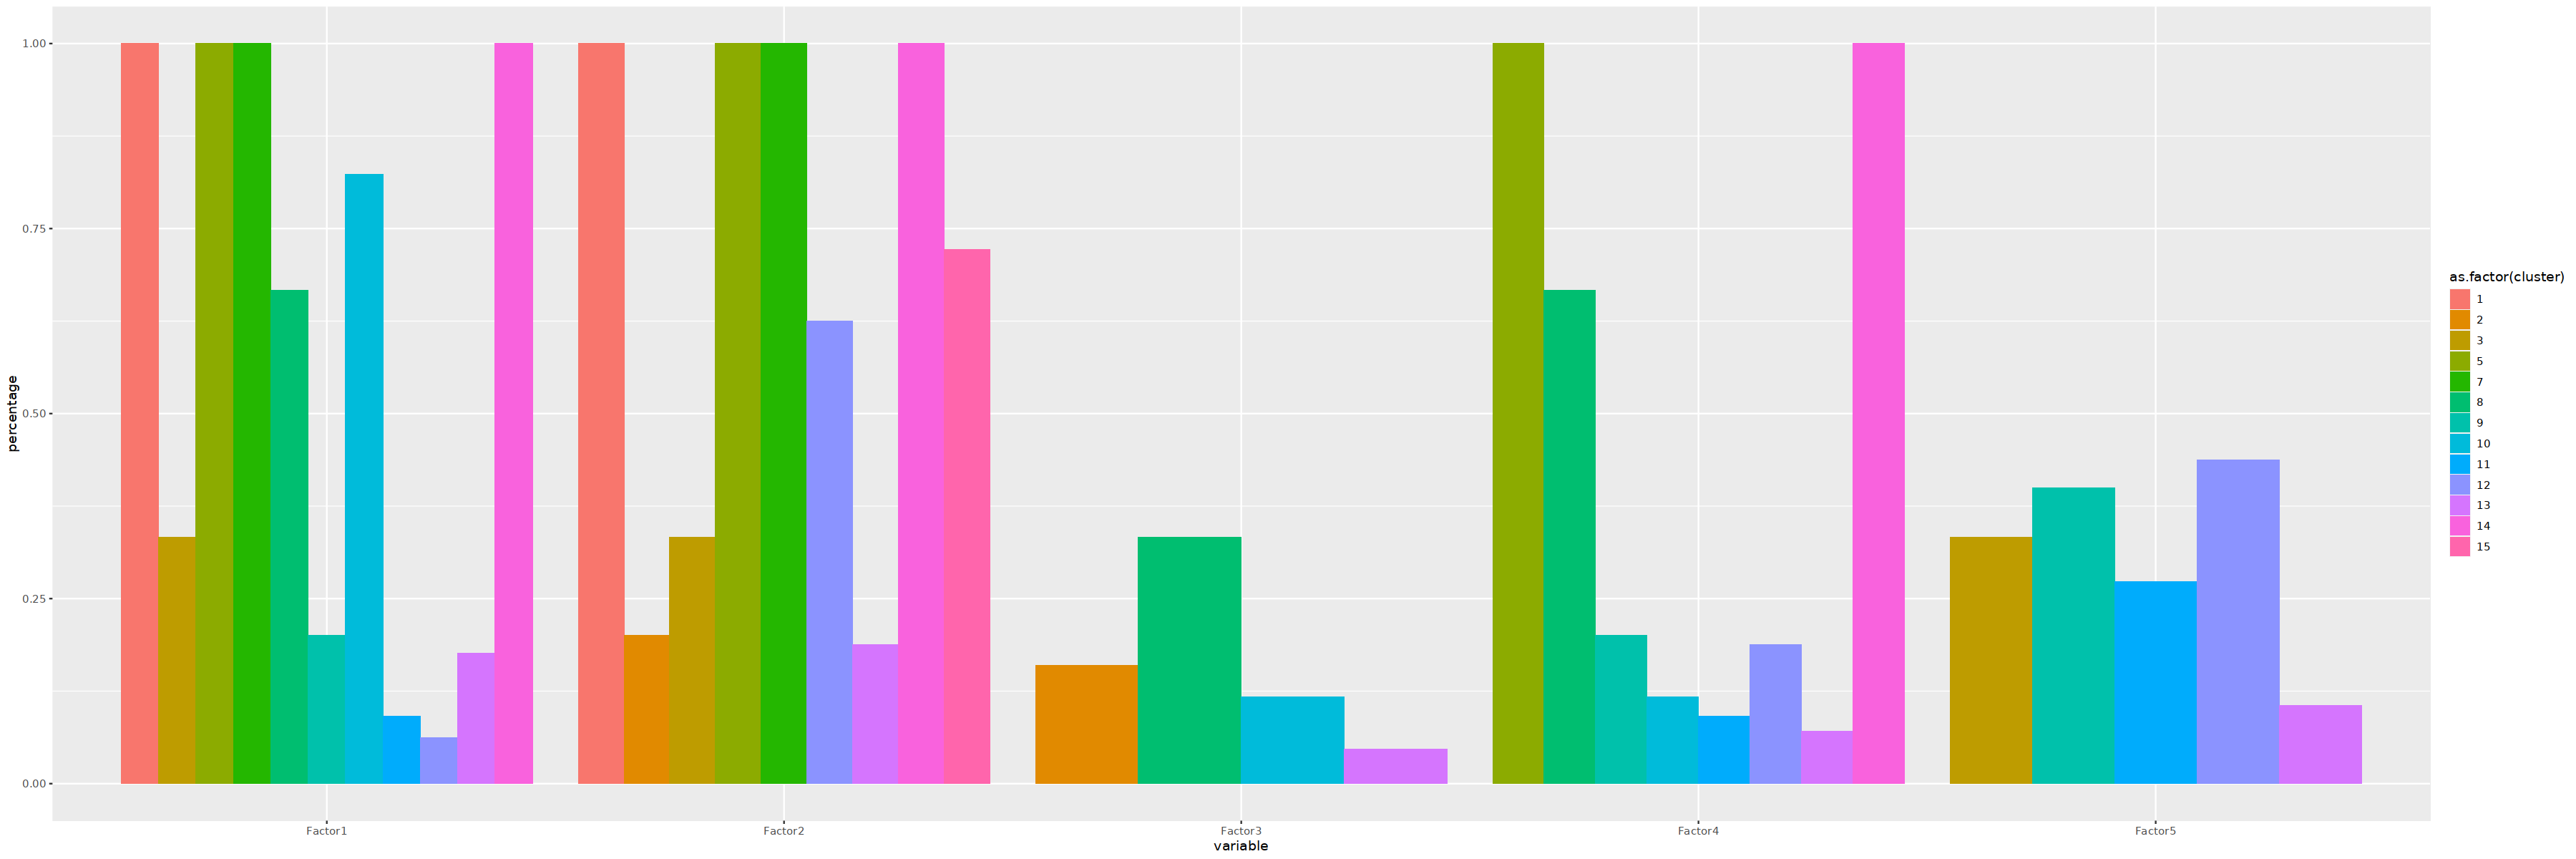

In [423]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(overview_cluster_significances[overview_cluster_significances$enrichment == 'positive',], aes(x=variable, y=percentage, fill = as.factor(cluster))) +
  geom_bar(stat="identity",position=position_dodge() )

In [424]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(overview_cluster_significances[overview_cluster_significances$enrichment == 'negative',], aes(x=variable, y=percentage, fill = as.factor(cluster))) +
  geom_bar(stat="identity",position=position_dodge() )

In [425]:
head(overview_cluster_significances,2)

cluster variable enrichment sign_amounts n percentage
1 1       Factor1  positive   2            2 1         
2 1       Factor2  positive   2            2 1

### Visualize all enriched pathways on a factor

In [426]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [427]:
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [428]:
head(plot_data,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
4 R-HSA-1168372 Factor2  0.0008609191 complete_complete negative  
  name                                                  amount_na total_amount
1  Interleukin-6 signaling                               4        11          
4  Downstream signaling events of B Cell Receptor (BCR) 43        83          
  coverage  cluster
1 0.6363636 12     
4 0.4819277 10

In [429]:
options(repr.plot.width=30, repr.plot.height=30)
ggplot(plot_data, 
       aes(enrichment, name, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    facet_grid(cluster ~ ., space = 'free' , scales = 'free') + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    scale_x_discrete(position = "top")  

### Inspect Top Pathways of Factor

In [430]:
### Selection Parameters for top pathways

In [431]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [432]:
select_enrichment = c('positive') 

In [433]:
min_coverage = 0.5

In [434]:
# filter on factor
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [435]:
nrow(plot_data)

[1] 196

In [436]:
# only positive
plot_data_subset = plot_data[plot_data$enrichment %in%  select_enrichment,]

In [437]:
nrow(plot_data_subset)

[1] 50

In [438]:
# more than 50% coverage
plot_data_subset = plot_data_subset[plot_data_subset$coverage > min_coverage,]

In [439]:
nrow(plot_data_subset)

[1] 14

In [440]:
# remove big pathways
plot_data_subset = plot_data_subset[plot_data_subset$total_amount < 100,]

In [441]:
#plot_data_subset

In [442]:
## only 14 pathways with ccoverage higher than 50%

In [443]:
# top 20 based on p value
#plot_data_subset = head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [444]:
#head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [445]:
plot_data_subset$dummy = 'pvalue'

In [446]:
# Specific Text Descriptions:
xlabel = xlab('') 
ylabel = ylab('Pathway')

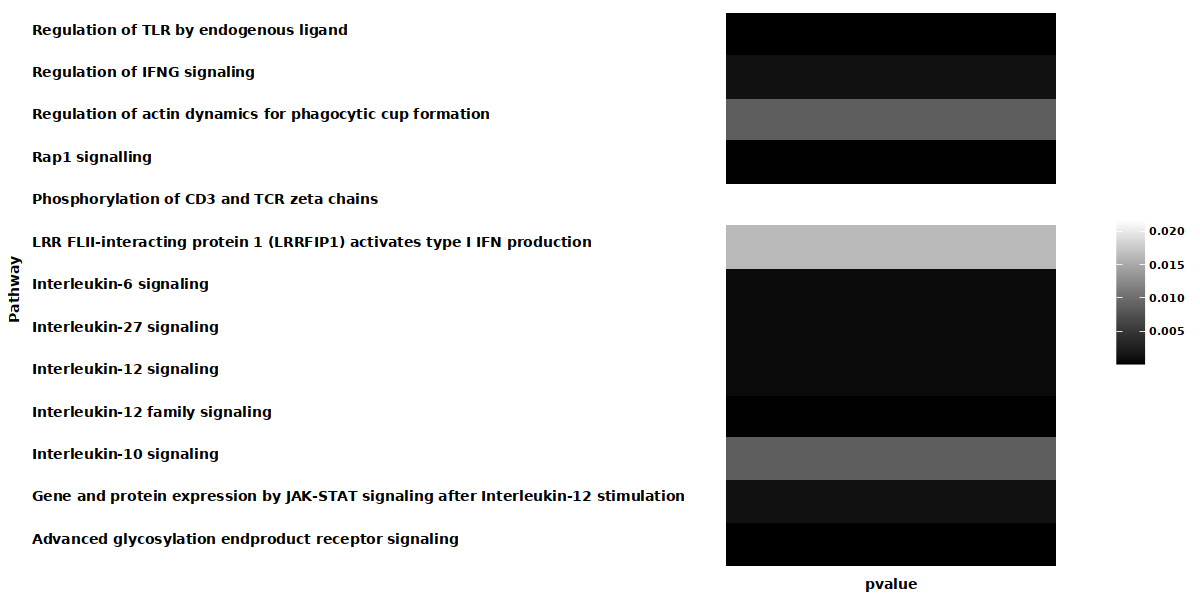

In [447]:
options(repr.plot.width=10, repr.plot.height=5)
pvalue_heatmap = ggplot(plot_data_subset, aes(x = dummy, y =name, fill = value)) +
  geom_tile() +   plot_config_heatmap + scale_fill_gradient(low = 'black', high = 'white')  +
  theme(axis.title.x = element_blank()) + ylabel
  #facet_grid(cluster ~., space = 'free', scales = 'free', switch = 'y')+

pvalue_heatmap

In [448]:
# Specific Text Descriptions:
xlabel = xlab('Pathways') 
ylabel = ylab('Coverage')

In [449]:
options(repr.plot.width=10, repr.plot.height=5)
coverage_line_plot = ggplot(plot_data_subset, aes(x = name, y = coverage)) +
  geom_col(width = 0.1) + coord_flip() +
  #facet_grid(cluster ~., space = 'free', scales = 'free', switch = 'y')+
  plot_config  + xlabel + ylabel
    

In [450]:
figure_name = "FIG6_E6_Top_Pathways"

In [451]:
# Sizes of the plot
width_par = 8.07
height_par = 2.8

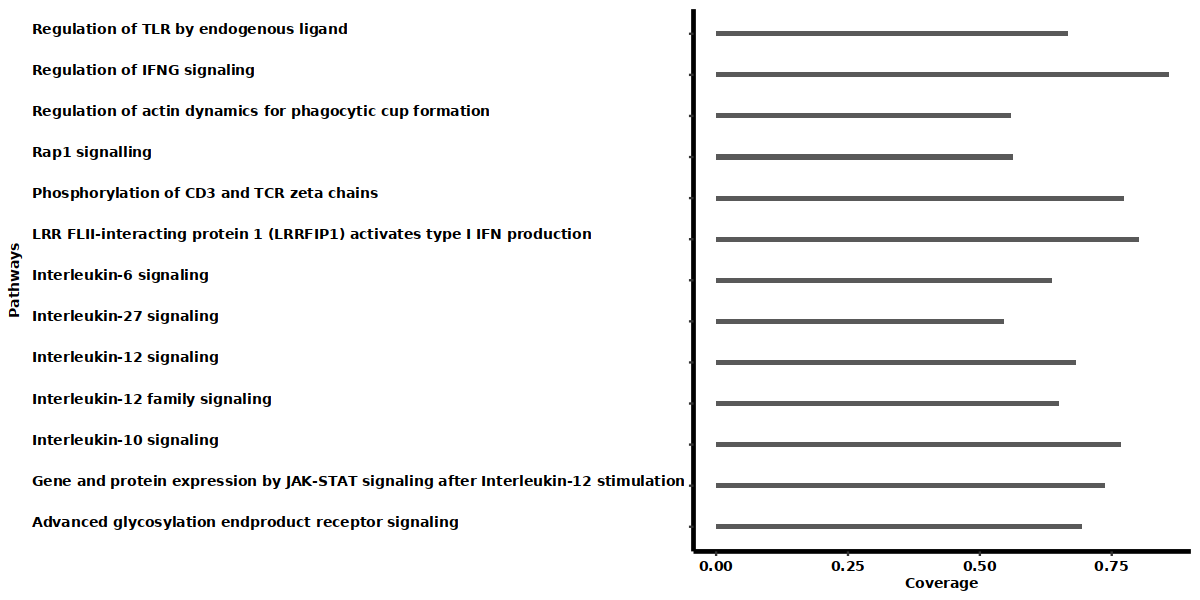

In [452]:
coverage_line_plot

In [453]:
legend = get_legend(pvalue_heatmap)

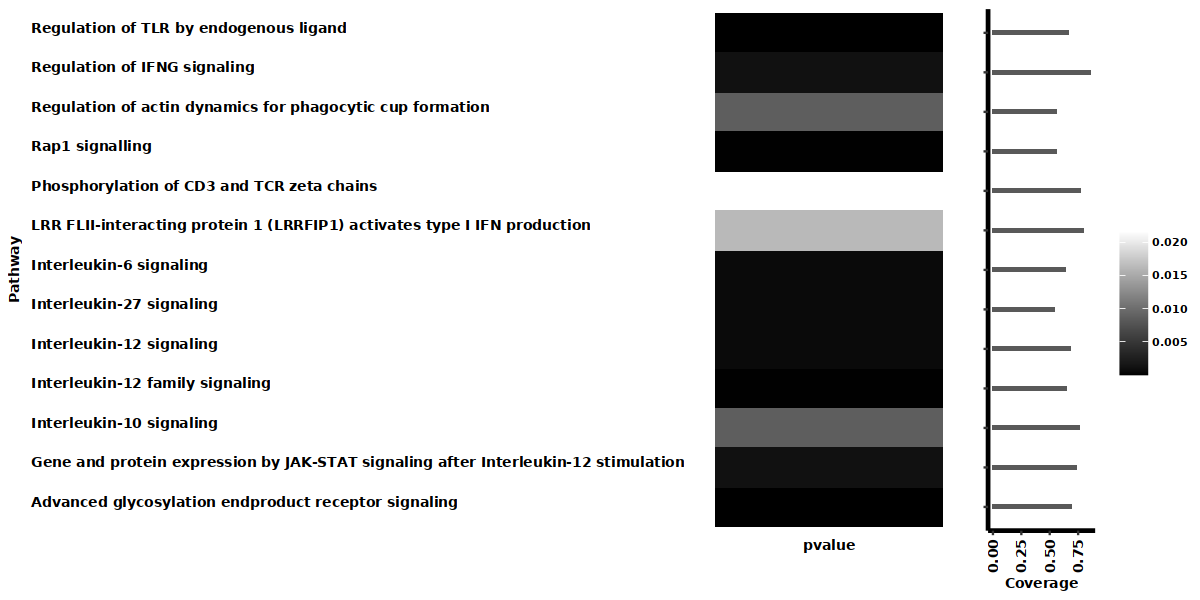

In [454]:
combined = ggarrange (pvalue_heatmap + theme(legend.position = 'none'), coverage_line_plot + theme(axis.text.y = element_blank(), axis.title.y = element_blank(), axis.text.x = element_text(angle = 90)), align = 'h', nrow = 1, widths = c(7.5,1))
combined = annotate_figure(combined, right = legend)
combined

In [455]:
#head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [456]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(combined)
dev.off()

png 
  2

In [457]:
#head(plot_data_subset[order(plot_data_subset$coverage, decreasing = TRUE),],10)

### Visualize top genes and pathways for a selected factor

In [458]:
### Select a set of pathways to visualize

In [459]:
## A1: select specific lsuter
#cluster_var = 12
#pathways_selection = pathways_clustered$pathway[pathways_clustered$cluster == 12]
#length(pathways_selection)

In [460]:
## A2 use same pathways as filtered above for subsetting

pathways_selection = unique(plot_data_subset$pathway)

In [461]:
unique(plot_data_subset[,c('pathway', 'name')])

pathway      
1   R-HSA-1059683
210 R-HSA-202427 
235 R-HSA-2029482
263 R-HSA-3134973
295 R-HSA-392517 
307 R-HSA-447115 
389 R-HSA-5686938
401 R-HSA-6783783
432 R-HSA-877312 
434 R-HSA-879415 
440 R-HSA-8950505
465 R-HSA-9020591
475 R-HSA-9020956
    name                                                                               
1    Interleukin-6 signaling                                                           
210  Phosphorylation of CD3 and TCR zeta chains                                        
235  Regulation of actin dynamics for phagocytic cup formation                         
263  LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production          
295  Rap1 signalling                                                                   
307  Interleukin-12 family signaling                                                   
389  Regulation of TLR by endogenous ligand                                            
401  Interleukin-10 signaling                                                          
432  Regulation of IFNG signaling                                                      
434  Advanced glycosylation endproduct receptor signaling                              
440  Gene and protein expression by JAK-STAT signaling after Interleukin-12 stimulation
465  Interleukin-12 signaling                                                          
475  Interleukin-27 signaling

In [462]:
length(pathways_selection)

[1] 13

In [463]:
pathways_selection

[1] "R-HSA-1059683" "R-HSA-202427"  "R-HSA-2029482" "R-HSA-3134973"
 [5] "R-HSA-392517"  "R-HSA-447115"  "R-HSA-5686938" "R-HSA-6783783"
 [9] "R-HSA-877312"  "R-HSA-879415"  "R-HSA-8950505" "R-HSA-9020591"
[13] "R-HSA-9020956"

In [464]:
### A3 Manual Selection
pathways_selection = c('R-HSA-1059683', 'R-HSA-9020956', 'R-HSA-9020591' ,'R-HSA-6783783')

In [465]:
### Prepare a geneset oi with all top% genes of a factor

In [466]:
select_thres = 0.125 # choose threshold of top x % of features of MOFA factor to take into account

In [467]:
### Get involved genes

In [468]:
## Define gene-set to merge
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(select_thres)
geneset_oi_pos_per_factor$direction = 'positive'
geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-select_thres)

geneset_oi_neg_per_factor$direction = 'negative'


Selecting by value
Selecting by value


In [469]:
geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)
#geneset_oi = geneset_oi_pos_per_factor

In [470]:
geneset_oi = geneset_oi[geneset_oi$variable == select_factor,]

In [471]:
nrow(geneset_oi)

[1] 3318

In [472]:
nrow(geneset_oi)

[1] 3318

In [473]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  value     direction
1 0.5547538 positive 
2 0.5461578 positive

In [474]:
colnames(geneset_oi) = c('type', 'variable_name','view',  'gene', 'variable', 'factor_value', 'factor_value_direction')

In [475]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  factor_value factor_value_direction
1 0.5547538    positive              
2 0.5461578    positive

In [476]:
### Merge genes belongig to pathway to enriched pathway sets

In [477]:
### filter on factro
pathways_vis = enrichment_result_p_val_adjusted[(enrichment_result_p_val_adjusted$variable == select_factor) & (enrichment_result_p_val_adjusted$enrichment %in% select_enrichment),]

In [478]:
### Add genes to pathways

In [479]:
pathways_vis_genes = merge(pathways_vis, term2gene[,c('SYMBOL', 'pathway')], by.x = 'pathway', by.y = 'pathway')

In [480]:
head(pathways_vis_genes,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
  name                     amount_na total_amount coverage  cluster SYMBOL
1  Interleukin-6 signaling 4         11           0.6363636 12      IL6   
2  Interleukin-6 signaling 4         11           0.6363636 12      STAT1

In [481]:
colnames(pathways_vis_genes) = c('pathway', 'variable', 'pvalue', 'view_text', 'enrichment', 'name', 'amount_na', 'total_amount', 'coverage', 'cluster', 'SYMBOL')

In [482]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  factor_value factor_value_direction
1 0.5547538    positive              
2 0.5461578    positive

In [483]:
### Add factor values of pathway genes (! with current implementation only filters on top genes as defined in geneset_oi)

In [484]:
pathways_vis_genes = merge(pathways_vis_genes, geneset_oi, by.x = c('SYMBOL', 'variable'), by.y = c('gene','variable' ))

In [485]:
head(pathways_vis_genes,2)

SYMBOL variable pathway       pvalue      view_text         enrichment
1 ABI1   Factor2  R-HSA-2029482 0.008585061 complete_complete positive  
2 ABI1   Factor2  R-HSA-2029480 0.039108357 complete_complete positive  
  name                                                       amount_na
1  Regulation of actin dynamics for phagocytic cup formation 27       
2  Fcgamma receptor (FCGR) dependent phagocytosis            44       
  total_amount coverage  cluster type             variable_name            
1 61           0.5573770 1       X4_MonocytesCD14 X4_Monocytes...CD14__ABI1
2 86           0.4883721 1       X4_MonocytesCD14 X4_Monocytes...CD14__ABI1
  view                             factor_value factor_value_direction
1 CD14(high) Monocytes (Cluster 4) 0.2929786    positive              
2 CD14(high) Monocytes (Cluster 4) 0.2929786    positive

In [486]:
nrow(unique(pathways_vis_genes[,c('pathway', 'pvalue', 'enrichment')]))

[1] 50

In [487]:
nrow(unique(pathways_vis_genes[,c('pathway','enrichment')]))

[1] 50

In [488]:
nrow(pathways_vis_genes)

[1] 4330

In [489]:
length(unique(pathways_vis_genes$pathway))

[1] 50

In [490]:
### Summarise to get max/ mean factor value of each gene per pathway (remove cell-cluster/view/type dimension)  --> tBD max or mean (for max --> absolute value?)

In [491]:
pathways_vis_genes_summarized = pathways_vis_genes %>% group_by(SYMBOL,variable,  pathway, name, cluster) %>% summarise(factor_value = mean(factor_value), enrichment_type = paste0(unique(enrichment), collapse = '&'), pvalue = min(pvalue))
## still multiple entries for different types of enrichment: positive, negative, all

`summarise()` has grouped output by 'SYMBOL', 'variable', 'pathway', 'name'.
You can override using the `.groups` argument.


In [492]:
nrow(pathways_vis_genes_summarized)

[1] 1199

In [493]:
head(pathways_vis_genes_summarized,2)

SYMBOL variable pathway      name                  cluster factor_value
1 ABI1   Factor2  R-HSA-168249  Innate Immune System 14      0.2929786   
2 ABI1   Factor2  R-HSA-168256  Immune System         5      0.2929786   
  enrichment_type pvalue      
1 positive        0.0005948579
2 positive        0.0119353702

In [494]:
### Filter on selected pathways for visualization

In [495]:
pathways_vis_genes = pathways_vis_genes[pathways_vis_genes$pathway %in% pathways_selection,]
pathways_vis_genes_summarized = pathways_vis_genes_summarized[pathways_vis_genes_summarized$pathway %in% pathways_selection,]

In [496]:
unique(pathways_vis_genes[,c('enrichment', 'name')])

enrichment name                     
362  positive    Interleukin-12 signaling
397  positive    Interleukin-10 signaling
1422 positive    Interleukin-6 signaling 
1435 positive    Interleukin-27 signaling

In [497]:
### Different visualization strategies

In [498]:
### Visualization - Part 1 (Genes + Maximum)

In [499]:
head(pathways_vis_genes_summarized,2)

SYMBOL variable pathway       name                      cluster factor_value
1 CAPZA1 Factor2  R-HSA-9020591  Interleukin-12 signaling 12      0.3369866   
2 CCL4   Factor2  R-HSA-6783783  Interleukin-10 signaling 12      0.1957243   
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0085850608

In [500]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('Pathway')

In [501]:
options(repr.plot.width=15, repr.plot.height=5)
g1 = ggplot(pathways_vis_genes_summarized, aes(SYMBOL,  name, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90), axis.title.x = element_blank()) +
    xlabel +
    ylabel +
    ggtitle(paste0('Factor values of pathway genes (top ', select_thres  * 2 *100, '% of features)'))
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g1

In [502]:
### Visualized the exact factor values of the genes

In [503]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('View')

In [504]:
head(pathways_vis_genes,2)

SYMBOL variable pathway       pvalue       view_text         enrichment
362 CAPZA1 Factor2  R-HSA-9020591 0.0005768726 complete_complete positive  
363 CAPZA1 Factor2  R-HSA-9020591 0.0005768726 complete_complete positive  
    name                      amount_na total_amount coverage  cluster
362  Interleukin-12 signaling 15        47           0.6808511 12     
363  Interleukin-12 signaling 15        47           0.6808511 12     
    type             variable_name              
362 X4_MonocytesCD14 X4_Monocytes...CD14__CAPZA1
363 X6_MonocytesCD14 X6_Monocytes...CD14__CAPZA1
    view                             factor_value factor_value_direction
362 CD14(high) Monocytes (Cluster 4) 0.4327551    positive              
363 CD14(high) Monocytes (Cluster 6) 0.3554420    positive

In [505]:
plot_data_cluster = unique(pathways_vis_genes[,c('SYMBOL', 'variable', 'type','view',  'variable_name', 'factor_value', 'factor_value_direction')])

In [506]:
options(repr.plot.width=15, repr.plot.height=5)
g2 = ggplot(plot_data_cluster, aes(SYMBOL,  view, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90)) +
    xlabel +
    ylabel
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g2

In [507]:
### Combine Plots

In [508]:
figure_name = "FIG7_E6_Top_Pathways_Genes"

In [509]:
# Sizes of the plot
width_par = 8.07
height_par = 3.5

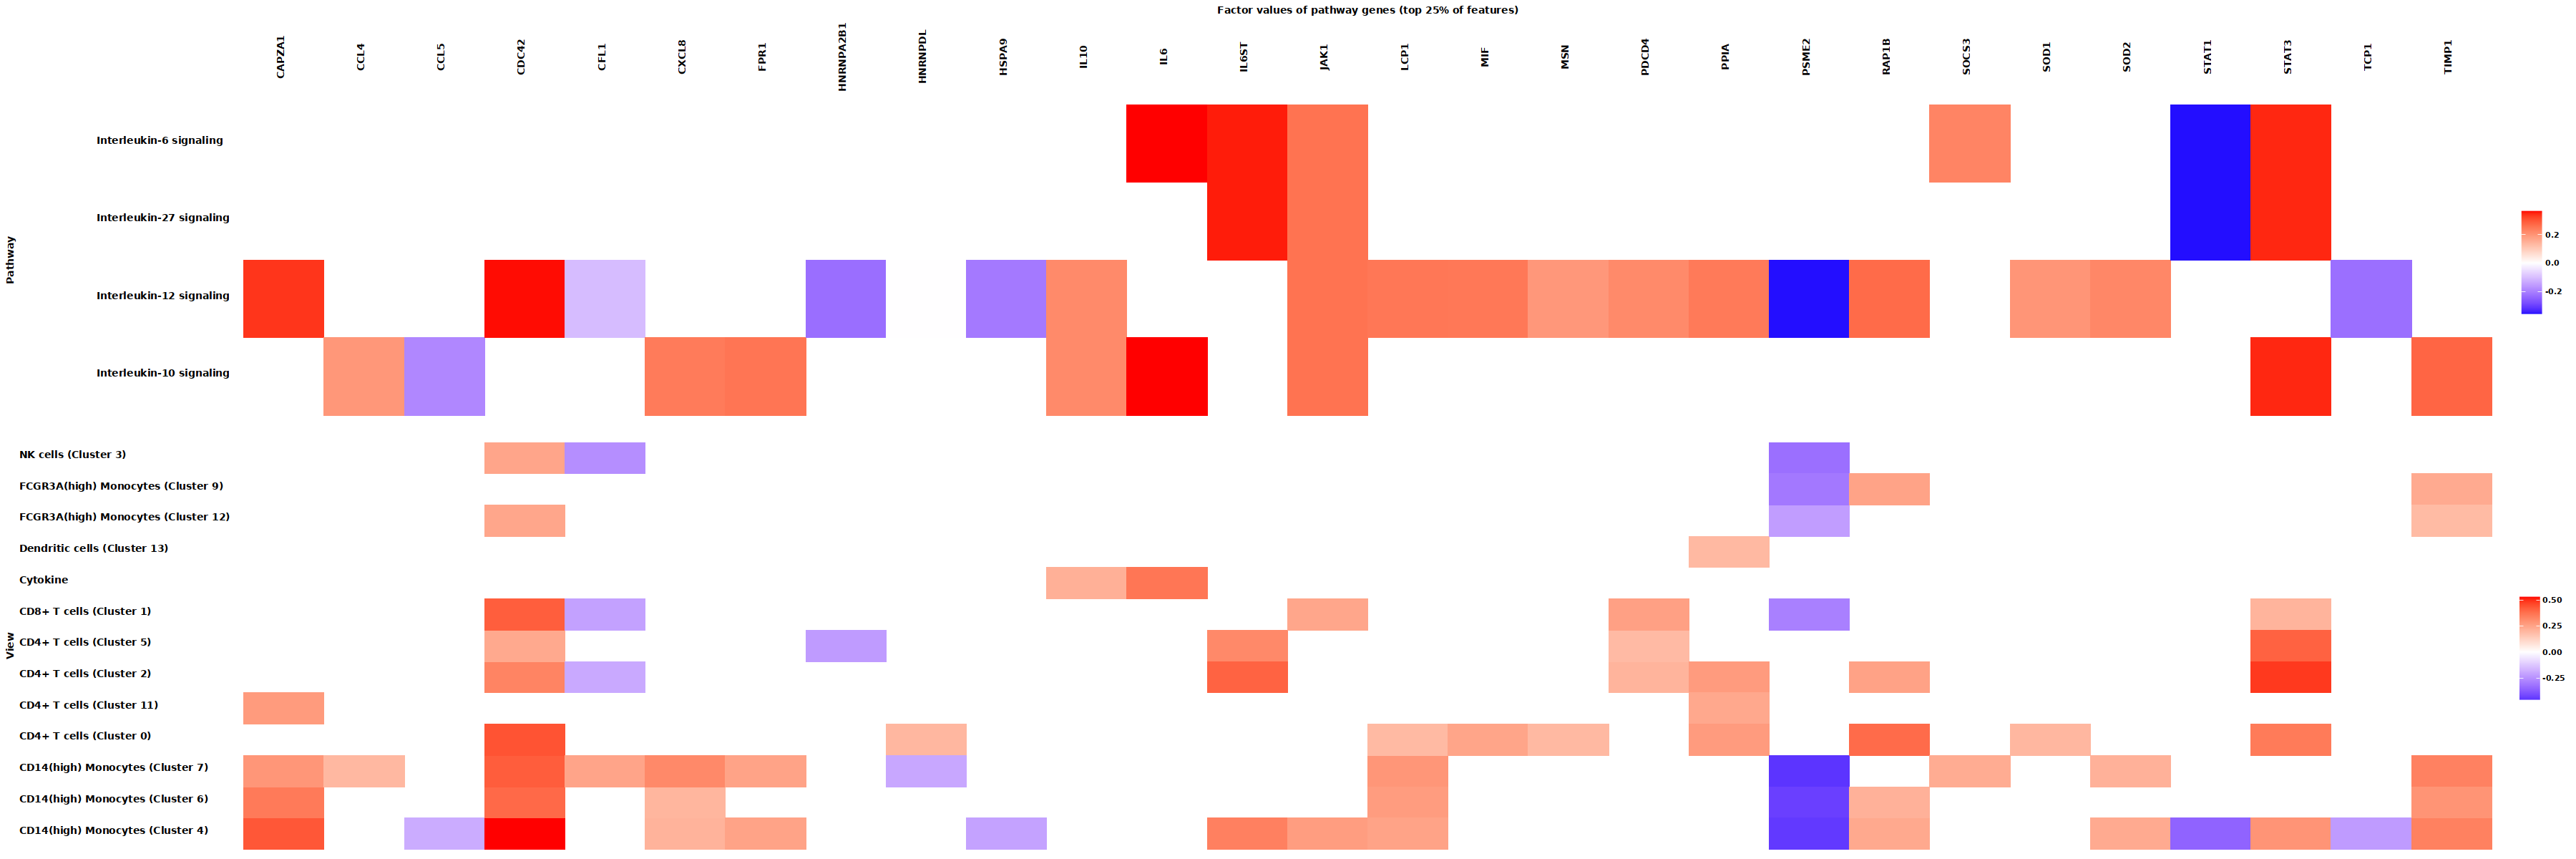

In [510]:
options(repr.plot.width=30, repr.plot.height=10)
combined_enriched_pathways = ggarrange(g1,
          g2 + theme(axis.text.x = element_blank(), axis.title.x =element_blank()), align = 'v', ncol = 1)
combined_enriched_pathways

In [511]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(combined_enriched_pathways)
dev.off()

png 
  2

### Visualize selected pathways in REACTOME format

In [512]:
head(pathways_vis_genes_summarized,2)

SYMBOL variable pathway       name                      cluster factor_value
1 CAPZA1 Factor2  R-HSA-9020591  Interleukin-12 signaling 12      0.3369866   
2 CCL4   Factor2  R-HSA-6783783  Interleukin-10 signaling 12      0.1957243   
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0085850608

In [513]:
### Visualize some pathways

In [514]:
sort(unique(pathways_vis_genes_summarized$name))

[1] " Interleukin-10 signaling" " Interleukin-12 signaling"
[3] " Interleukin-27 signaling" " Interleukin-6 signaling"

In [515]:
pathway =' Interleukin-6 signaling'

In [516]:
str_replace(pathway, ' ', '')

[1] "Interleukin-6 signaling"

In [517]:
### Select data for vis

In [518]:
pathway_plot = pathways_vis_genes_summarized[pathways_vis_genes_summarized$name == pathway,]

In [519]:
head(pathway_plot,2)

SYMBOL variable pathway       name                     cluster factor_value
1 IL6    Factor2  R-HSA-1059683  Interleukin-6 signaling 12      0.3653240   
2 IL6ST  Factor2  R-HSA-1059683  Interleukin-6 signaling 12      0.3556589   
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0005768726

In [520]:
pathway_plot

SYMBOL variable pathway       name                     cluster factor_value
1 IL6    Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3653240  
2 IL6ST  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3556589  
3 JAK1   Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.2566594  
4 SOCS3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.2278164  
5 STAT1  Factor2  R-HSA-1059683  Interleukin-6 signaling 12      -0.3575161  
6 STAT3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3489774  
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0005768726
3 positive        0.0005768726
4 positive        0.0005768726
5 positive        0.0005768726
6 positive        0.0005768726

In [521]:
nrow(pathway_plot)

[1] 6

In [522]:
pathway_plot

SYMBOL variable pathway       name                     cluster factor_value
1 IL6    Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3653240  
2 IL6ST  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3556589  
3 JAK1   Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.2566594  
4 SOCS3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.2278164  
5 STAT1  Factor2  R-HSA-1059683  Interleukin-6 signaling 12      -0.3575161  
6 STAT3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.3489774  
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0005768726
3 positive        0.0005768726
4 positive        0.0005768726
5 positive        0.0005768726
6 positive        0.0005768726

In [523]:
write.csv(pathway_plot[, c('SYMBOL', 'factor_value')], paste0(result_path, '/Supplementary/SUPP_E6_Input_Factor_Weights_Reactome_Figure.csv'))

In [524]:
head(gene_mapping,2)

SYMBOL ENTREZID n
1 A1BG   1        1
2 A2M    2        1

In [525]:
pathway_plot = merge(pathway_plot, gene_mapping)

In [526]:
nrow(pathway_plot)

[1] 6

In [527]:
head(pathway_plot,2)

SYMBOL variable pathway       name                     cluster factor_value
1 IL6    Factor2  R-HSA-1059683  Interleukin-6 signaling 12      0.3653240   
2 IL6ST  Factor2  R-HSA-1059683  Interleukin-6 signaling 12      0.3556589   
  enrichment_type pvalue       ENTREZID n
1 positive        0.0005768726 3569     1
2 positive        0.0005768726 3572     1

In [528]:
#write.csv(pathway_plot, paste0(result_path, '/Supplementary/SUPP_E6_Input_Factor_Weights_Reactome_Figure.csv'))

In [529]:
pathway_plot_input = pathway_plot$factor_value

In [530]:
names(pathway_plot_input ) = pathway_plot$ENTREZID

In [531]:
pathway_plot_input 

3569       3572       3716       9021       6772       6774 
 0.3653240  0.3556589  0.2566594  0.2278164 -0.3575161  0.3489774

In [532]:
#### Visualize pathway

In [533]:
network_plot = viewPathway(str_replace(pathway, ' ', ''), 
            readable = TRUE, foldChange = pathway_plot_input )

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [534]:
### Improve visualization

In [535]:
network_plot = network_plot + 
    ggtitle(paste0('Enriched Pathway on ' ,select_factor, ' : ', pathway, ' (' , name, '_', weight_views, '_',  select_thres, ' ) ')) + 
    plot_config + 
    scale_colour_gradient2(low = 'blue', high ='red', midpoint = 0)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


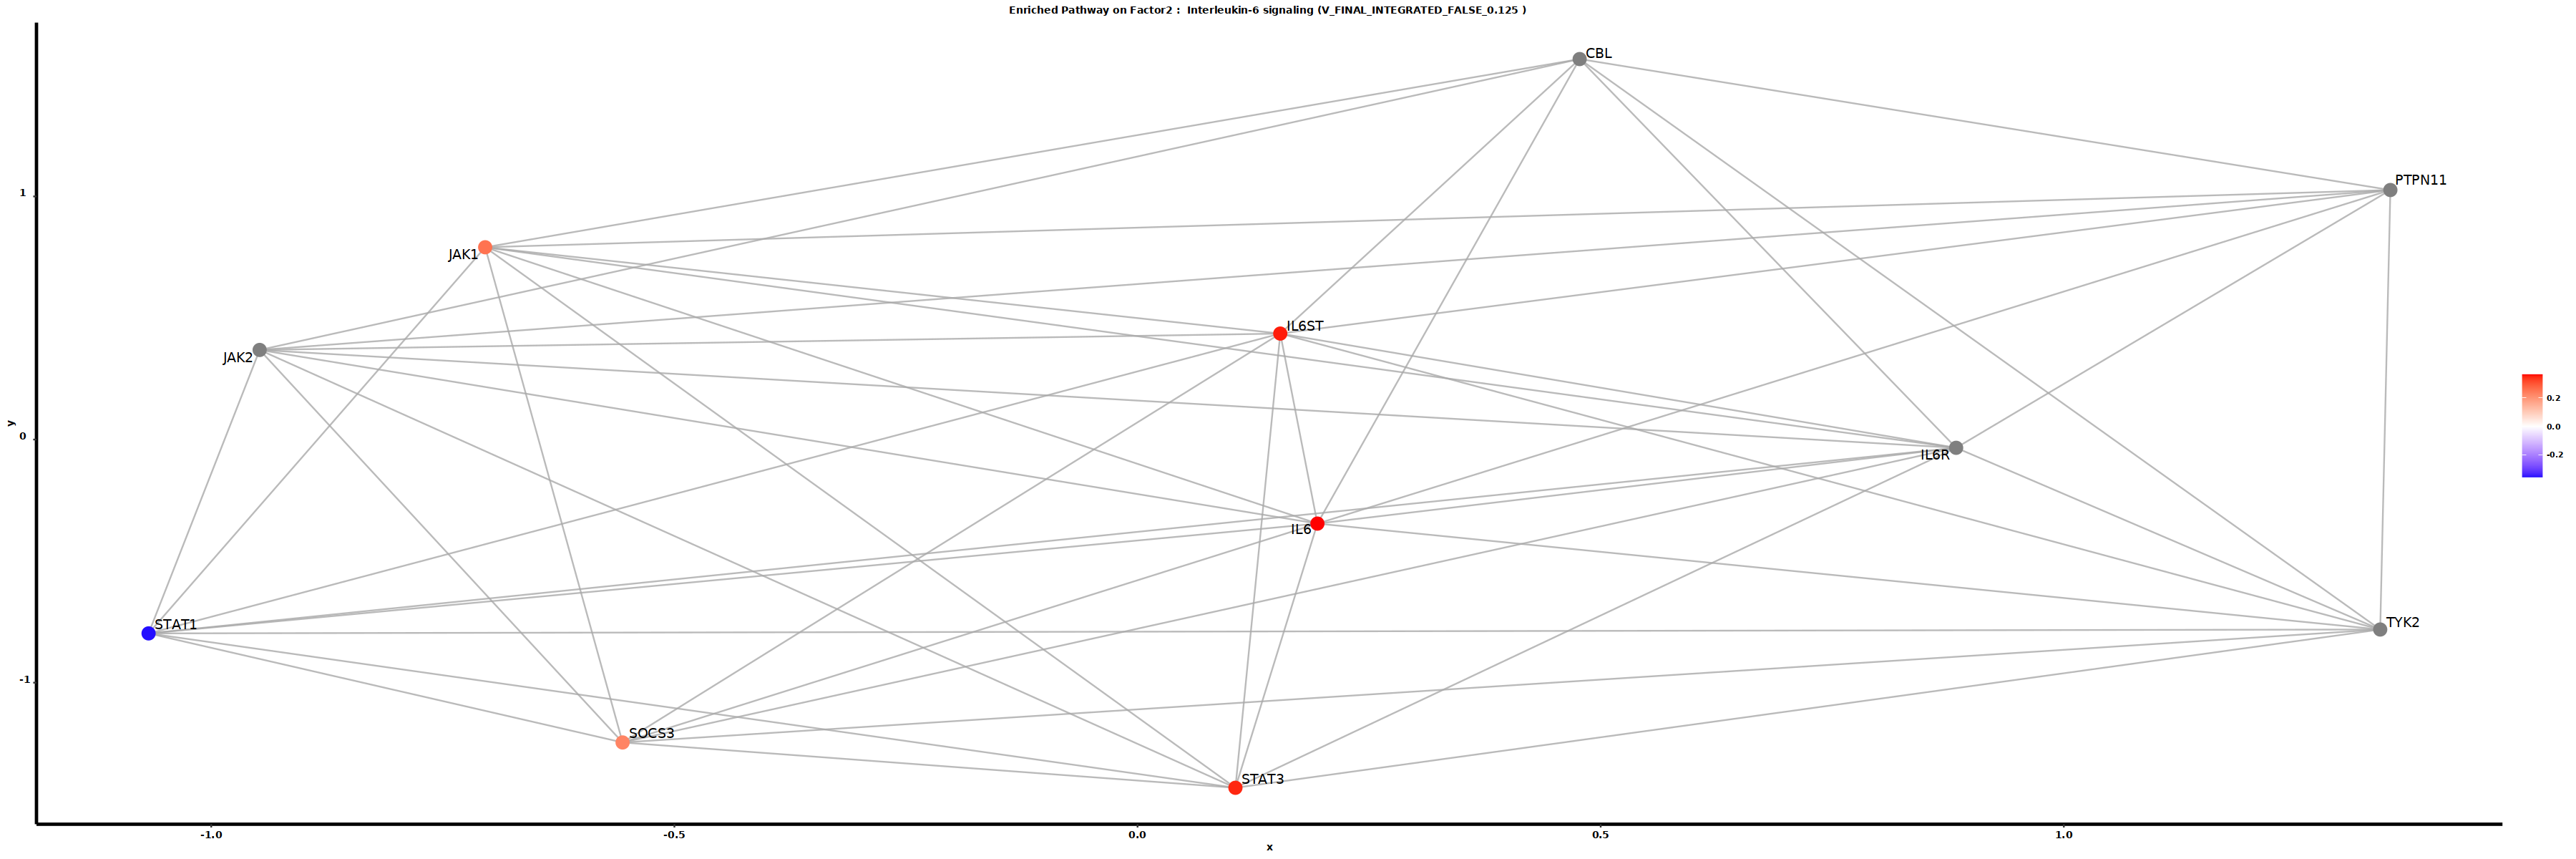

In [536]:
network_plot

In [537]:
### Save

In [538]:
# Sizes of the plot
width_par = 8.07
height_par = 4

In [539]:
pdf(paste0('figures/E6_Pathways/E6_REACTOME_' , str_replace_all(pathway, ' ', ''), '_' , name, '_', weight_views, '_', select_factor, '_', select_thres, '.pdf'), width =width_par, height = height_par)
print(network_plot)
dev.off()

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


png 
  2

In [540]:
#### Get average factor values of a pathway for all genes

In [541]:
pathway =' Interleukin-6 signaling'

In [542]:
### filter on factro
pathways_vis = enrichment_result_p_val_adjusted[(enrichment_result_p_val_adjusted$variable == select_factor) & (enrichment_result_p_val_adjusted$enrichment %in% select_enrichment),]

In [543]:
pathways_vis = pathways_vis[pathways_vis$name == pathway,]

In [544]:
### Add genes to pathways

In [545]:
pathways_vis_genes = merge(pathways_vis, term2gene[,c('SYMBOL', 'pathway')], by.x = 'pathway', by.y = 'pathway')

In [546]:
head(pathways_vis_genes,2)

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
  name                     amount_na total_amount coverage  cluster SYMBOL
1  Interleukin-6 signaling 4         11           0.6363636 12      STAT1 
2  Interleukin-6 signaling 4         11           0.6363636 12      STAT3

In [547]:
pathways_vis_genes

pathway       variable value        view              enrichment
1 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
2 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
3 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
4 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
5 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
6 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
7 R-HSA-1059683 Factor2  0.0005768726 complete_complete positive  
  name                     amount_na total_amount coverage  cluster SYMBOL
1  Interleukin-6 signaling 4         11           0.6363636 12      STAT1 
2  Interleukin-6 signaling 4         11           0.6363636 12      STAT3 
3  Interleukin-6 signaling 4         11           0.6363636 12      IL6   
4  Interleukin-6 signaling 4         11           0.6363636 12      IL6ST 
5  Interleukin-6 signaling 4         11           0.6363636 12      JAK1  
6  Interleukin-6 signaling 4         11           0.6363636 12      IL6R  
7  Interleukin-6 signaling 4         11           0.6363636 12      SOCS3

In [548]:
colnames(pathways_vis_genes) = c('pathway', 'variable', 'pvalue', 'view_text', 'enrichment', 'name', 'amount_na', 'total_amount', 'coverage', 'cluster', 'SYMBOL')

In [549]:
### Add factor values of pathway genes (! with current implementation only filters on top genes as defined in geneset_oi)

In [550]:
pathways_vis_genes = merge(pathways_vis_genes, feature_weights_long, by.x = c('SYMBOL', 'variable'), by.y = c('gene','variable' ))

In [551]:
#pathways_vis_genes

In [552]:
nrow(unique(pathways_vis_genes[,c('pathway', 'pvalue', 'enrichment')]))

[1] 1

In [553]:
nrow(unique(pathways_vis_genes[,c('pathway','enrichment')]))

[1] 1

In [554]:
nrow(pathways_vis_genes)

[1] 37

In [555]:
length(unique(pathways_vis_genes$pathway))

[1] 1

In [556]:
head(pathways_vis_genes)

SYMBOL variable pathway       pvalue       view_text         enrichment
1 IL6    Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
2 IL6R   Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
3 IL6R   Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
4 IL6ST  Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
5 IL6ST  Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
6 IL6ST  Factor2  R-HSA-1059683 0.0005768726 complete_complete positive  
  name                     amount_na total_amount coverage  cluster
1  Interleukin-6 signaling 4         11           0.6363636 12     
2  Interleukin-6 signaling 4         11           0.6363636 12     
3  Interleukin-6 signaling 4         11           0.6363636 12     
4  Interleukin-6 signaling 4         11           0.6363636 12     
5  Interleukin-6 signaling 4         11           0.6363636 12     
6  Interleukin-6 signaling 4         11           0.6363636 12     
  type             variable_name              view                            
1 cytokine         IL6__IL6                   Cytokine                        
2 X6_MonocytesCD14 X6_Monocytes...CD14__IL6R  CD14(high) Monocytes (Cluster 6)
3 X4_MonocytesCD14 X4_Monocytes...CD14__IL6R  CD14(high) Monocytes (Cluster 4)
4 X4_MonocytesCD14 X4_Monocytes...CD14__IL6ST CD14(high) Monocytes (Cluster 4)
5 X2_TcellCD4      X2_T.cell.CD4__IL6ST       CD4+ T cells (Cluster 2)        
6 X5_TcellCD4      X5_T.cell.CD4__IL6ST       CD4+ T cells (Cluster 5)        
  value      
1  0.36532403
2  0.04158109
3 -0.06157545
4  0.34031381
5  0.40722396
6  0.31943905

In [557]:
#pathways_vis_genes = pathways_vis_genes[pathways_vis_genes$value > 0,]

In [558]:
### Summarise to get max/ mean factor value of each gene per pathway (remove cell-cluster/view/type dimension)  --> tBD max or mean (for max --> absolute value?)

In [559]:
pathways_vis_genes_summarized = pathways_vis_genes %>% group_by(SYMBOL,variable,  pathway, name, cluster) %>% summarise(factor_value = mean(value), enrichment_type = paste0(unique(enrichment), collapse = '&'), pvalue = min(pvalue))
## still multiple entries for different types of enrichment: positive, negative, all

`summarise()` has grouped output by 'SYMBOL', 'variable', 'pathway', 'name'.
You can override using the `.groups` argument.


In [560]:
pathways_vis_genes_summarized

SYMBOL variable pathway       name                     cluster factor_value
1 IL6    Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.365324035
2 IL6R   Factor2  R-HSA-1059683  Interleukin-6 signaling 12      -0.009997181
3 IL6ST  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.355658938
4 JAK1   Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.090467971
5 SOCS3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.079516346
6 STAT1  Factor2  R-HSA-1059683  Interleukin-6 signaling 12      -0.264359226
7 STAT3  Factor2  R-HSA-1059683  Interleukin-6 signaling 12       0.182033561
  enrichment_type pvalue      
1 positive        0.0005768726
2 positive        0.0005768726
3 positive        0.0005768726
4 positive        0.0005768726
5 positive        0.0005768726
6 positive        0.0005768726
7 positive        0.0005768726

In [561]:
#write.csv(pathways_vis_genes_summarized, paste0(result_path, '/Supplementary/SUPP_E6_Input_Factor_Weights_Reactome_Figure.csv'))

In [562]:
#### Make different tests to analyze significance of IL6- Signaling pathway components compared to background

In [563]:
test = feature_weights_long[feature_weights_long$variable == 'Factor2',]

In [564]:
head(test,2)

type     variable_name view     gene   variable value     
13279 cytokine BCA1__CXCL13  Cytokine CXCL13 Factor2   0.0244314
13280 cytokine CTACK__CCL27  Cytokine CCL27  Factor2  -0.1759984

In [565]:
nrow(test)

[1] 13278

In [566]:
test = test[test$value > 0,]

In [567]:
nrow(test)

[1] 6554

In [568]:
test = test[order(test$value, decreasing = TRUE),]

In [569]:
test$rank = 1:nrow(test)

In [570]:
unique(pathways_vis_genes$SYMBOL)

[1] "IL6"   "IL6R"  "IL6ST" "JAK1"  "SOCS3" "STAT1" "STAT3"

In [571]:
test$pathway_element = 0
test$pathway_element[test$gene %in% unique(pathways_vis_genes$SYMBOL)] = 1

In [572]:
mean(test[test$pathway_element == 1,]$rank)

[1] 2843.903

In [573]:
mean(test[test$pathway_element == 1,]$value)

[1] 0.1656837

In [574]:
var(test[test$pathway_element == 1,]$value)

[1] 0.02059903

In [575]:
mean(test[test$pathway_element == 0,]$rank)

[1] 3279.561

In [576]:
mean(test[test$pathway_element == 0,]$value)

[1] 0.1255814

In [577]:
var(test[test$pathway_element == 0,]$value)

[1] 0.01147553

In [578]:
t.test(test$value~test$pathway_element, var.equal = FALSE, alternative = "less")


	Welch Two Sample t-test

data:  test$value by test$pathway_element
t = -1.5536, df = 30.159, p-value = 0.06535
alternative hypothesis: true difference in means between group 0 and group 1 is less than 0
95 percent confidence interval:
        -Inf 0.003699485
sample estimates:
mean in group 0 mean in group 1 
      0.1255814       0.1656837 


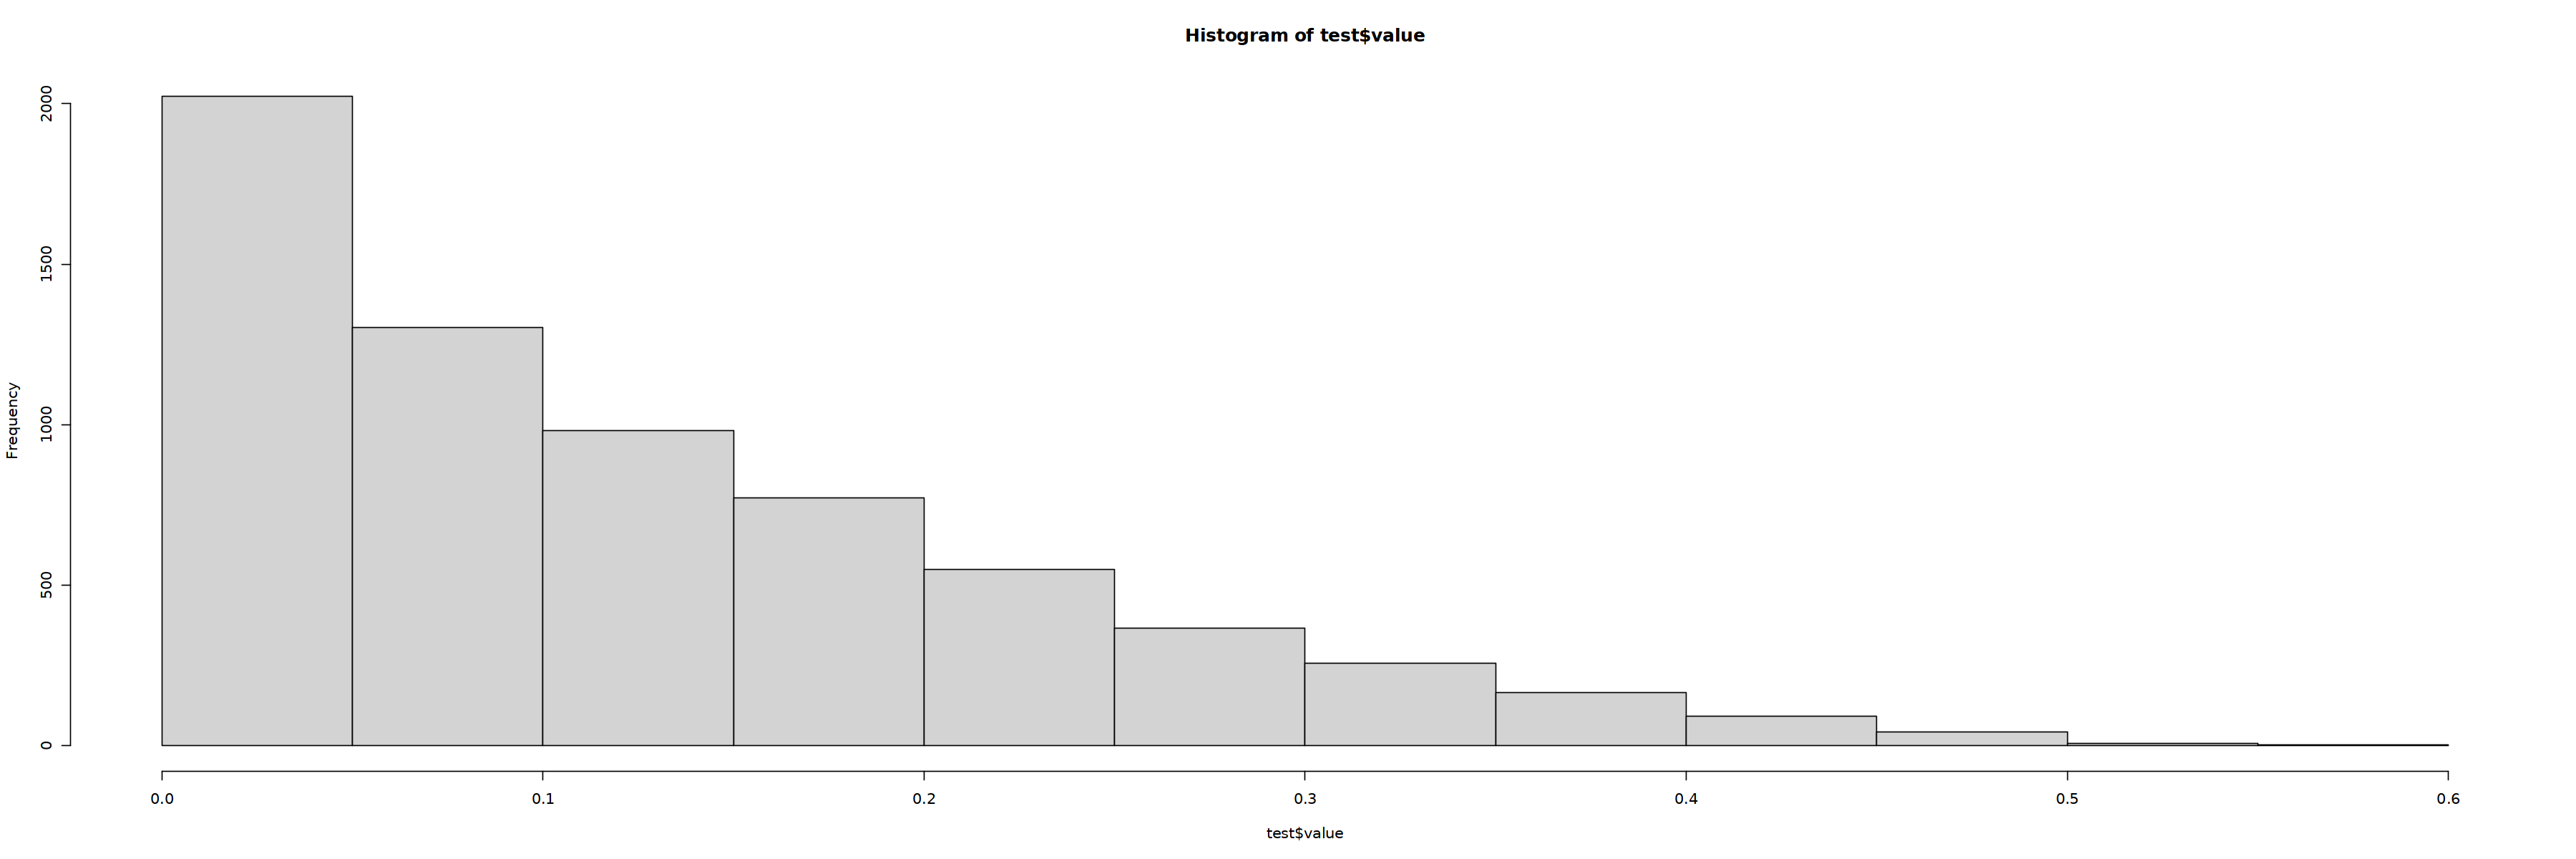

In [579]:
hist(test$value)

In [580]:
test[test$pathway_element == 1,]

type                     variable_name                     
19419 X2_TcellCD4              X2_T.cell.CD4__STAT3              
22555 X5_TcellCD4              X5_T.cell.CD4__STAT3              
19159 X2_TcellCD4              X2_T.cell.CD4__IL6ST              
13314 cytokine                 IL6__IL6                          
15306 X0_TcellCD4              X0_T.cell.CD4__STAT3              
20867 X4_MonocytesCD14         X4_Monocytes...CD14__IL6ST        
22360 X5_TcellCD4              X5_T.cell.CD4__IL6ST              
21791 X4_MonocytesCD14         X4_Monocytes...CD14__STAT3        
20898 X4_MonocytesCD14         X4_Monocytes...CD14__JAK1         
15747 X1_TcellCD8              X1_T.cell.CD8__JAK1               
24929 X7_MonocytesCD14         X7_Monocytes...CD14__SOCS3        
16026 X1_TcellCD8              X1_T.cell.CD8__STAT3              
19167 X2_TcellCD4              X2_T.cell.CD4__JAK1               
19755 X3_NK                    X3_NK__JAK1                       
18044 X12_MonocytesCD16_FCGR3A X12_Monocytes...CD16_FCGR3A__JAK1 
22366 X5_TcellCD4              X5_T.cell.CD4__JAK1               
15040 X0_TcellCD4              X0_T.cell.CD4__JAK1               
19396 X2_TcellCD4              X2_T.cell.CD4__SOCS3              
21734 X4_MonocytesCD14         X4_Monocytes...CD14__SOCS3        
17248 X11_TcellCD4             X11_T.cell.CD4__JAK1              
14083 neutrophil               SOCS3                             
25383 X8_Bcell                 X8_B.cell__JAK1                   
16815 X10_Bcell                X10_B.cell__STAT3                 
23209 X6_MonocytesCD14         X6_Monocytes...CD14__IL6R         
17515 X11_TcellCD4             X11_T.cell.CD4__STAT3             
18411 X12_MonocytesCD16_FCGR3A X12_Monocytes...CD16_FCGR3A__STAT3
23788 X6_MonocytesCD14         X6_Monocytes...CD14__STAT3        
26084 X9_MonocytesCD16_FCGR3A  X9_Monocytes...CD16_FCGR3A__JAK1  
23223 X6_MonocytesCD14         X6_Monocytes...CD14__JAK1         
13732 neutrophil               JAK1                              
16507 X10_Bcell                X10_B.cell__JAK1                  
      view                                gene  variable value      rank
19419 CD4+ T cells (Cluster 2)            STAT3 Factor2  0.48406720   20
22555 CD4+ T cells (Cluster 5)            STAT3 Factor2  0.40887347  117
19159 CD4+ T cells (Cluster 2)            IL6ST Factor2  0.40722396  120
13314 Cytokine                            IL6   Factor2  0.36532403  244
15306 CD4+ T cells (Cluster 0)            STAT3 Factor2  0.35414021  289
20867 CD14(high) Monocytes (Cluster 4)    IL6ST Factor2  0.34031381  343
22360 CD4+ T cells (Cluster 5)            IL6ST Factor2  0.31943905  455
21791 CD14(high) Monocytes (Cluster 4)    STAT3 Factor2  0.29048329  614
20898 CD14(high) Monocytes (Cluster 4)    JAK1  Factor2  0.26865784  771
15747 CD8+ T cells (Cluster 1)            JAK1  Factor2  0.24466104  972
24929 CD14(high) Monocytes (Cluster 7)    SOCS3 Factor2  0.22781637 1149
16026 CD8+ T cells (Cluster 1)            STAT3 Factor2  0.20732286 1363
19167 CD4+ T cells (Cluster 2)            JAK1  Factor2  0.14043084 2404
19755 NK cells (Cluster 3)                JAK1  Factor2  0.13695072 2456
18044 FCGR3A(high) Monocytes (Cluster 12) JAK1  Factor2  0.13507111 2490
22366 CD4+ T cells (Cluster 5)            JAK1  Factor2  0.10935858 3015
15040 CD4+ T cells (Cluster 0)            JAK1  Factor2  0.10377678 3143
19396 CD4+ T cells (Cluster 2)            SOCS3 Factor2  0.08712196 3528
21734 CD14(high) Monocytes (Cluster 4)    SOCS3 Factor2  0.07817860 3754
17248 CD4+ T cells (Cluster 11)           JAK1  Factor2  0.07716440 3781
14083 Neutrophil                          SOCS3 Factor2  0.05747910 4311
25383 B cells (Cluster 8)                 JAK1  Factor2  0.05470834 4397
16815 B cells (Cluster 10)                STAT3 Factor2  0.04990110 4535
23209 CD14(high) Monocytes (Cluster 6)    IL6R  Factor2  0.04158109 4798
17515 CD4+ T cells (Cluster 11)           STAT3 Factor2  0.03995310 4

In [581]:
head(test,20)

type             variable_name               
14907 X0_TcellCD4      X0_T.cell.CD4__EIF3E        
14982 X0_TcellCD4      X0_T.cell.CD4__HINT1        
21364 X4_MonocytesCD14 X4_Monocytes...CD14__PPP1CB 
15310 X0_TcellCD4      X0_T.cell.CD4__SUB1         
20319 X4_MonocytesCD14 X4_Monocytes...CD14__CDC42  
20334 X4_MonocytesCD14 X4_Monocytes...CD14__CELF2  
20478 X4_MonocytesCD14 X4_Monocytes...CD14__DAZAP2 
24004 X7_MonocytesCD14 X7_Monocytes...CD14__ACSL1  
20289 X4_MonocytesCD14 X4_Monocytes...CD14__CD164  
24014 X7_MonocytesCD14 X7_Monocytes...CD14__AGFG1  
22043 X4_MonocytesCD14 X4_Monocytes...CD14__VAPA   
16094 X1_TcellCD8      X1_T.cell.CD8__UBA52        
14989 X0_TcellCD4      X0_T.cell.CD4__HMGB1        
15687 X1_TcellCD8      X1_T.cell.CD8__HINT1        
19043 X2_TcellCD4      X2_T.cell.CD4__EIF3E        
20248 X4_MonocytesCD14 X4_Monocytes...CD14__CAPZA2 
14828 X0_TcellCD4      X0_T.cell.CD4__CELF2        
21889 X4_MonocytesCD14 X4_Monocytes...CD14__TMED10 
23976 X6_MonocytesCD14 X6_Monocytes...CD14__ZDHHC20
19419 X2_TcellCD4      X2_T.cell.CD4__STAT3        
      view                             gene    variable value     rank
14907 CD4+ T cells (Cluster 0)         EIF3E   Factor2  0.5547538  1  
14982 CD4+ T cells (Cluster 0)         HINT1   Factor2  0.5461578  2  
21364 CD14(high) Monocytes (Cluster 4) PPP1CB  Factor2  0.5422094  3  
15310 CD4+ T cells (Cluster 0)         SUB1    Factor2  0.5369021  4  
20319 CD14(high) Monocytes (Cluster 4) CDC42   Factor2  0.5303047  5  
20334 CD14(high) Monocytes (Cluster 4) CELF2   Factor2  0.5088331  6  
20478 CD14(high) Monocytes (Cluster 4) DAZAP2  Factor2  0.5069622  7  
24004 CD14(high) Monocytes (Cluster 7) ACSL1   Factor2  0.4964349  8  
20289 CD14(high) Monocytes (Cluster 4) CD164   Factor2  0.4956856  9  
24014 CD14(high) Monocytes (Cluster 7) AGFG1   Factor2  0.4954391 10  
22043 CD14(high) Monocytes (Cluster 4) VAPA    Factor2  0.4920306 11  
16094 CD8+ T cells (Cluster 1)         UBA52   Factor2  0.4911729 12  
14989 CD4+ T cells (Cluster 0)         HMGB1   Factor2  0.4907236 13  
15687 CD8+ T cells (Cluster 1)         HINT1   Factor2  0.4901334 14  
19043 CD4+ T cells (Cluster 2)         EIF3E   Factor2  0.4899348 15  
20248 CD14(high) Monocytes (Cluster 4) CAPZA2  Factor2  0.4883274 16  
14828 CD4+ T cells (Cluster 0)         CELF2   Factor2  0.4880976 17  
21889 CD14(high) Monocytes (Cluster 4) TMED10  Factor2  0.4859779 18  
23976 CD14(high) Monocytes (Cluster 6) ZDHHC20 Factor2  0.4848463 19  
19419 CD4+ T cells (Cluster 2)         STAT3   Factor2  0.4840672 20  
      pathway_element
14907 0              
14982 0              
21364 0              
15310 0              
20319 0              
20334 0              
20478 0              
24004 0              
20289 0              
24014 0              
22043 0              
16094 0              
14989 0              
15687 0              
19043 0              
20248 0              
14828 0              
21889 0              
23976 0              
19419 1

## KEGG Overall 

### Get significant results

In [536]:
## Set significance threshold for filtering
significance_threshold = 0.05

In [537]:
min(enrichment_result_p_val_adjusted_kegg_all$value, na.rm = T)

[1] 1.194377e-27

In [538]:
unique(enrichment_result_p_val_adjusted_kegg_all$view)

[1] "complete"

In [539]:
unique(enrichment_result_p_val_adjusted_kegg_all$variable)

[1] Factor1 Factor2 Factor3 Factor4 Factor5
Levels: Factor1 Factor2 Factor3 Factor4 Factor5

In [540]:
### Investigate significant results

In [541]:
enrichment_result_p_val_adjusted = enrichment_result_p_val_adjusted_kegg_all[enrichment_result_p_val_adjusted_kegg_all$value <= significance_threshold,]

In [542]:
head(enrichment_result_p_val_adjusted,2)

pathway                                      variable value        view    
2 Antigen processing and presentation_hsa04612 Factor1  4.114216e-05 complete
9 Chemokine signaling pathway_hsa04062         Factor1  1.987427e-07 complete
  enrichment
2 all       
9 all

In [543]:
nrow(enrichment_result_p_val_adjusted)

[1] 116

In [544]:
### Add pathway names

In [545]:
nrow(enrichment_result_p_val_adjusted)

[1] 116

In [546]:
### Add covarage

In [547]:
head(filter_kegg,2) 

pathway                                                name                  
1 ALL_ALL_ALL                                            ALL                   
2 MAPK signaling pathway_MAPK signaling pathway_hsa04010 MAPK signaling pathway
  gene_amount matched_amount coverage 
1 2273        2271           0.9991201
2  294          81           0.2755102

In [524]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, filter_kegg)

In [525]:
nrow(enrichment_result_p_val_adjusted)

[1] 0

In [526]:
enrichment_result_p_val_adjusted_w_o_direction = enrichment_result_p_val_adjusted %>% group_by(pathway,variable, view) %>% summarise(value = mean(value))

`summarise()` has grouped output by 'pathway', 'variable'. You can override
using the `.groups` argument.


In [527]:
head(enrichment_result_p_val_adjusted,2)

pathway variable value view enrichment name gene_amount matched_amount
     coverage

In [528]:
summarized = enrichment_result_p_val_adjusted %>% dcast(pathway + variable ~ enrichment, value.var = 'value')

ERROR: Error in dim(ordered) <- ns: dims [product 1] do not match the length of object [0]


In [529]:
head(summarized,2)

pathway       variable all         negative positive    
1 R-HSA-1059683 Factor1  0.002550508 NA                 NA
2 R-HSA-1059683 Factor2           NA NA       0.0005675189

In [530]:
summarized[(!is.na(summarized$negative)) & (!is.na(summarized$positive)),]
# check that pathway is not enriched positively and negatively at the same time

pathway variable all negative positive

In [531]:
head(summarized[(!is.na(summarized$negative)) & (!is.na(summarized$all)),],2)

pathway       variable all          negative     positive
4 R-HSA-1168372 Factor2  2.216404e-07 1.370977e-03 NA      
7 R-HSA-1169091 Factor2  3.514044e-07 1.354731e-05 NA

### Visualize all enriched pathways

In [532]:
### Visualize result

In [533]:
head(enrichment_result_p_val_adjusted,2)

pathway variable value view enrichment name gene_amount matched_amount
     coverage

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pas

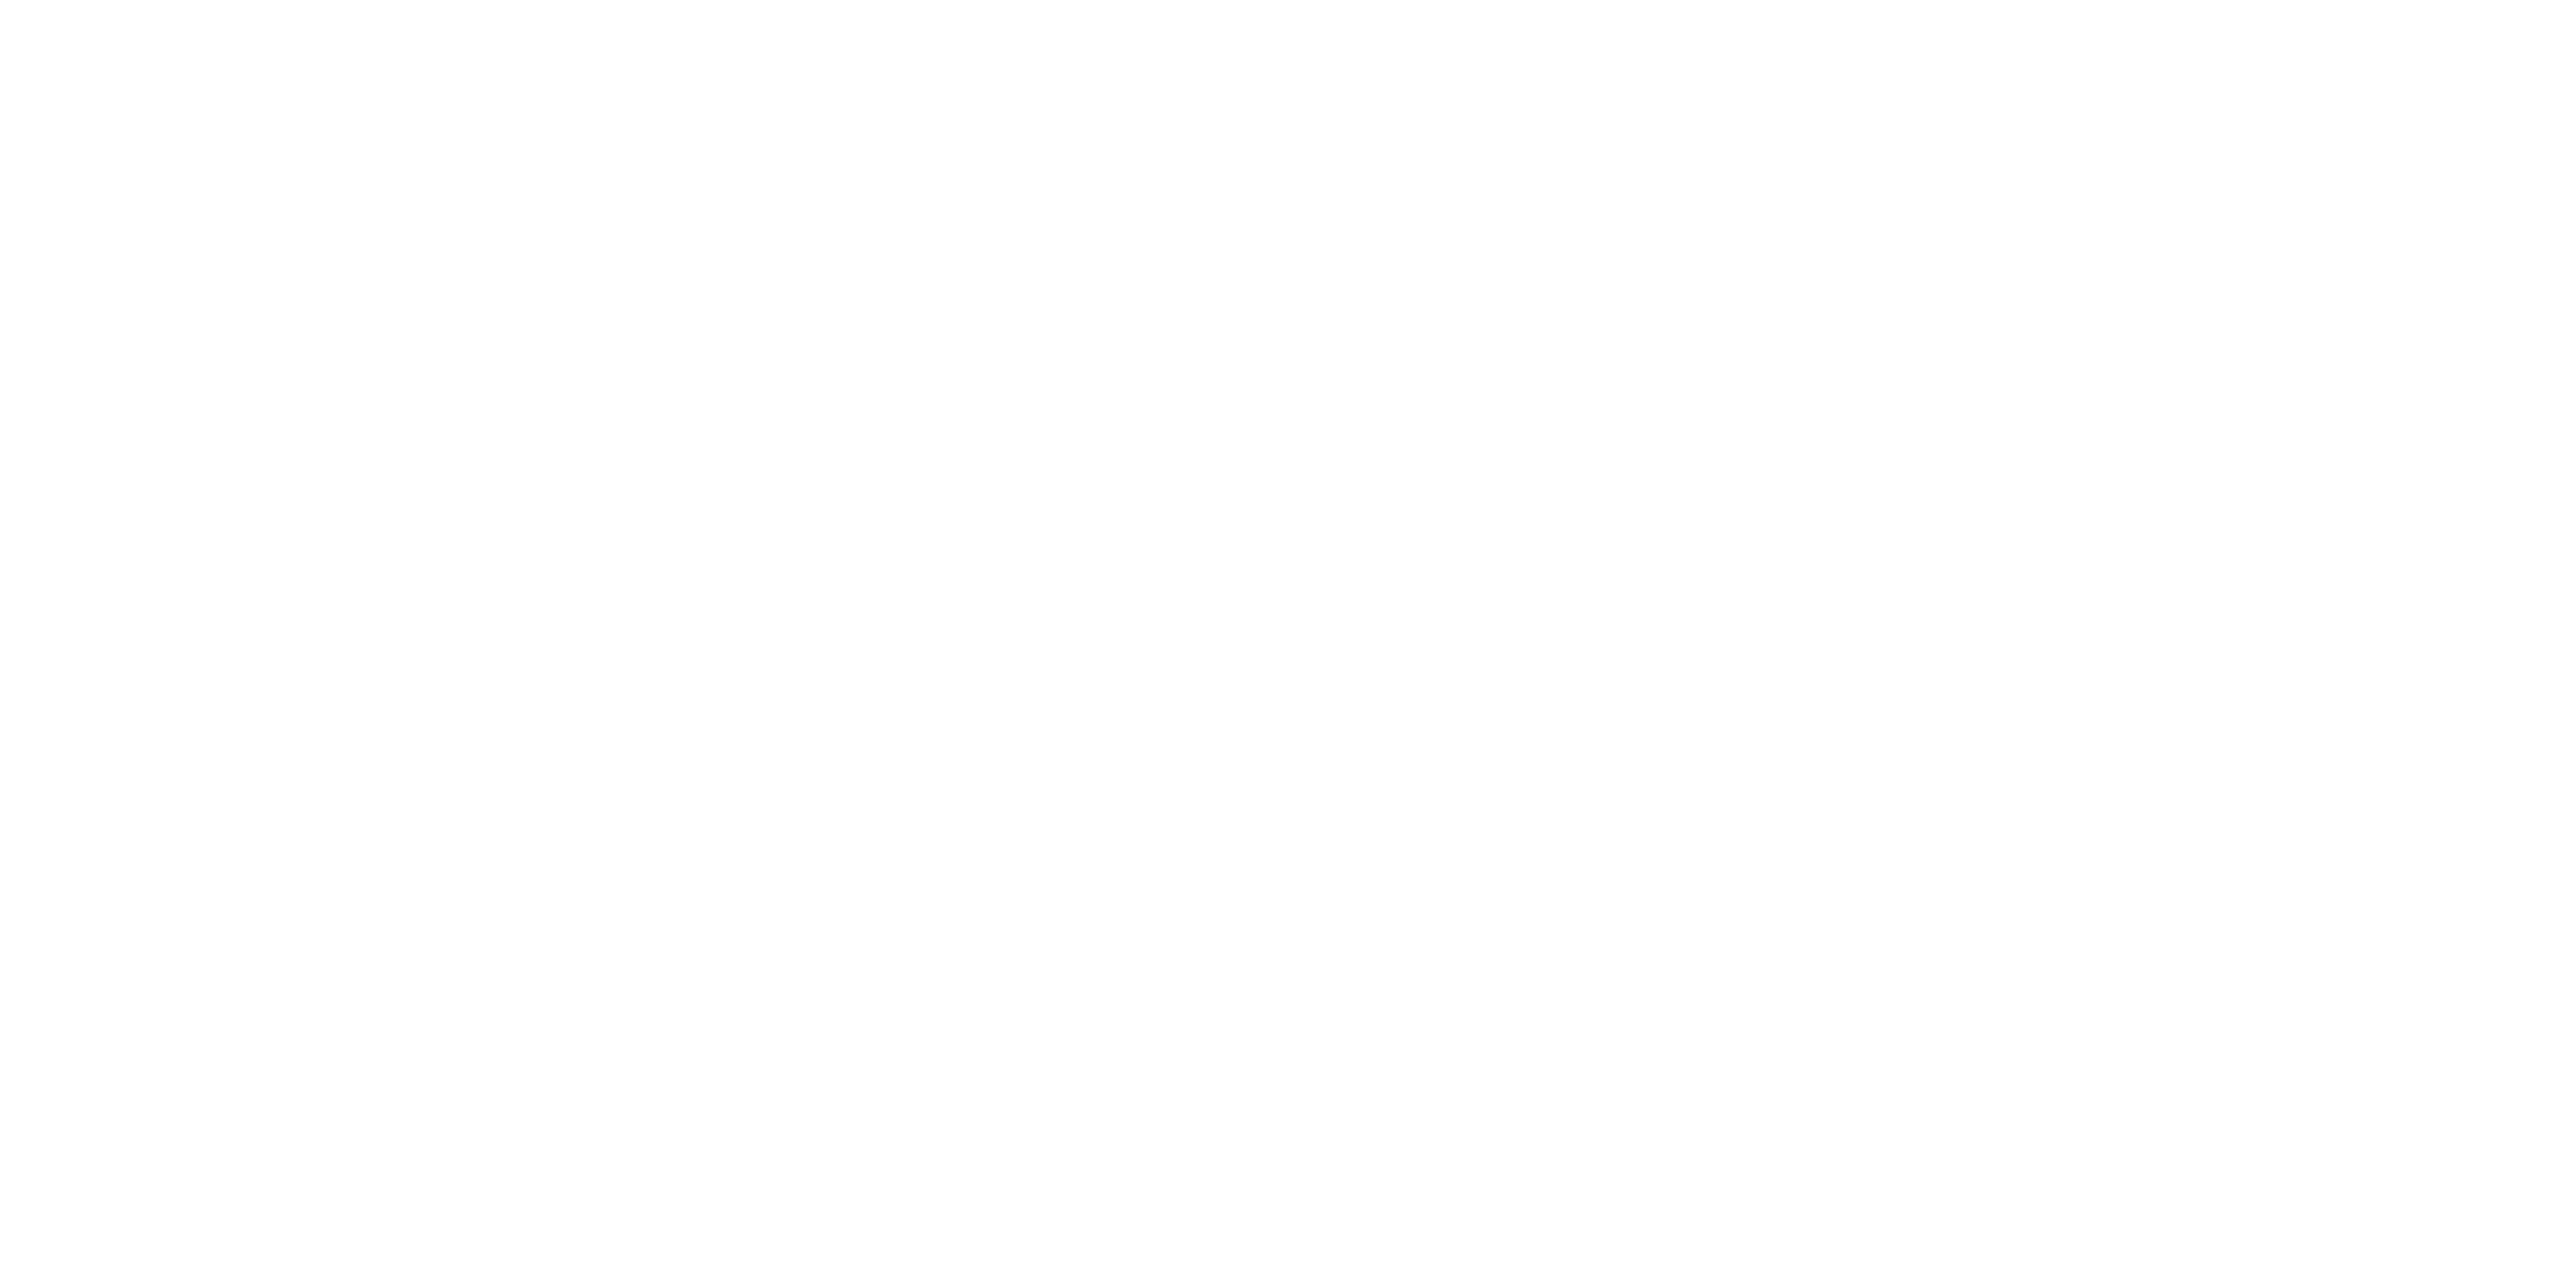

In [534]:
options(repr.plot.width=30, repr.plot.height=15)
ggplot(enrichment_result_p_val_adjusted[ (enrichment_result_p_val_adjusted$enrichment %in% c('all', 'positive', 'negative')),], 
       aes(enrichment,pathway, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    facet_grid(. ~ variable, space = 'free' , scales = 'free') + 
    scale_x_discrete(position = "top")  

In [535]:
head(feature_set_kegg_all,2)

A1BG_M0R009 A1BG_P04217.2
ALL_ALL                                      1           1            
Antigen processing and presentation_hsa04612 0           0            
                                             A2M_P01023 AATK ABCA7 ABHD2 ABHD5
ALL_ALL                                      0          1    1     1     1    
Antigen processing and presentation_hsa04612 0          0    0     0     0    
                                             ABI3BP_D3YTG3 ABTB1 ACAP2 ⋯ ZBTB7B
ALL_ALL                                      1             1     1     ⋯ 1     
Antigen processing and presentation_hsa04612 0             0     0     ⋯ 0     
                                             ZC3HAV1 ZFAND5 ZFAS1 ZFP36L2 ZMAT2
ALL_ALL                                      1       1      1     1       1    
Antigen processing and presentation_hsa04612 0       0      0     0       0    
                                             ZNF106 ZNF281 ZNF467 ZNFX1
ALL_ALL                                      1      1      1      1    
Antigen processing and presentation_hsa04612 0      0      0      0

In [2606]:
nrow(feature_set_kegg_all)

[1] 43

### Visualize all enriched pathways on a factor

In [2607]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [2608]:
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [2609]:
head(plot_data,2)

pathway                                      variable value        view    
7 Antigen processing and presentation_hsa04612 Factor2  9.480604e-18 complete
8 Antigen processing and presentation_hsa04612 Factor2  1.194377e-27 complete
  enrichment name                                gene_amount matched_amount
7 all        Antigen processing and presentation 78          37            
8 negative   Antigen processing and presentation 78          37            
  coverage
7 0.474359
8 0.474359

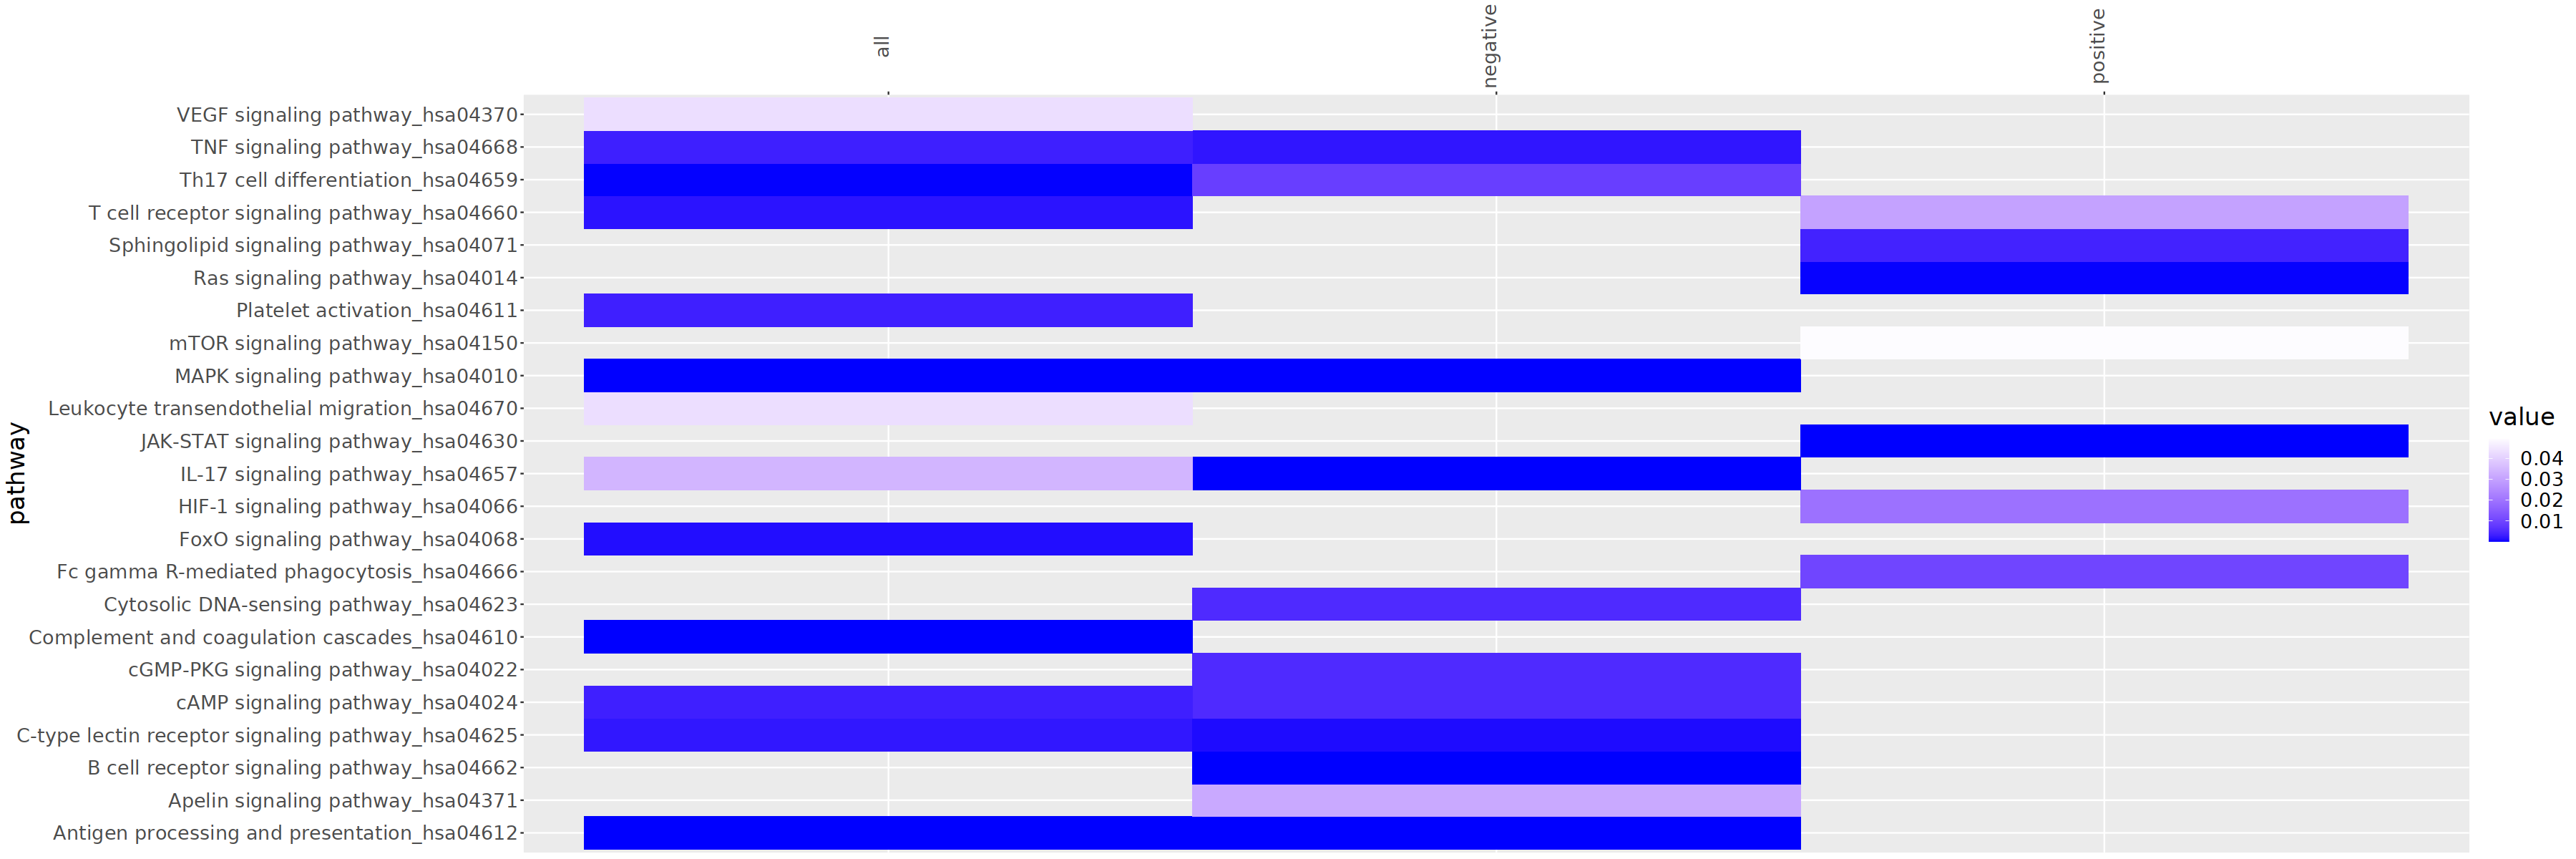

In [2610]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(plot_data, 
       aes(enrichment, pathway, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    facet_grid(. ~ ., space = 'free' , scales = 'free') + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    scale_x_discrete(position = "top")  

### Inspect Top Pathways of Factor

In [2611]:
### Selection Parameters for top pathways

In [2612]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [2613]:
select_enrichment = c('positive') 

In [2614]:
# filter on factor
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [2615]:
nrow(plot_data)

[1] 31

In [2616]:
# only positive
plot_data_subset = plot_data[plot_data$enrichment %in%  select_enrichment,]

In [2617]:
nrow(plot_data_subset)

[1] 7

In [2618]:
#plot_data_subset

In [2619]:
## only 14 pathways with ccoverage higher than 50%

In [2620]:
# top 20 based on p value
#plot_data_subset = head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [2621]:
#head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [2622]:
plot_data_subset$dummy = 'pvalue'

In [2623]:
# Specific Text Descriptions:
xlabel = xlab('') 
ylabel = ylab('Pathway')

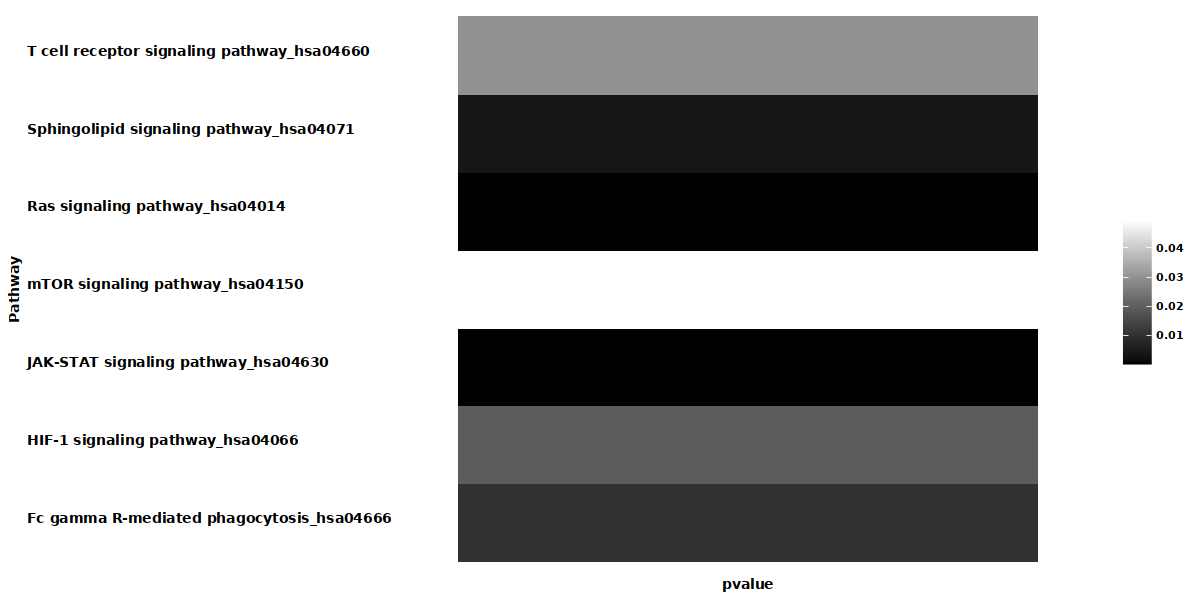

In [2624]:
options(repr.plot.width=10, repr.plot.height=5)
pvalue_heatmap = ggplot(plot_data_subset, aes(x = dummy, y =pathway, fill = value)) +
  geom_tile() +   plot_config_heatmap + scale_fill_gradient(low = 'black', high = 'white')  +
  theme(axis.title.x = element_blank()) + ylabel
  #facet_grid(cluster ~., space = 'free', scales = 'free', switch = 'y')+

pvalue_heatmap

### Visualize top genes and pathways for a selected factor

In [2625]:
### Select a set of pathways to visualize

In [2626]:
## A1: select specific lsuter
#cluster_var = 12
#pathways_selection = pathways_clustered$pathway[pathways_clustered$cluster == 12]
#length(pathways_selection)

In [2750]:
## A2 use same pathways as filtered above for subsetting

pathways_selection = unique(plot_data_subset$pathway)

In [2751]:
unique(plot_data_subset[,c('pathway')])

[1] "Fc gamma R-mediated phagocytosis_hsa04666" 
[2] "HIF-1 signaling pathway_hsa04066"          
[3] "JAK-STAT signaling pathway_hsa04630"       
[4] "mTOR signaling pathway_hsa04150"           
[5] "Ras signaling pathway_hsa04014"            
[6] "Sphingolipid signaling pathway_hsa04071"   
[7] "T cell receptor signaling pathway_hsa04660"

In [2752]:
length(pathways_selection)

[1] 7

In [2753]:
pathways_selection

[1] "Fc gamma R-mediated phagocytosis_hsa04666" 
[2] "HIF-1 signaling pathway_hsa04066"          
[3] "JAK-STAT signaling pathway_hsa04630"       
[4] "mTOR signaling pathway_hsa04150"           
[5] "Ras signaling pathway_hsa04014"            
[6] "Sphingolipid signaling pathway_hsa04071"   
[7] "T cell receptor signaling pathway_hsa04660"

In [2754]:
### A3 Manual Selection
#pathways_selection = c('R-HSA-1059683', 'R-HSA-9020956', 'R-HSA-9020591' ,'R-HSA-6783783')

In [2755]:
### Prepare a geneset oi with all top% genes of a factor

In [2756]:
select_thres = 0.1 # choose threshold of top x % of features of MOFA factor to take into account

In [2757]:
### Get involved genes

In [2758]:
## Define gene-set to merge
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(select_thres)
geneset_oi_pos_per_factor$direction = 'positive'
geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-select_thres)

geneset_oi_neg_per_factor$direction = 'negative'


Selecting by value
Selecting by value


In [2759]:
geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)
#geneset_oi = geneset_oi_pos_per_factor

In [2760]:
geneset_oi = geneset_oi[geneset_oi$variable == select_factor,]

In [2761]:
nrow(geneset_oi)

[1] 2654

In [2762]:
nrow(geneset_oi)

[1] 2654

In [2763]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  value     direction
1 0.5667885 positive 
2 0.5502495 positive

In [2764]:
colnames(geneset_oi) = c('type', 'variable_name','view',  'gene', 'variable', 'factor_value', 'factor_value_direction')

In [2765]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  factor_value factor_value_direction
1 0.5667885    positive              
2 0.5502495    positive

In [2766]:
### Merge genes belongig to pathway to enriched pathway sets

In [2767]:
### filter on factro
pathways_vis = enrichment_result_p_val_adjusted[(enrichment_result_p_val_adjusted$variable == select_factor) & (enrichment_result_p_val_adjusted$enrichment %in% select_enrichment),]

In [2768]:
### Add genes to pathways

In [2769]:
head(pathways_vis,2)

pathway                                   variable value       view    
37 Fc gamma R-mediated phagocytosis_hsa04666 Factor2  0.009924066 complete
48 HIF-1 signaling pathway_hsa04066          Factor2  0.019186992 complete
   enrichment name                             gene_amount matched_amount
37 positive   Fc gamma R-mediated phagocytosis  97         43            
48 positive   HIF-1 signaling pathway          109         44            
   coverage 
37 0.4432990
48 0.4036697

In [2770]:
head(feature_set_kegg_data,2)

pathway name gene_id Category Name SYMBOL n gene_amount matched_amount
1 ALL     ALL  10476   All      ALL  ATP5PD 1 2275        2273          
2 ALL     ALL  57062   All      ALL  DDX24  1 2275        2273          
  coverage  pathway_id value
1 0.9991209 ALL_ALL    1    
2 0.9991209 ALL_ALL    1

In [2771]:
feature_set_kegg_data[(feature_set_kegg_data$pathway_id == 'Fc gamma R-mediated phagocytosis_hsa04666') & (feature_set_kegg_data$SYMBOL == 'ACTR2'),]

pathway  name                             gene_id Category     
7571 hsa04666 Fc gamma R-mediated phagocytosis 10097   Immune system
     Name                             SYMBOL n gene_amount matched_amount
7571 Fc gamma R-mediated phagocytosis ACTR2  1 97          43            
     coverage pathway_id                                value
7571 0.443299 Fc gamma R-mediated phagocytosis_hsa04666 1

In [2772]:
pathways_vis_genes = merge(pathways_vis, feature_set_kegg_data[,c('SYMBOL', 'pathway_id', 'gene_id')], by.x = 'pathway', by.y = 'pathway_id')

In [2773]:
head(pathways_vis_genes,2)

pathway                                   variable value       view    
1 Fc gamma R-mediated phagocytosis_hsa04666 Factor2  0.009924066 complete
2 Fc gamma R-mediated phagocytosis_hsa04666 Factor2  0.009924066 complete
  enrichment name                             gene_amount matched_amount
1 positive   Fc gamma R-mediated phagocytosis 97          43            
2 positive   Fc gamma R-mediated phagocytosis 97          43            
  coverage SYMBOL gene_id
1 0.443299 RAF1   5894   
2 0.443299 LYN    4067

In [2774]:
pathways_vis_genes[(pathways_vis_genes$pathway == 'Fc gamma R-mediated phagocytosis_hsa04666') &  (pathways_vis_genes$SYMBOL == 'ACTR2'),]

pathway                                   variable value       view    
5 Fc gamma R-mediated phagocytosis_hsa04666 Factor2  0.009924066 complete
  enrichment name                             gene_amount matched_amount
5 positive   Fc gamma R-mediated phagocytosis 97          43            
  coverage SYMBOL gene_id
5 0.443299 ACTR2  10097

In [2775]:
pathways_vis_genes %>% group_by(pathway,variable,enrichment, SYMBOL) %>% count() %>% filter(n > 1)

pathway variable enrichment SYMBOL n

In [2776]:
colnames(pathways_vis_genes) = c('pathway', 'variable', 'pvalue', 'view_text', 'enrichment', 'name', 'gene_amount', 'matched_amount', 'coverage', 'SYMBOL', 'gene_id')

In [2777]:
head(geneset_oi,2)

type        variable_name        view                     gene  variable
1 X0_TcellCD4 X0_T.cell.CD4__EIF3E CD4+ T cells (Cluster 0) EIF3E Factor2 
2 X0_TcellCD4 X0_T.cell.CD4__HINT1 CD4+ T cells (Cluster 0) HINT1 Factor2 
  factor_value factor_value_direction
1 0.5667885    positive              
2 0.5502495    positive

In [2778]:
### Add factor values of pathway genes (! with current implementation only filters on top genes as defined in geneset_oi)

In [2779]:
pathways_vis_genes = merge(pathways_vis_genes, geneset_oi, by.x = c('SYMBOL', 'variable'), by.y = c('gene','variable' ))

In [2780]:
head(pathways_vis_genes,2)

SYMBOL variable pathway                                   pvalue     
1 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666 0.009924066
2 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666 0.009924066
  view_text enrichment name                             gene_amount
1 complete  positive   Fc gamma R-mediated phagocytosis 97         
2 complete  positive   Fc gamma R-mediated phagocytosis 97         
  matched_amount coverage gene_id type             variable_name             
1 43             0.443299 10097   X7_MonocytesCD14 X7_Monocytes...CD14__ACTR2
2 43             0.443299 10097   X6_MonocytesCD14 X6_Monocytes...CD14__ACTR2
  view                             factor_value factor_value_direction
1 CD14(high) Monocytes (Cluster 7) 0.2828734    positive              
2 CD14(high) Monocytes (Cluster 6) 0.4077367    positive

In [2781]:
nrow(unique(pathways_vis_genes[,c('pathway', 'pvalue', 'enrichment')]))

[1] 7

In [2782]:
nrow(unique(pathways_vis_genes[,c('pathway','enrichment')]))

[1] 7

In [2783]:
nrow(pathways_vis_genes)

[1] 337

In [2784]:
length(unique(pathways_vis_genes$pathway))

[1] 7

In [2785]:
### Summarise to get max/ mean factor value of each gene per pathway (remove cell-cluster/view/type dimension)  --> tBD max or mean (for max --> absolute value?)

In [2786]:
pathways_vis_genes_summarized = pathways_vis_genes %>% group_by(SYMBOL,variable,  pathway, name, gene_id) %>% summarise(factor_value = mean(factor_value), enrichment_type = paste0(unique(enrichment), collapse = '&'), pvalue = min(pvalue))
## still multiple entries for different types of enrichment: positive, negative, all

`summarise()` has grouped output by 'SYMBOL', 'variable', 'pathway', 'name'.
You can override using the `.groups` argument.


In [2787]:
nrow(pathways_vis_genes_summarized)

[1] 124

In [2788]:
head(pathways_vis_genes_summarized,2)

SYMBOL variable pathway                                  
1 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
2 ACTR3  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
  name                             gene_id factor_value enrichment_type
1 Fc gamma R-mediated phagocytosis 10097   0.2932059    positive       
2 Fc gamma R-mediated phagocytosis 10096   0.2798350    positive       
  pvalue     
1 0.009924066
2 0.009924066

In [2789]:
pathways_vis_genes_summarized %>% group_by(pathway, variable, name, enrichment_type, SYMBOL) %>% count() %>% filter(n > 1)

pathway variable name enrichment_type SYMBOL n

In [2790]:
### Filter on selected pathways for visualization

In [2791]:
pathways_vis_genes = pathways_vis_genes[pathways_vis_genes$pathway %in% pathways_selection,]
pathways_vis_genes_summarized = pathways_vis_genes_summarized[pathways_vis_genes_summarized$pathway %in% pathways_selection,]

In [2792]:
unique(pathways_vis_genes[,c('enrichment', 'name')])

enrichment name                             
1  positive   Fc gamma R-mediated phagocytosis 
16 positive   Ras signaling pathway            
27 positive   Sphingolipid signaling pathway   
29 positive   mTOR signaling pathway           
35 positive   JAK-STAT signaling pathway       
37 positive   HIF-1 signaling pathway          
57 positive   T cell receptor signaling pathway

In [2793]:
### Different visualization strategies

In [2794]:
### Visualization - Part 1 (Genes + Maximum)

In [2795]:
head(pathways_vis_genes_summarized,2)

SYMBOL variable pathway                                  
1 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
2 ACTR3  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
  name                             gene_id factor_value enrichment_type
1 Fc gamma R-mediated phagocytosis 10097   0.2932059    positive       
2 Fc gamma R-mediated phagocytosis 10096   0.2798350    positive       
  pvalue     
1 0.009924066
2 0.009924066

In [2796]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('Pathway')

In [2797]:
options(repr.plot.width=15, repr.plot.height=5)
g1 = ggplot(pathways_vis_genes_summarized, aes(SYMBOL,  name, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90)) +
    xlabel +
    ylabel
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g1

In [2798]:
### Visualized the exact factor values of the genes

In [2799]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('View')

In [2800]:
head(pathways_vis_genes,2)

SYMBOL variable pathway                                   pvalue     
1 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666 0.009924066
2 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666 0.009924066
  view_text enrichment name                             gene_amount
1 complete  positive   Fc gamma R-mediated phagocytosis 97         
2 complete  positive   Fc gamma R-mediated phagocytosis 97         
  matched_amount coverage gene_id type             variable_name             
1 43             0.443299 10097   X7_MonocytesCD14 X7_Monocytes...CD14__ACTR2
2 43             0.443299 10097   X6_MonocytesCD14 X6_Monocytes...CD14__ACTR2
  view                             factor_value factor_value_direction
1 CD14(high) Monocytes (Cluster 7) 0.2828734    positive              
2 CD14(high) Monocytes (Cluster 6) 0.4077367    positive

In [2801]:
plot_data_cluster = unique(pathways_vis_genes[,c('SYMBOL', 'variable', 'type','view',  'variable_name', 'factor_value', 'factor_value_direction')])

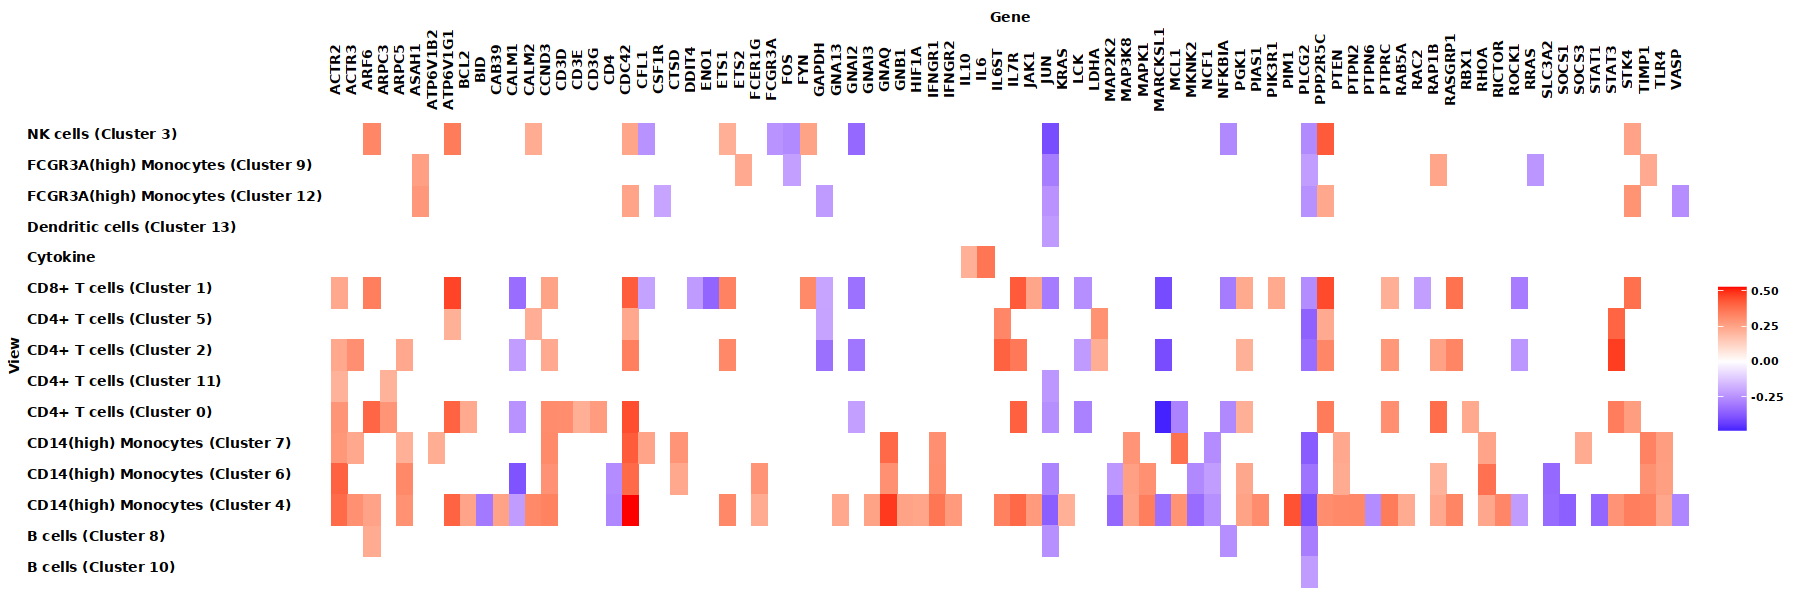

In [2802]:
options(repr.plot.width=15, repr.plot.height=5)
g2 = ggplot(plot_data_cluster, aes(SYMBOL,  view, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90)) +
    xlabel +
    ylabel
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g2

In [2803]:
### Combine Plots

In [2804]:
figure_name = "FIG7_E6_Top_Pathways_Genes"

In [2805]:
# Sizes of the plot
width_par = 8.07
height_par = 3.5

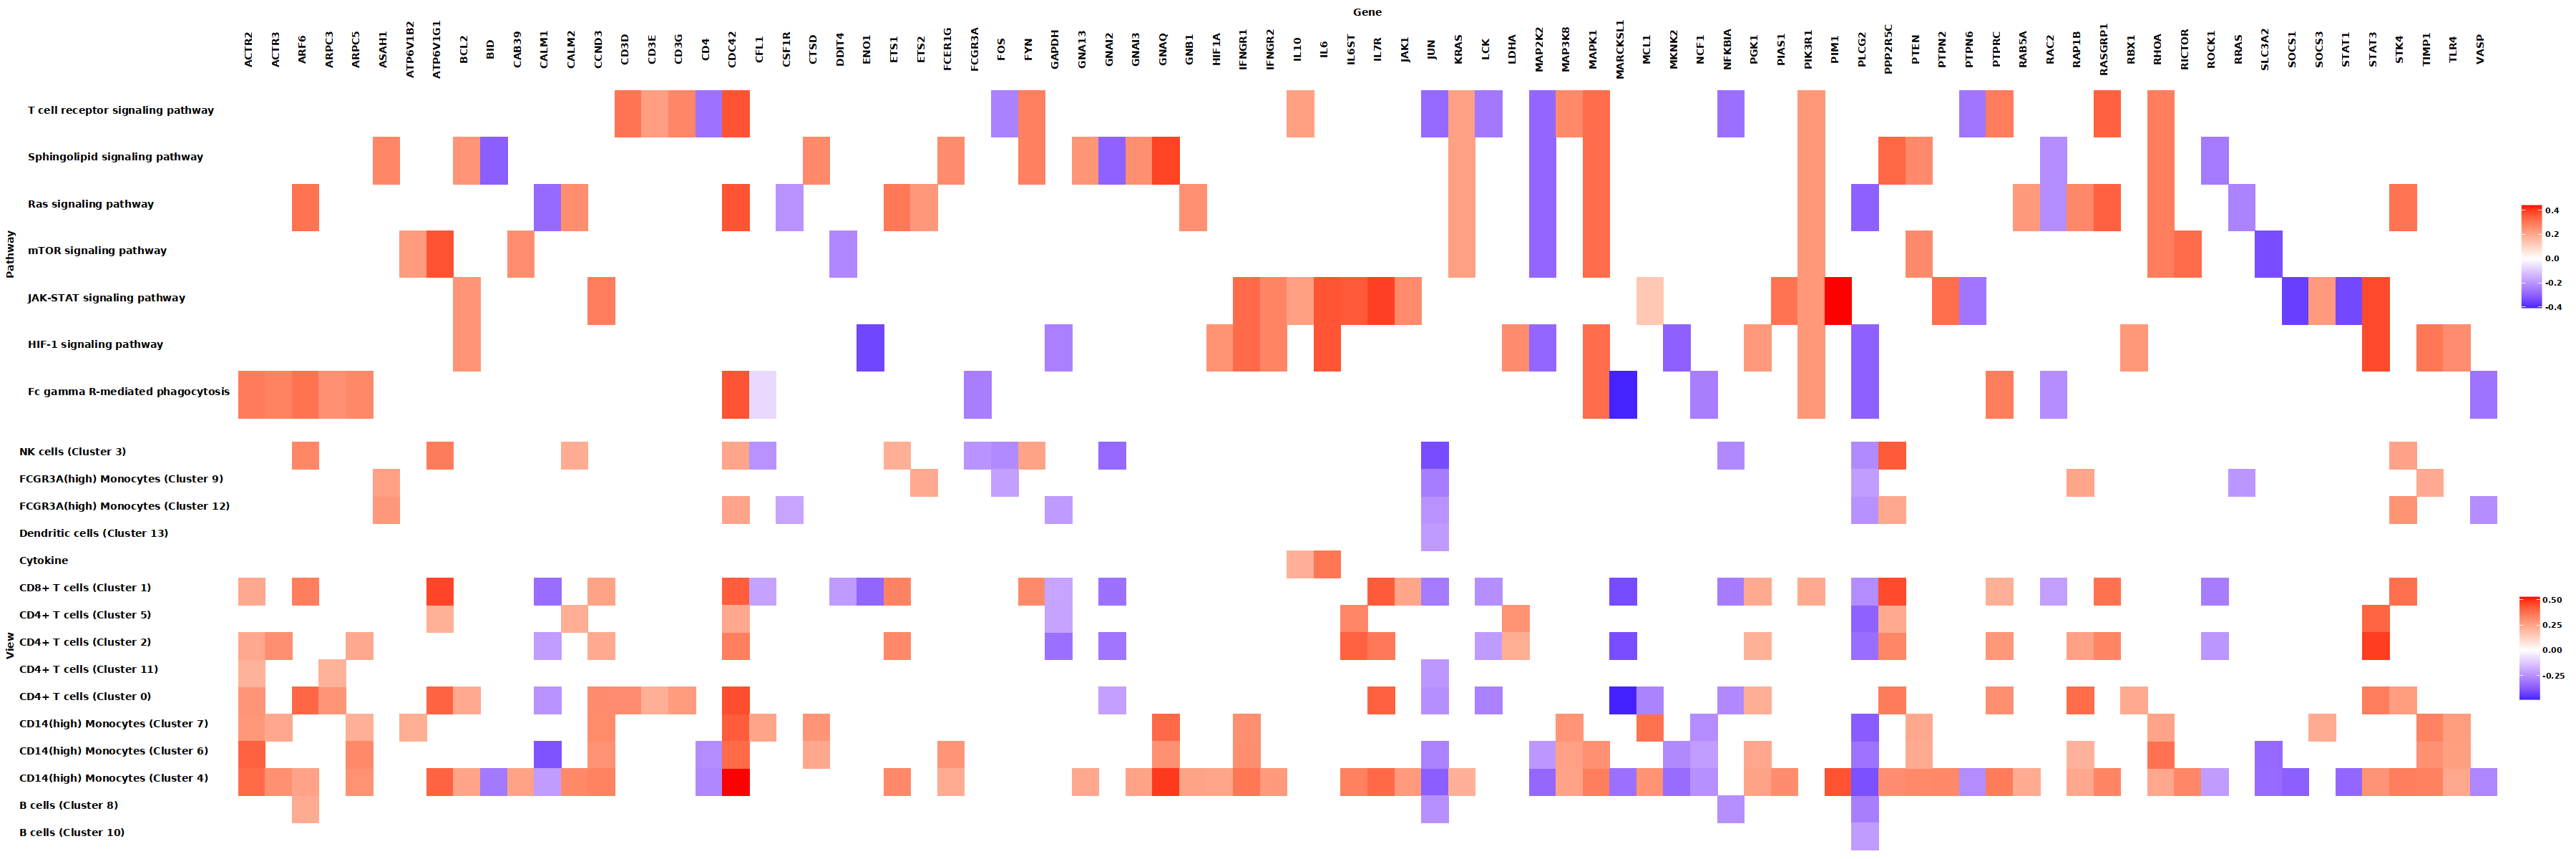

In [2806]:
options(repr.plot.width=30, repr.plot.height=10)
combined_enriched_pathways = ggarrange(g1,
          g2 + theme(axis.text.x = element_blank(), axis.title.x =element_blank()), align = 'v', ncol = 1)
combined_enriched_pathways

### Visualize a selected pathway in KEGG format

In [2807]:
head(pathways_vis_genes_summarized)

SYMBOL variable pathway                                  
1 ACTR2  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
2 ACTR3  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
3 ARF6   Factor2  Fc gamma R-mediated phagocytosis_hsa04666
4 ARF6   Factor2  Ras signaling pathway_hsa04014           
5 ARPC3  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
6 ARPC5  Factor2  Fc gamma R-mediated phagocytosis_hsa04666
  name                             gene_id factor_value enrichment_type
1 Fc gamma R-mediated phagocytosis 10097   0.2932059    positive       
2 Fc gamma R-mediated phagocytosis 10096   0.2798350    positive       
3 Fc gamma R-mediated phagocytosis 382     0.3096210    positive       
4 Ras signaling pathway            382     0.3096210    positive       
5 Fc gamma R-mediated phagocytosis 10094   0.2493896    positive       
6 Fc gamma R-mediated phagocytosis 10092   0.2662591    positive       
  pvalue      
1 0.0099240657
2 0.0099240657
3 0.0099240657
4 0.0001469046
5 0.0099240657
6 0.0099240657

In [2808]:
### Visualize some pathways

In [2809]:
## Visualize a kegg pathway

In [2810]:
#### Define genes that will be displayed

In [2811]:
unique(pathways_vis_genes_summarized$pathway)

[1] "Fc gamma R-mediated phagocytosis_hsa04666" 
[2] "Ras signaling pathway_hsa04014"            
[3] "Sphingolipid signaling pathway_hsa04071"   
[4] "mTOR signaling pathway_hsa04150"           
[5] "HIF-1 signaling pathway_hsa04066"          
[6] "JAK-STAT signaling pathway_hsa04630"       
[7] "T cell receptor signaling pathway_hsa04660"

In [2812]:
pathway = 'JAK-STAT signaling pathway_hsa04630'

In [2813]:
### Select data for vis

In [2814]:
data_pathway_vis = pathways_vis_genes_summarized[pathways_vis_genes_summarized$pathway == pathway,]

In [2815]:
head(data_pathway_vis[order(abs(data_pathway_vis$factor_value), decreasing = TRUE),],5)

SYMBOL variable pathway                            
1 PIM1   Factor2  JAK-STAT signaling pathway_hsa04630
2 IL7R   Factor2  JAK-STAT signaling pathway_hsa04630
3 STAT3  Factor2  JAK-STAT signaling pathway_hsa04630
4 SOCS1  Factor2  JAK-STAT signaling pathway_hsa04630
5 IL6    Factor2  JAK-STAT signaling pathway_hsa04630
  name                       gene_id factor_value enrichment_type pvalue      
1 JAK-STAT signaling pathway 5292     0.4407640   positive        2.208939e-06
2 JAK-STAT signaling pathway 3575     0.3950584   positive        2.208939e-06
3 JAK-STAT signaling pathway 6774     0.3795164   positive        2.208939e-06
4 JAK-STAT signaling pathway 8651    -0.3644228   positive        2.208939e-06
5 JAK-STAT signaling pathway 3569     0.3628149   positive        2.208939e-06

In [2816]:
gene_data_input = data_pathway_vis$factor_value

In [2817]:
names(gene_data_input) = data_pathway_vis$gene_id

In [2818]:
gene_data_input

596        896       3459       3460       3586       3569       3572 
 0.2413517  0.2889691  0.3237477  0.2729198  0.2165754  0.3628149  0.3558429 
      3575       3716       4170       8554       5295       5292       5771 
 0.3950584  0.2597056  0.1276265  0.3083224  0.2351055  0.4407640  0.3185416 
      5777       8651       9021       6772       6774 
-0.2627518 -0.3644228  0.2295204 -0.3480425  0.3795164

In [2819]:
#### Visualize pathway

In [2820]:
#Example how to look at a enriched pathway with the KEGG pathway viewer
hsa04110 = pathview(gene.data  = gene_data_input,
                     pathway.id = str_replace(pathway, '.*_', ''),
                     species    = "hsa", kegg.dir = 'figures/E6_Pathways/', out.suffix = paste0(select_factor, '_', select_thres, '_', name, '_', weight_views), node.sum = "max.abs"
                   
                   )

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /home/icb/corinna.losert/projects/stark-stemi/scripts

Info: Writing image file hsa04630.Factor2_0.1_V_FINAL_INTEGRATED_FALSE.png

